In [168]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from rcgp.rcgp import GPRegressor, RCGPRegressor
from rcgp.morcgp import MORCGPRegressor_fixed_weights, MOGPRegressor
from rcgp.kernels import ConstantMean, RBFKernel, LinearMean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.rcParams.update({
    "text.usetex": True,         
    "font.family": "serif",       
    "text.latex.preamble": r"\usepackage{amsmath}",
    'font.size': 20,         
    'axes.labelsize': 20,    
    'xtick.labelsize': 20,   
    'ytick.labelsize': 20,  
    'legend.fontsize': 20,
    'lines.linewidth': 4,    
    'lines.markersize': 5,
    'axes.titlesize': 24
})

## RCGP

35


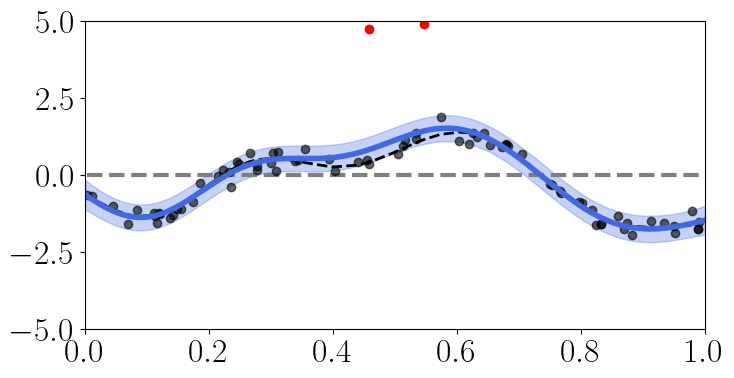

36


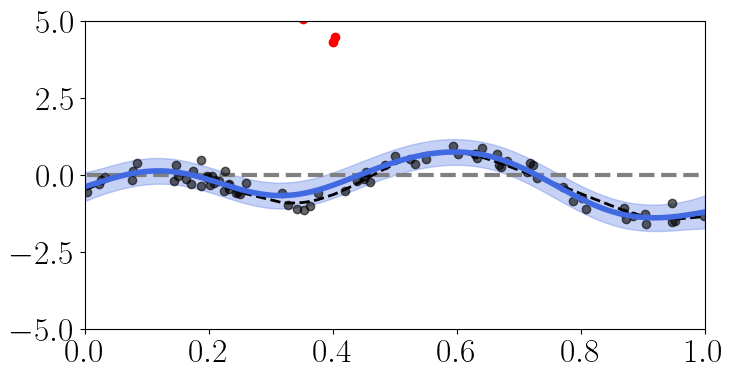

37


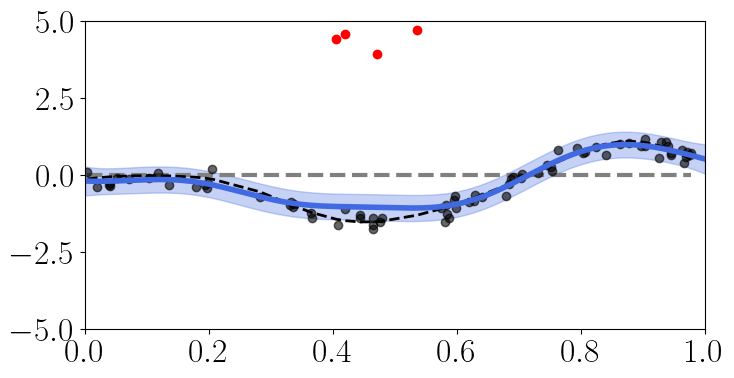

38


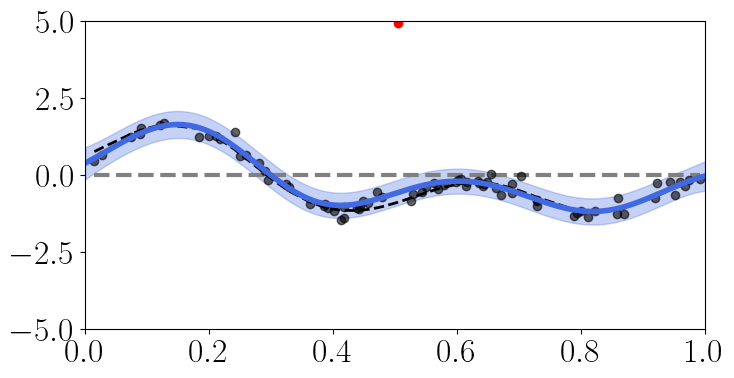

39


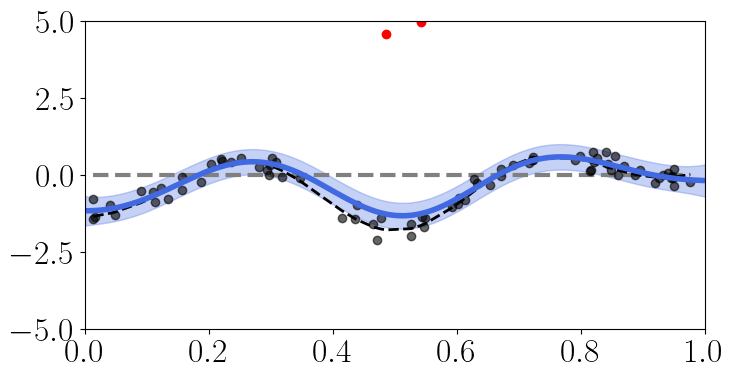

40


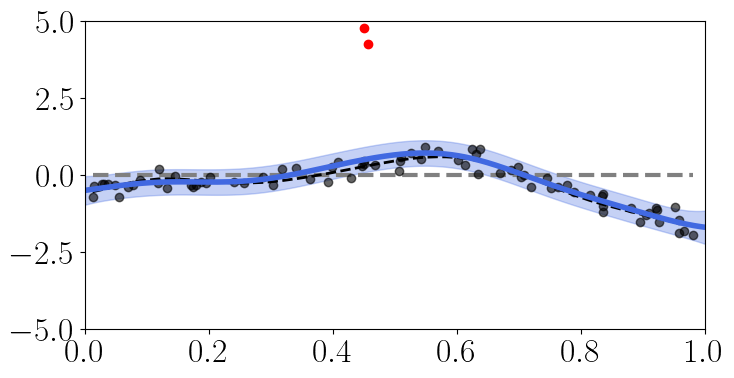

41


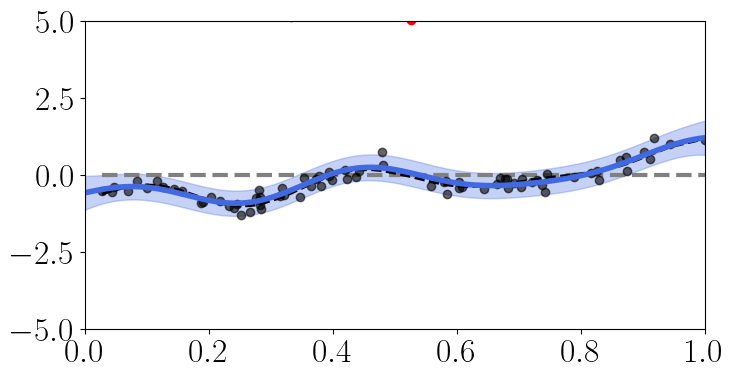

42


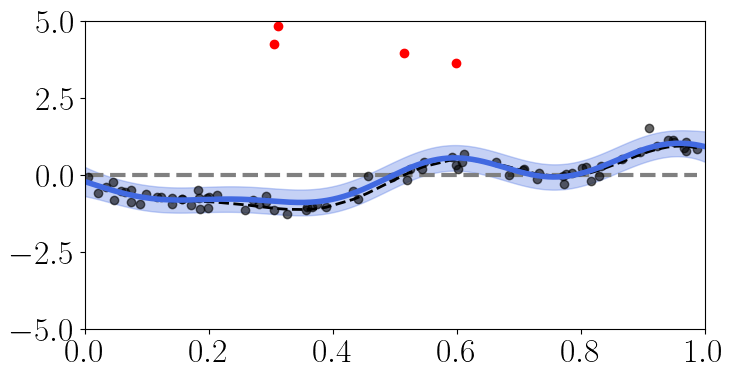

43


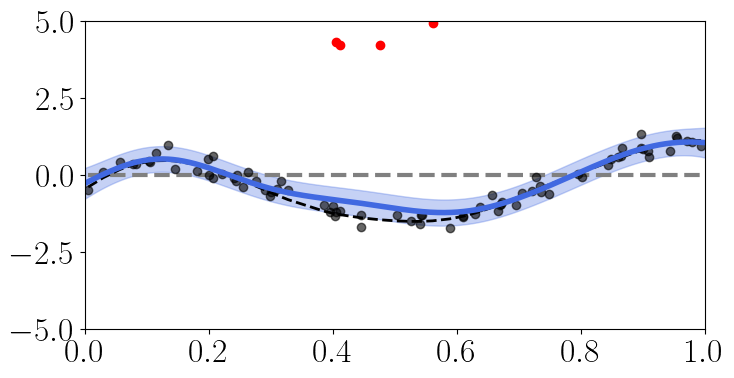

44


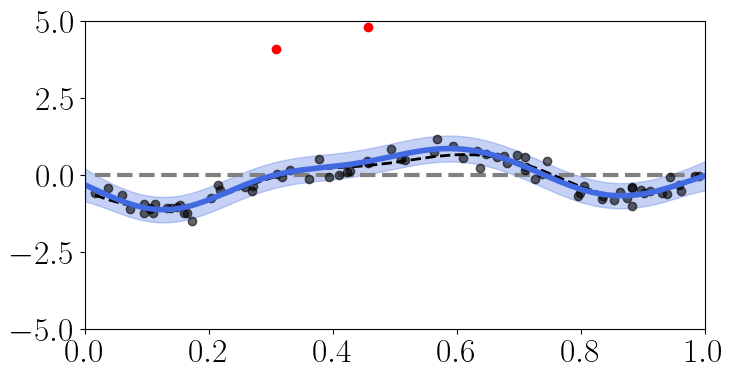

45


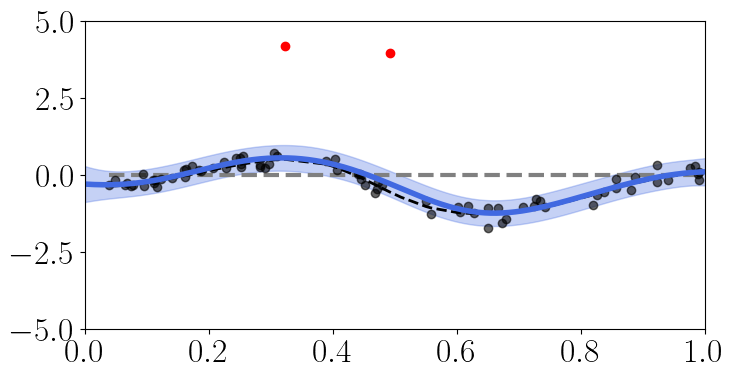

46


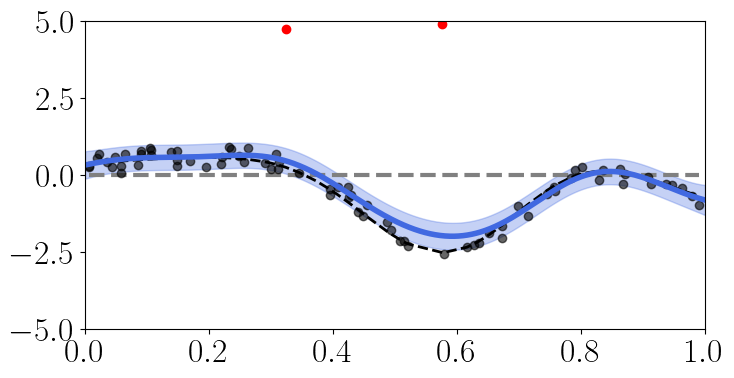

47


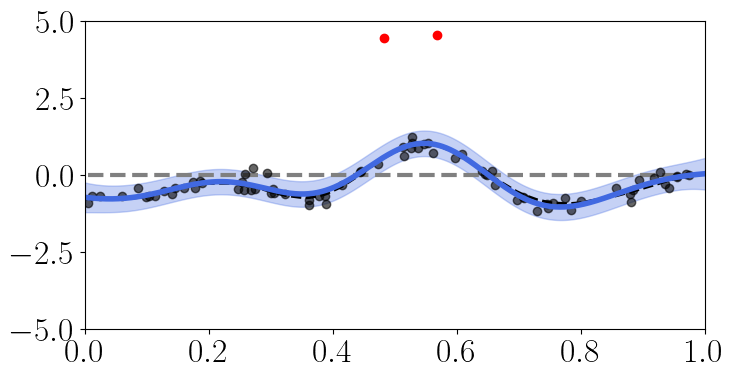

48


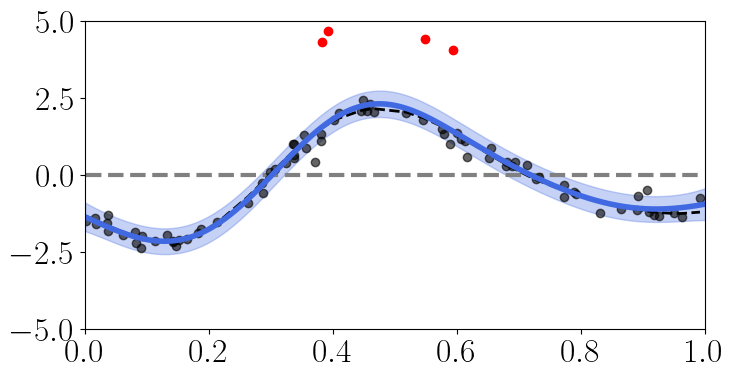

49


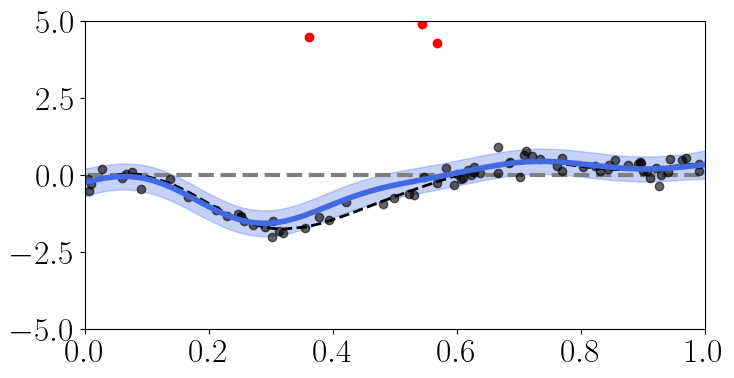

50


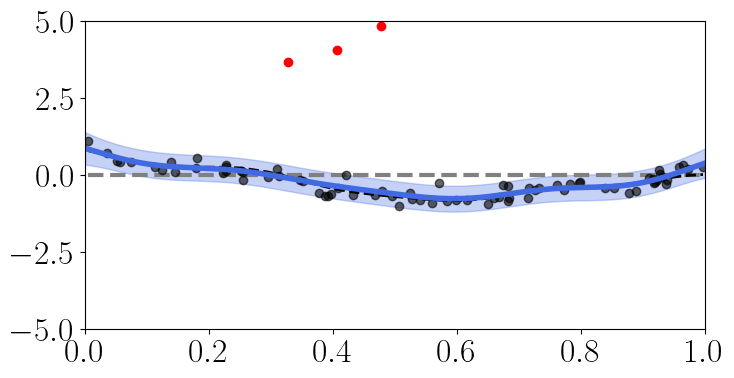

51


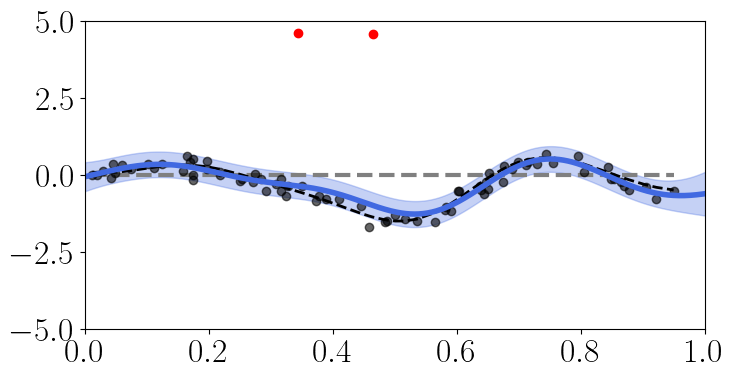

52


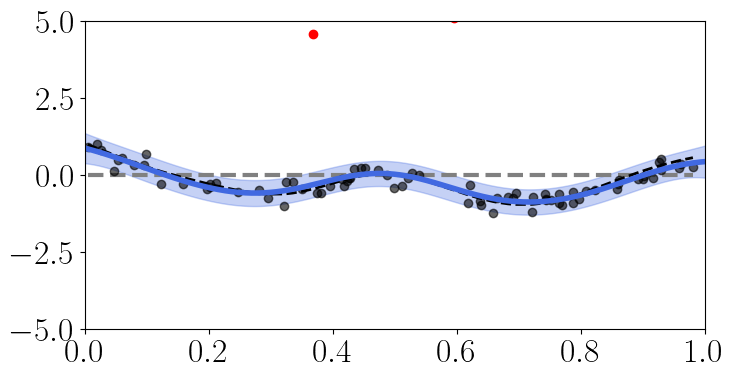

53


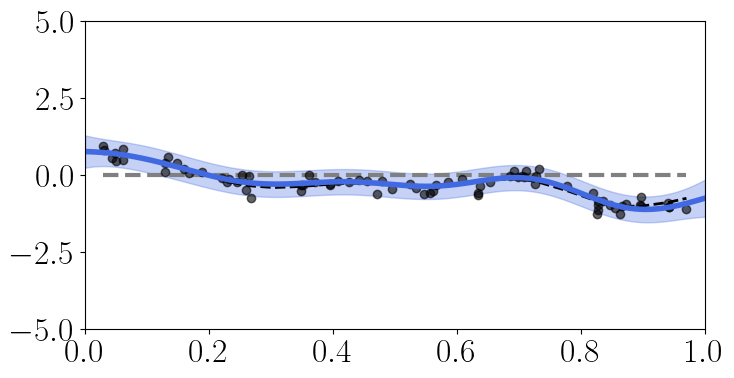

54


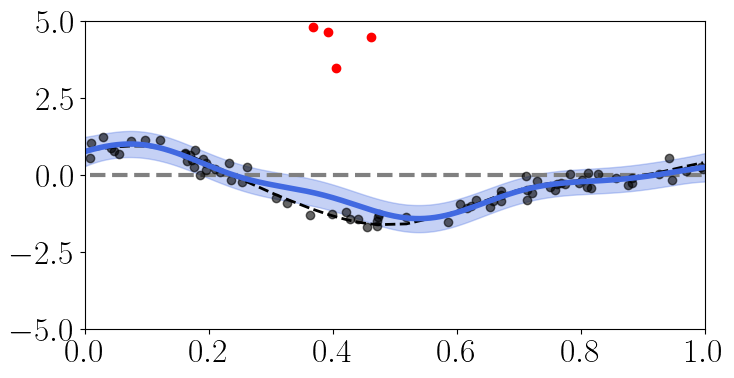

55


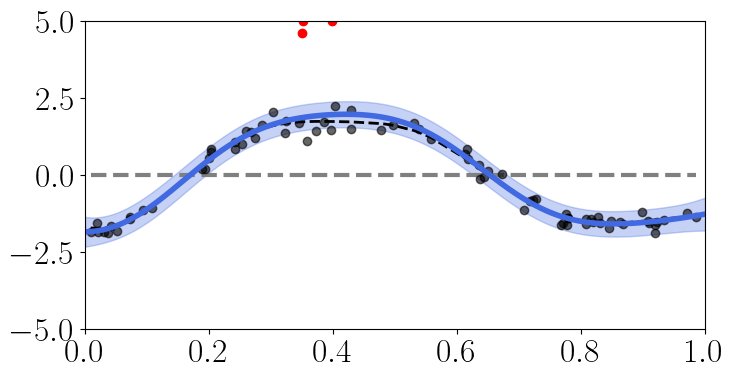

56


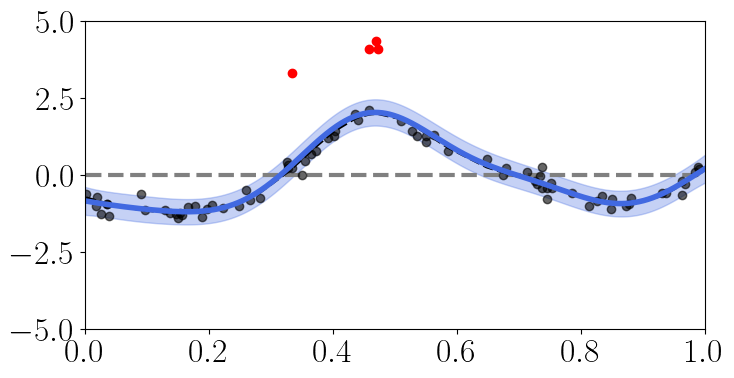

57


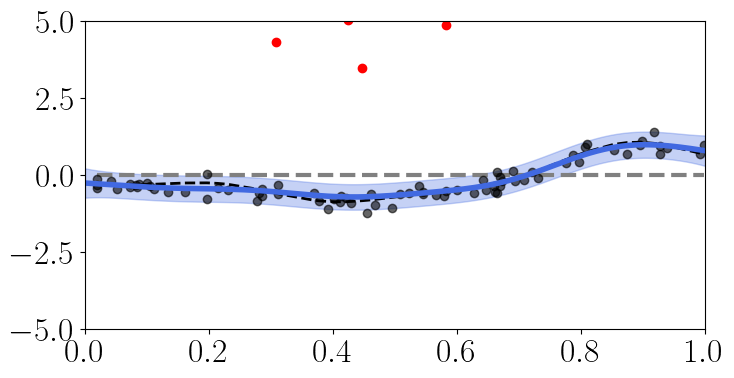

58


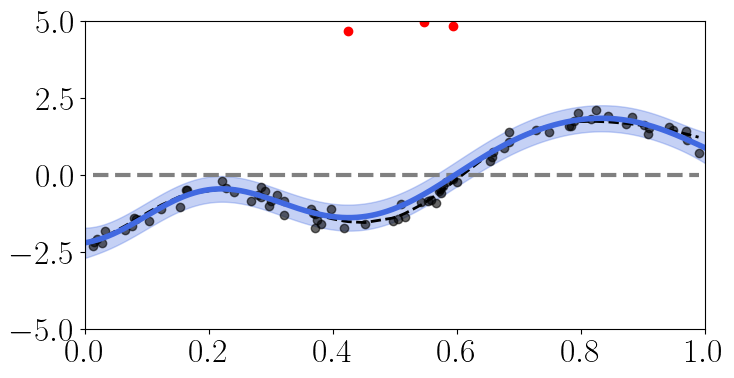

59


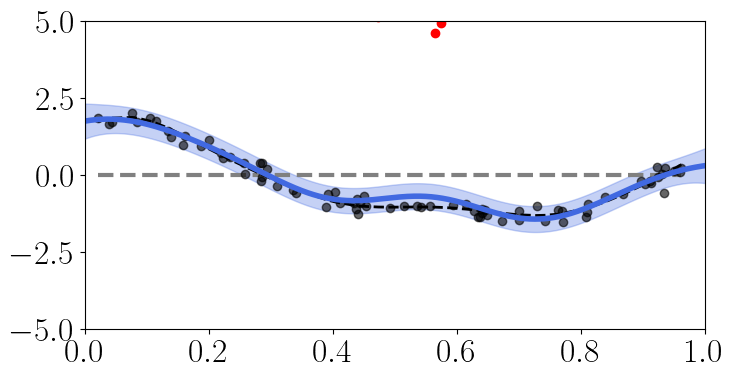

60


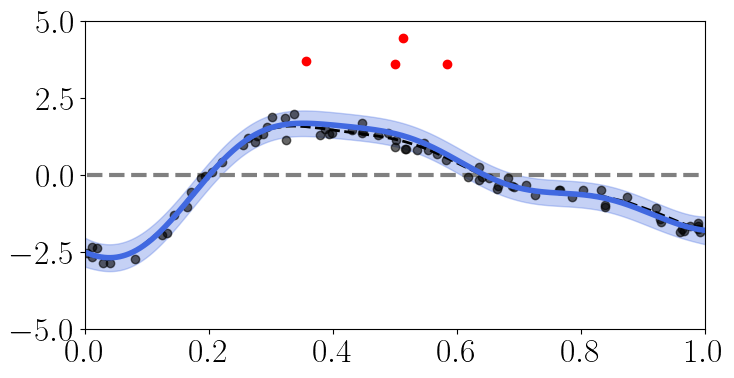

61


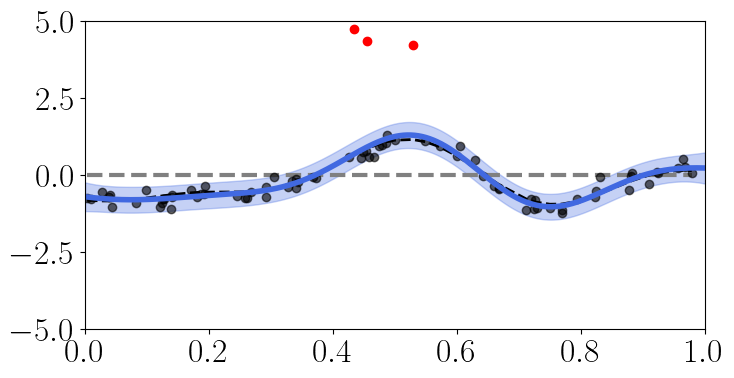

62


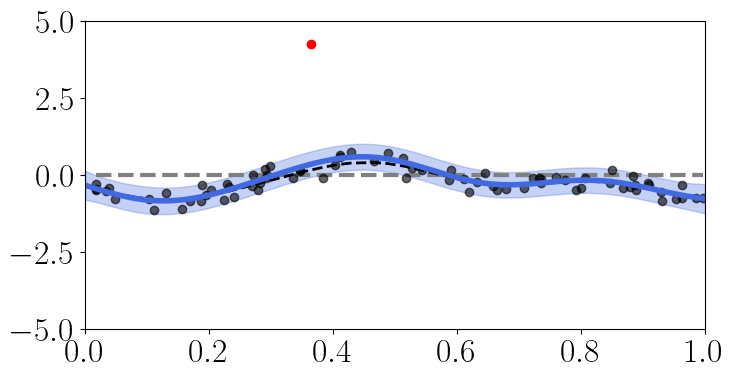

63


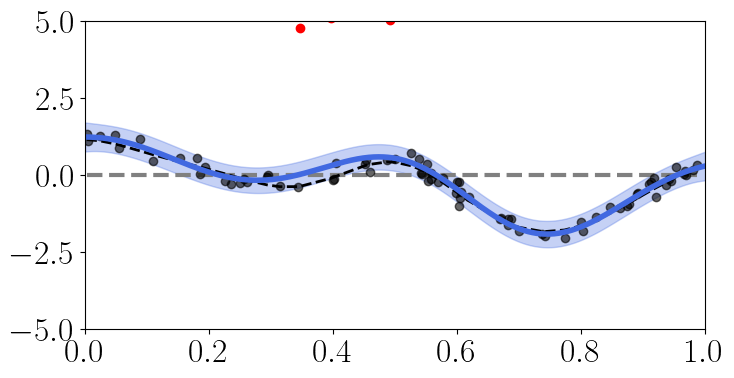

64


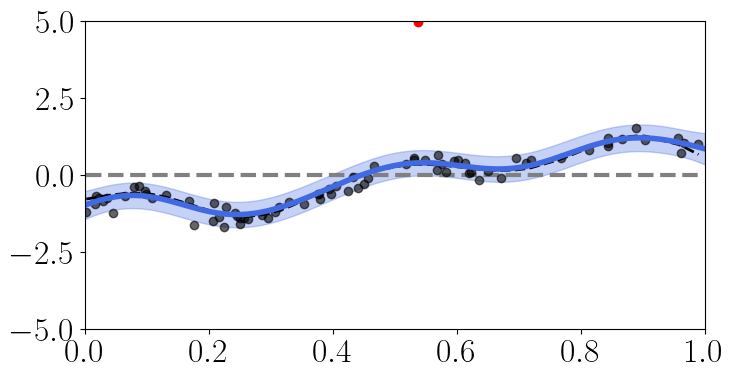

65


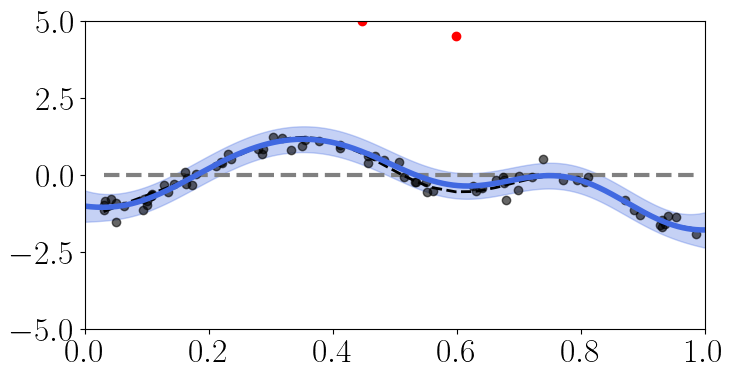

66


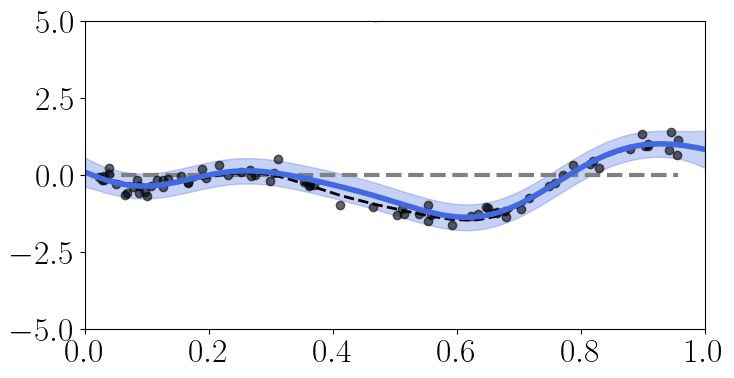

67


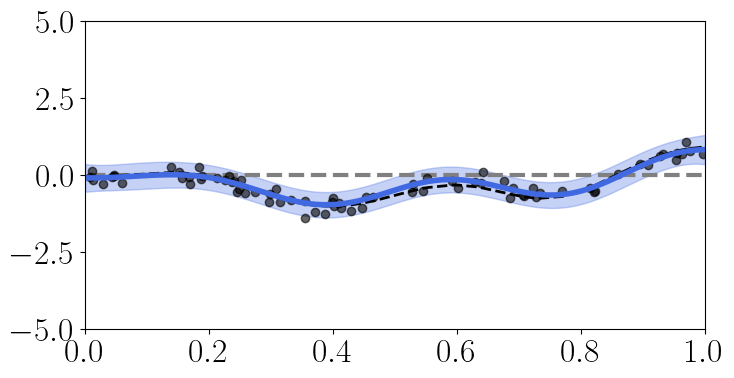

68


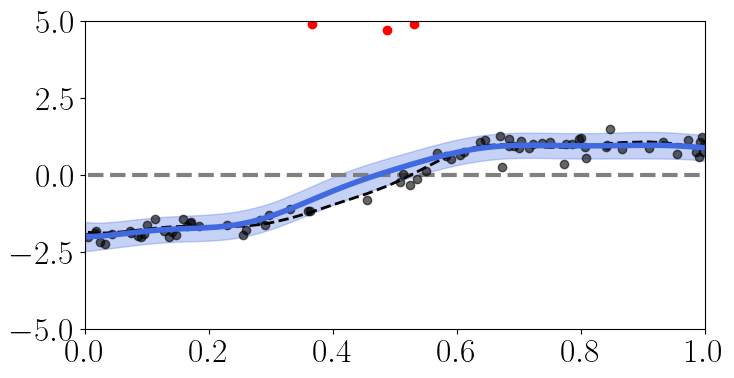

69


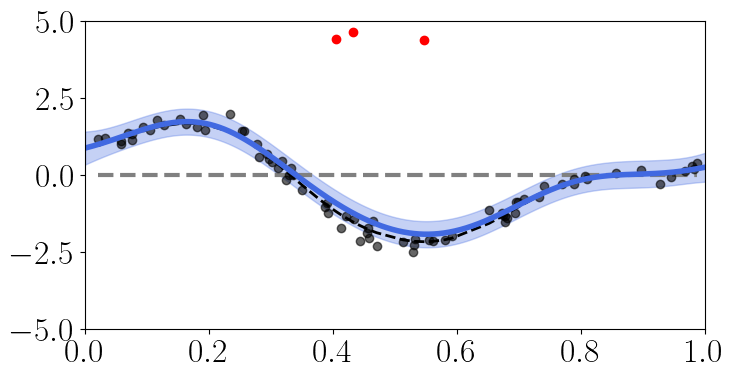

70


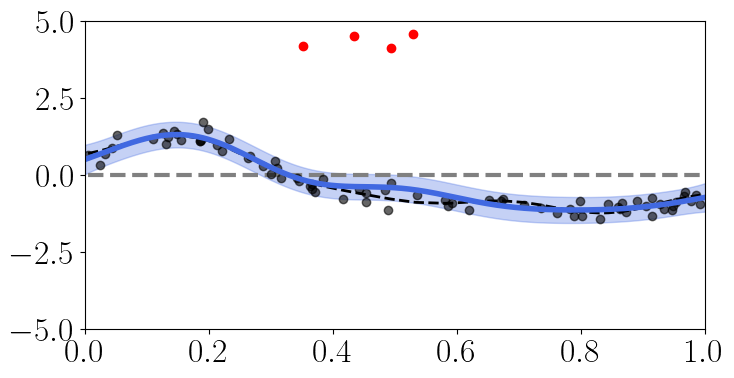

71


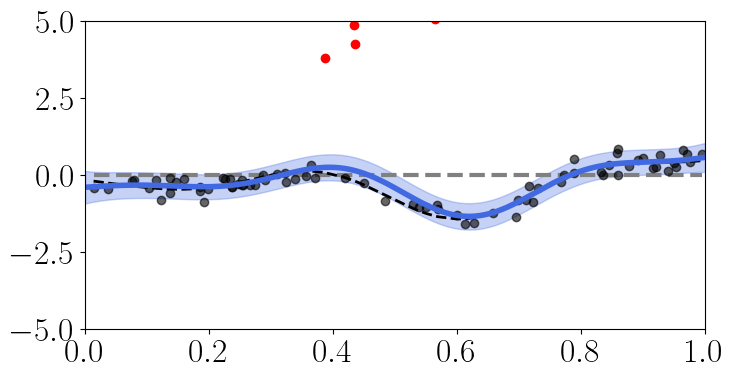

72


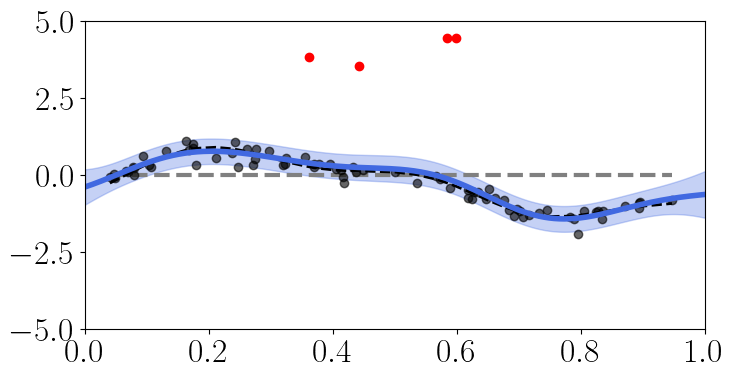

73


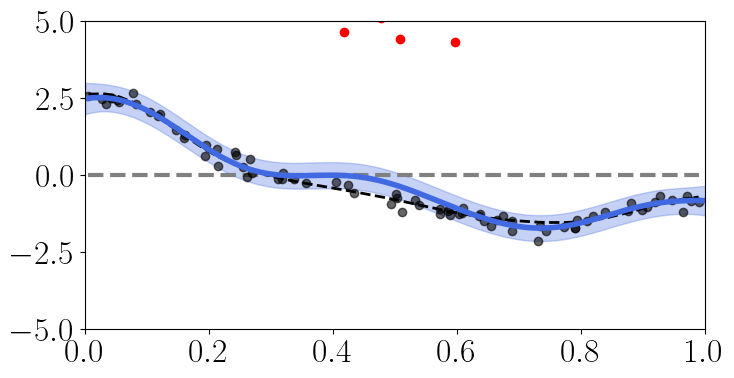

74


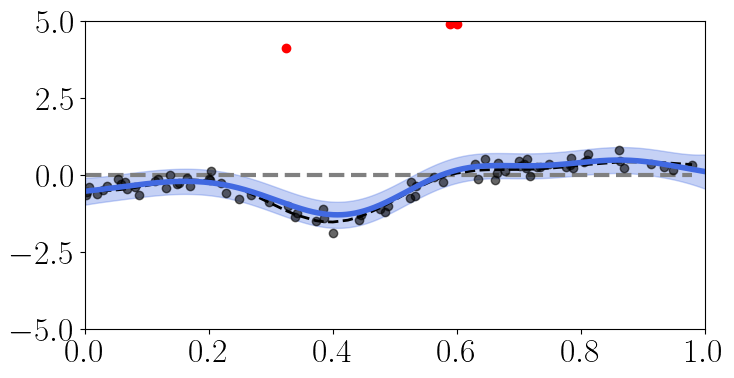

75


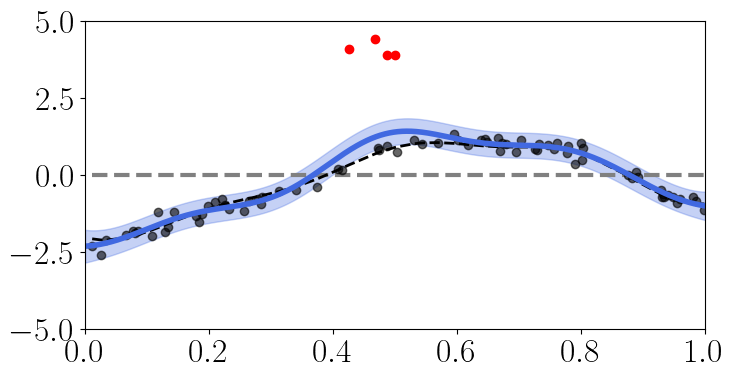

76


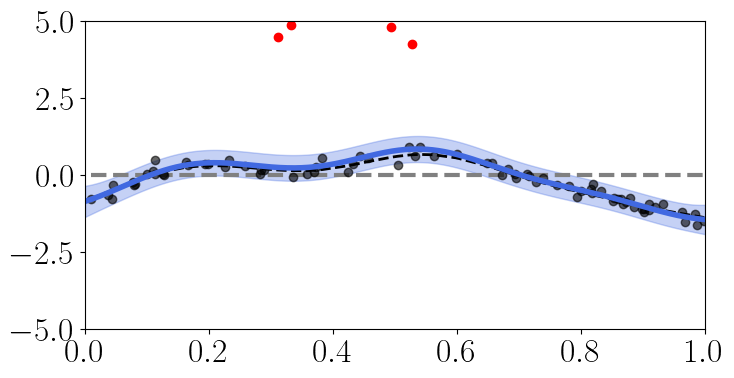

77


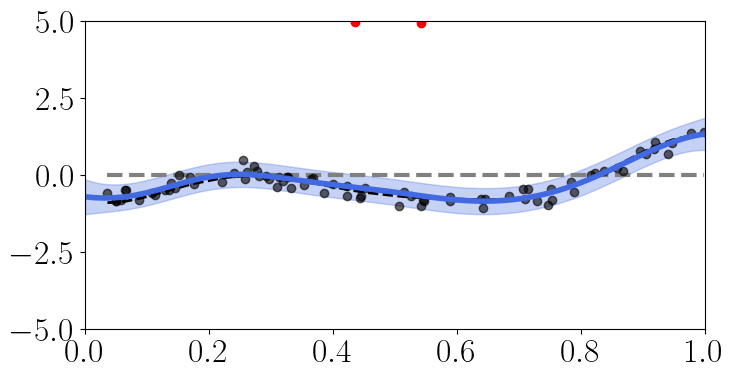

78


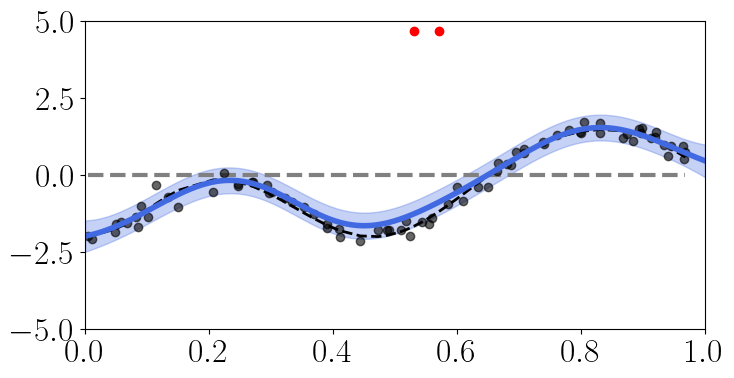

79


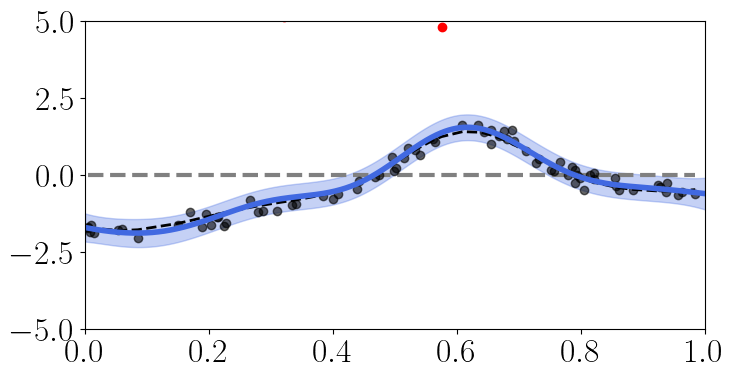

80


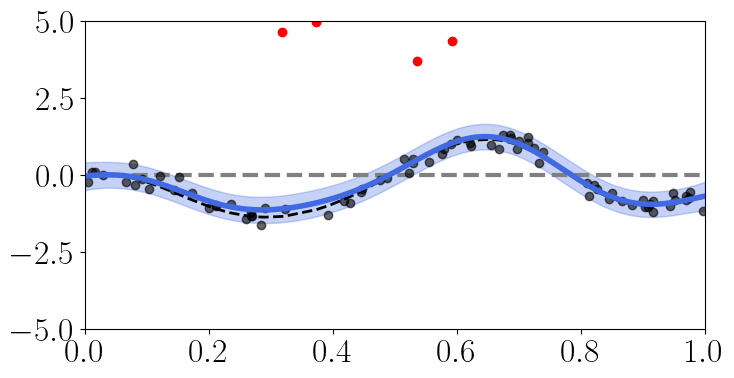

81


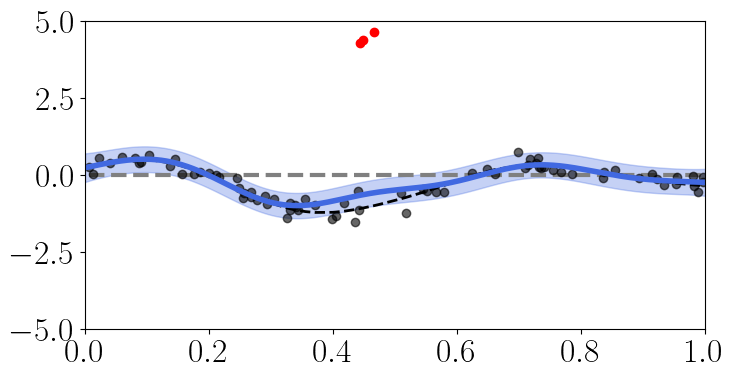

82


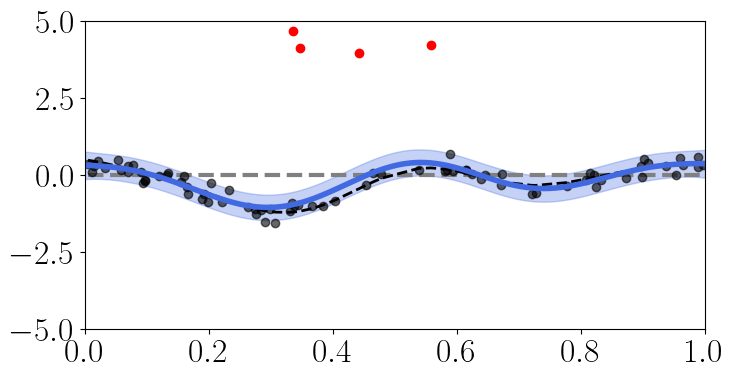

83


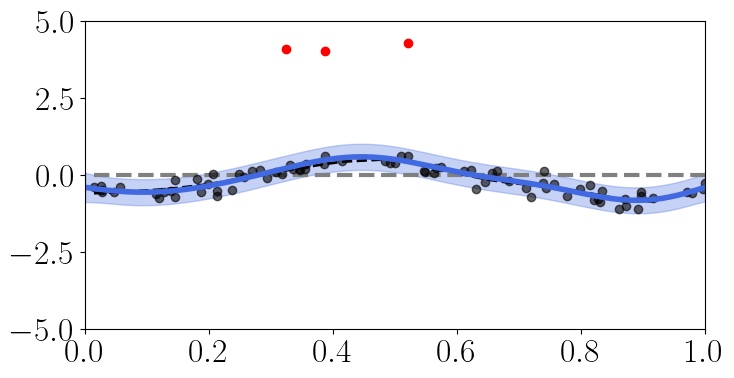

84


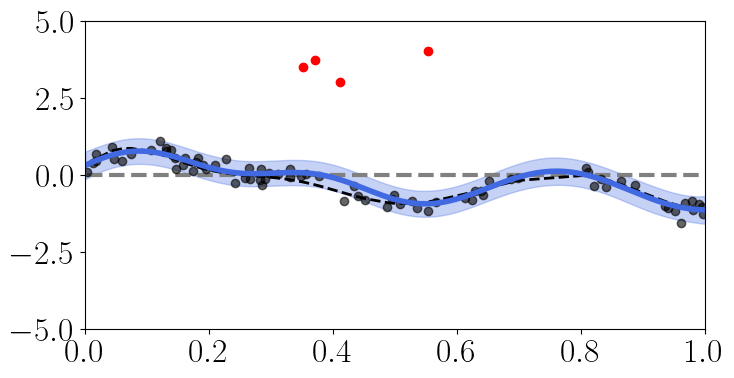

85


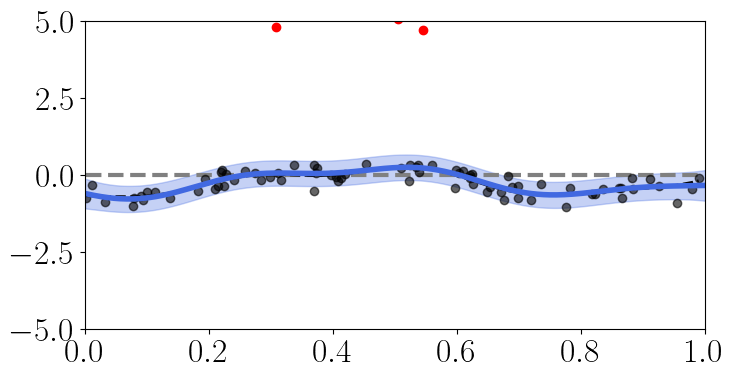

86


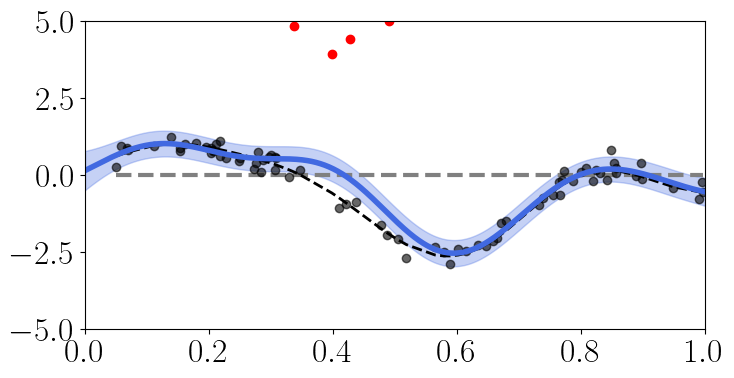

87


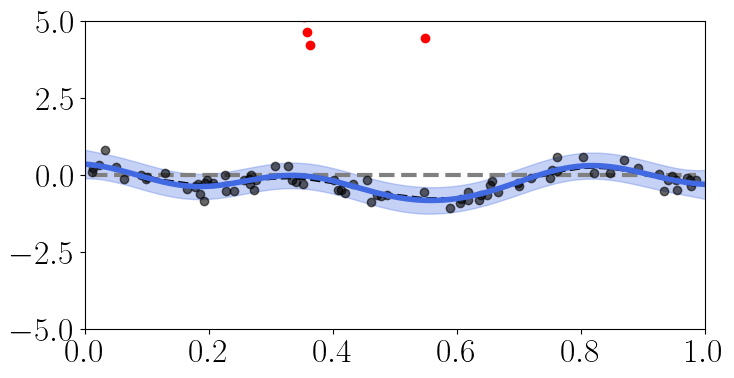

88


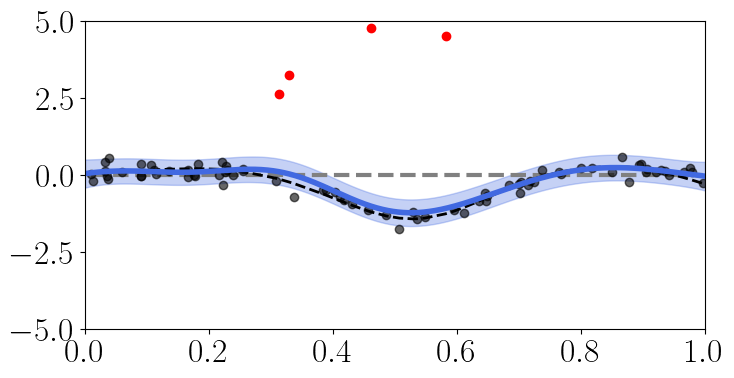

89


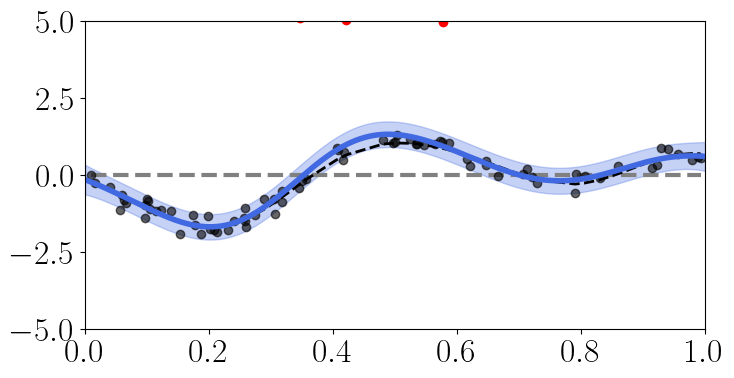

90


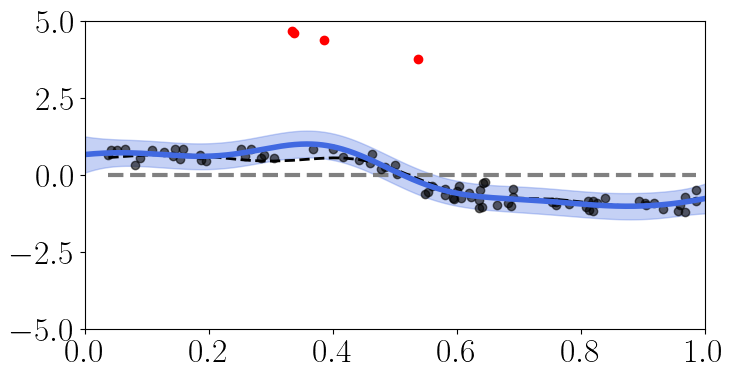

91


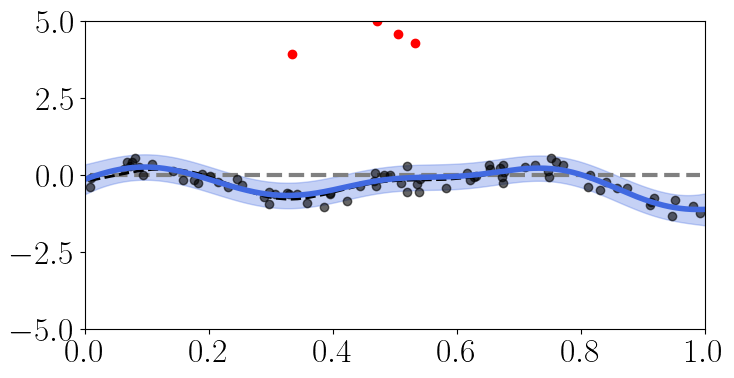

92


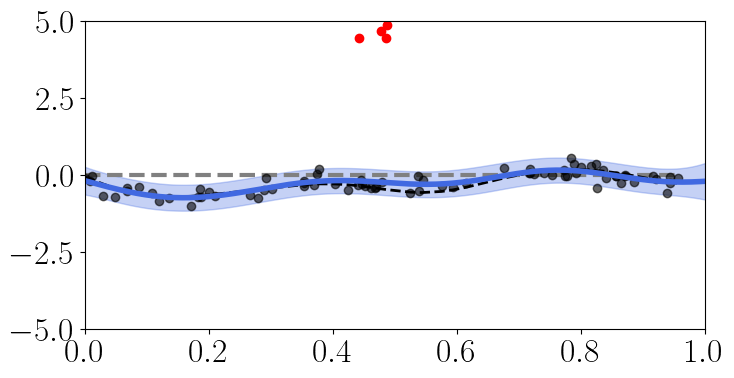

93


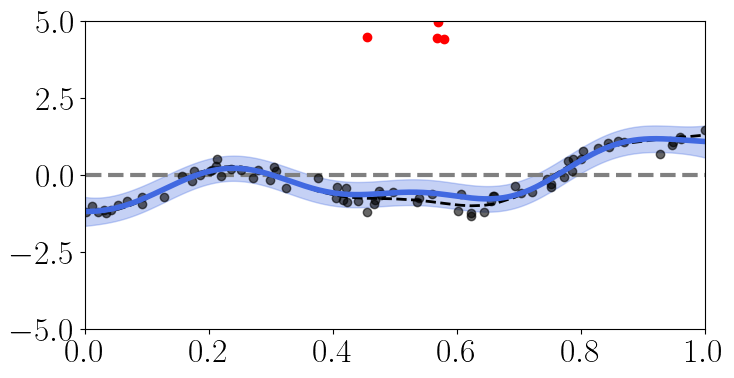

94


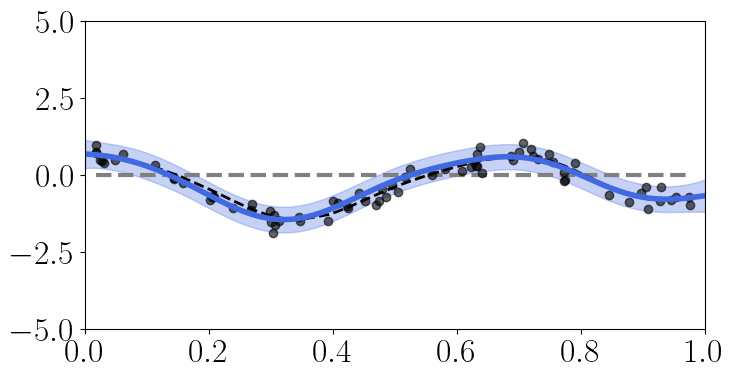

95


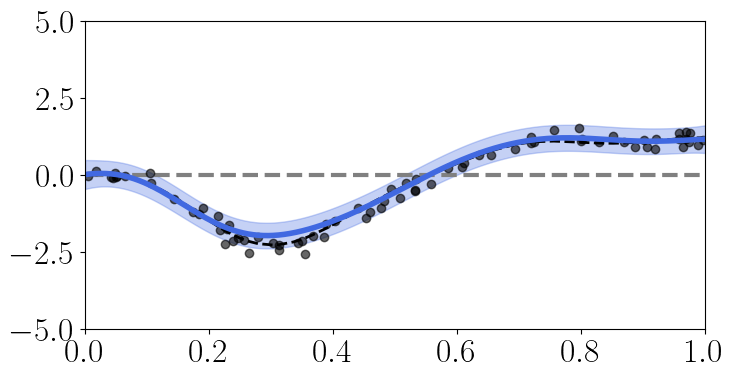

96


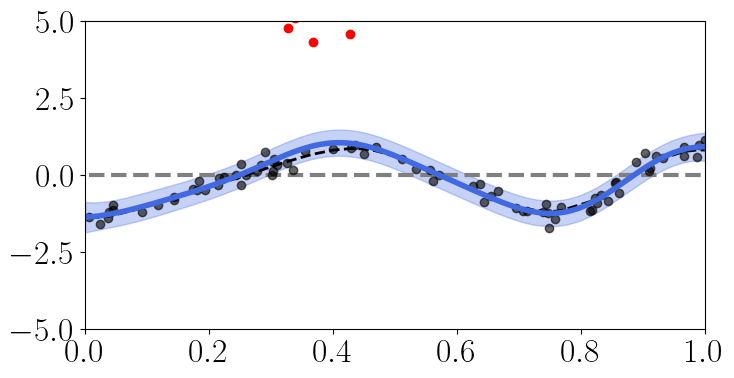

97


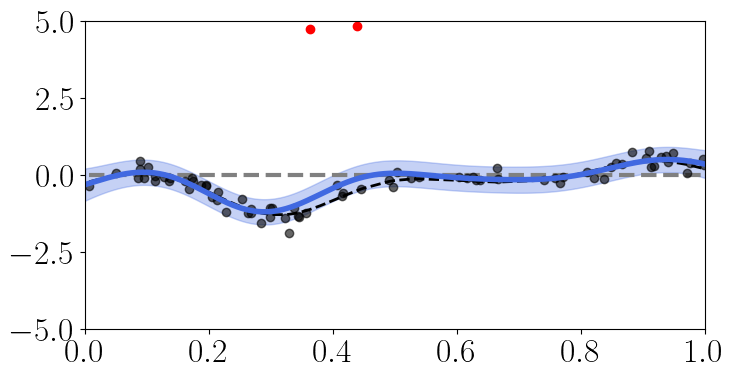

98


KeyboardInterrupt: 

In [2]:
for i in range(35, 100):
    np.random.seed(i)
    print(i)
    # Initialisation
    epsilon = 0.05
    n_points = 80
    length_scale = 0.15
    variance = 1
    noise_variance = 0.04

    # Simulation
    mean_func = ConstantMean(constant=0)
    rbf_kernel = RBFKernel(lengthscale=length_scale, variance=variance)

    x_train = np.sort(np.random.uniform(0, 1.0, n_points)).reshape(-1, 1)
    K_train = rbf_kernel(x_train, x_train)
    f_train = np.random.multivariate_normal(mean_func(x_train).flatten(), K_train).reshape(-1, 1)
    y_train = f_train + np.random.normal(0, np.sqrt(noise_variance), size=x_train.shape)

    # Add outliers
    outlier_range = np.where((x_train >= 0.3) & (x_train <= 0.60))[0]
    outlier_indices = np.sort(np.random.choice(outlier_range, int(n_points * epsilon), replace=False))
    outlier_values = np.random.normal(loc=5, scale=0.5, size=outlier_indices.shape[0])
    y_train[outlier_indices] = outlier_values.reshape(-1,1)
    # print(outlier_indices)

    mean_y_train = np.mean(y_train)
    # print(mean_y_train)
    y_train = y_train - mean_y_train

    # Mask to keep all indices that are NOT outliers
    mask = np.ones(len(x_train), dtype=bool)
    mask[outlier_indices] = False

    x_test = np.linspace(0, 1, 1000).reshape(-1, 1)

    prior_mean = ConstantMean(constant=0)
    rcgp_true = RCGPRegressor(mean=prior_mean, length_scale=length_scale, rbf_variance=variance, noise=noise_variance, epsilon=epsilon)
    rcgp_true.fit(x_train, y_train)

    mu_true, var_true = rcgp_true.predict(x_test)
    std_true = np.sqrt(var_true + rcgp_true.noise)

    plt.figure(figsize=(8, 4))
    plt.plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    plt.plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    plt.plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    plt.plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    plt.plot(x_test, mu_true.ravel(), color="royalblue")
    plt.fill_between(x_test.ravel(), mu_true.ravel() - 1.96 * std_true, mu_true.ravel() + 1.96 * std_true, alpha=0.3, color='royalblue')

    # # Plot
    # plt.plot(x_train, mean_y_train * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    # plt.plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)  # darker grey, slightly transparent
    # plt.plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)               # red dots
    # plt.plot(x_train, f_train, '--', color='black', linewidth=2)                              # thicker true function

    plt.ylim(-5, 5)
    plt.xlim(0, 1)
    plt.show()

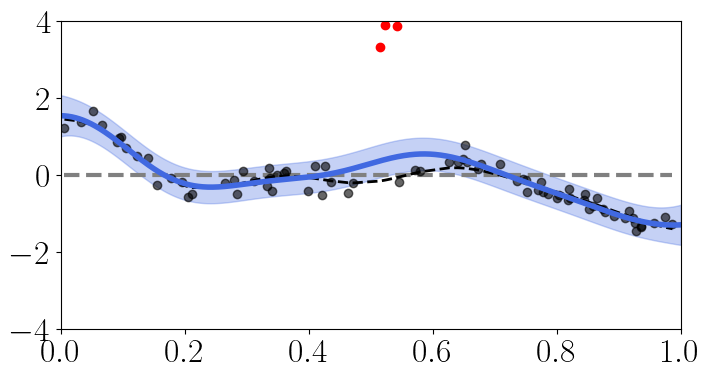

In [3]:
np.random.seed(209) # 38, 45, 46, 63
# Initialisation
epsilon = 0.05
n_points = 80
length_scale = 0.15
variance = 1
noise_variance = 0.04

# Simulation
mean_func = ConstantMean(constant=0)
rbf_kernel = RBFKernel(lengthscale=length_scale, variance=variance)

x_train = np.sort(np.random.uniform(0, 1.0, n_points)).reshape(-1, 1)
K_train = rbf_kernel(x_train, x_train)
f_train = np.random.multivariate_normal(mean_func(x_train).flatten(), K_train).reshape(-1, 1)
y_train = f_train + np.random.normal(0, np.sqrt(noise_variance), size=x_train.shape)

# Add outliers
outlier_range = np.where((x_train >= 0.45) & (x_train <= 0.55))[0]
outlier_indices = np.sort(np.random.choice(outlier_range, int(n_points * epsilon), replace=False))
outlier_values = np.random.normal(loc=3.5, scale=0.4, size=outlier_indices.shape[0])
y_train[outlier_indices] = outlier_values.reshape(-1,1)
# print(outlier_indices)

mean_y_train = np.mean(y_train)
# print(mean_y_train)
y_train = y_train - mean_y_train

# Mask to keep all indices that are NOT outliers
mask = np.ones(len(x_train), dtype=bool)
mask[outlier_indices] = False

x_test = np.linspace(0, 1, 1000).reshape(-1, 1)

prior_mean = ConstantMean(constant=0)
rcgp_true = RCGPRegressor(mean=prior_mean, length_scale=length_scale, rbf_variance=variance, noise=noise_variance, epsilon=epsilon)
rcgp_true.fit(x_train, y_train)

mu_true, var_true = rcgp_true.predict(x_test)
std_true = np.sqrt(var_true + rcgp_true.noise)

plt.figure(figsize=(8, 4))
plt.plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
plt.plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
plt.plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
plt.plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
plt.plot(x_test, mu_true.ravel(), color="royalblue")
plt.fill_between(x_test.ravel(), mu_true.ravel() - 1.96 * std_true, mu_true.ravel() + 1.96 * std_true, alpha=0.3, color='royalblue')

# # Plot
# plt.plot(x_train, mean_y_train * np.ones(len(x_train)), '--', color='grey', linewidth=3)
# plt.plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)  # darker grey, slightly transparent
# plt.plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)               # red dots
# plt.plot(x_train, f_train, '--', color='black', linewidth=2)                              # thicker true function

plt.ylim(-4, 4)
plt.xlim(0, 1)
plt.show()

Optimized length_scale: 0.0343, noise: 0.173062, rbf_variance: 5.3040
Optimized length_scale: 0.0282, noise: 0.122464, rbf_variance: 1.0886
loo_log: [-7.90958748e-02 -1.94107351e-01 -3.00513124e-02 -2.66270682e-01
 -1.50570675e-02 -3.26203515e-02 -6.39394785e-02 -5.08447519e-02
 -5.23078721e-02 -2.35362104e-01 -2.86847144e-02 -3.81741953e-02
 -1.59661756e-01 -1.40312949e-01 -1.70371702e-02 -3.22597117e-01
 -5.58226601e-02 -8.13007641e-02 -1.88795154e-01 -9.00097643e-02
 -3.05704716e-01 -6.56326320e-02  1.23494461e-04 -1.23866296e-01
 -5.78947768e-02 -5.66089208e-02 -2.96895528e-01 -3.24074926e-01
 -7.94808092e-01]
weights: []


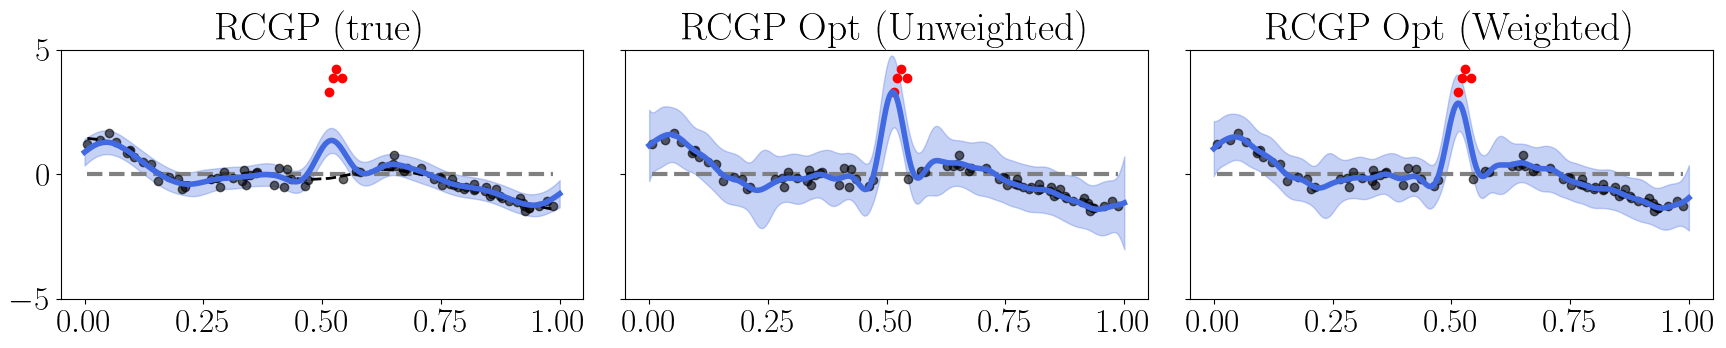

In [4]:
initial_length_scale = 0.04
initial_rbf_variance = 0.1
initial_noise = 0.04

# Create subplot figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

# --- Plot 1: RCGP with weighted LOO-CV not optimized ---
rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
rcgp_w.fit(x_train, y_train)

mu_w, var_w = rcgp_w.predict(x_test)
std_w = np.sqrt(var_w + rcgp_w.noise)

axs[0].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[0].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[0].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
axs[0].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
axs[0].plot(x_test, mu_w.ravel(), color="royalblue")
axs[0].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
axs[0].set_title("RCGP (true)")

# --- Plot 2: RCGP with unweighted LOO-CV optimization ---
rcgp = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
rcgp.fit(x_train, y_train)
rcgp.optimize_loo_cv(weighted=False, print_opt_param=True, print_iter_param=False)

mu, var = rcgp.predict(x_test)
std = np.sqrt(var + rcgp.noise)

axs[1].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[1].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[1].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
# axs[1].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
axs[1].plot(x_test, mu.ravel(), color="royalblue")
axs[1].fill_between(x_test.ravel(), mu.ravel() - 1.96 * std, mu.ravel() + 1.96 * std, alpha=0.3, color='royalblue')
axs[1].set_title("RCGP Opt (Unweighted)")

# --- Plot 3: RCGP with weighted LOO-CV optimization ---
rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
rcgp_w.fit(x_train, y_train)
rcgp_w.optimize_loo_cv(weighted=True, print_opt_param=True, print_iter_param=False)

# print(rcgp_w.loo_cv(weighted=True, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise))
print('loo_log:', rcgp_w.predictive_log_prob.reshape(-1)[51:82])
print('weights:', rcgp_w.weight.reshape(-1)[98:116])

mu_w, var_w = rcgp_w.predict(x_test)
std_w = np.sqrt(var_w + rcgp_w.noise)

axs[2].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[2].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[2].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
# axs[2].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
axs[2].plot(x_test, mu_w.ravel(), color="royalblue")
axs[2].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
axs[2].set_title("RCGP Opt (Weighted)")

# Common settings
for ax in axs:
    ax.set_ylim(-5, 5)

plt.tight_layout()
plt.show()


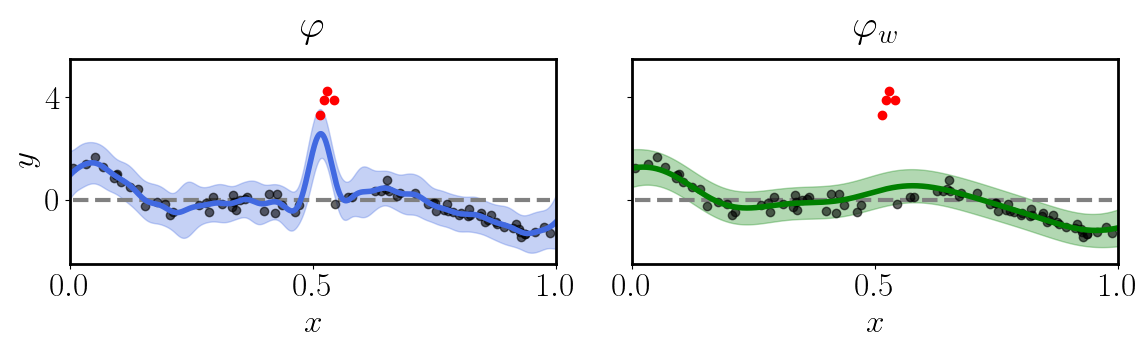

In [209]:
# Create subplot figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axs[0].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[0].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[0].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
axs[0].plot(x_test, mu.ravel(), color="royalblue")
axs[0].fill_between(x_test.ravel(), mu.ravel() - 1.96 * std, mu.ravel() + 1.96 * std, alpha=0.3, color='royalblue')
axs[0].set_ylabel(r'$y$')
axs[0].set_title(r"$\varphi$", pad=15)

# axs[0].plot(x_test, mu.ravel(), color="royalblue", label=r'RCGP ($\varphi$)')
# axs[0].legend(loc='lower right', frameon=False, borderaxespad=0.1, handlelength=1.5)

axs[1].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[1].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[1].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
axs[1].plot(x_test, mu_w.ravel(), color="green")
axs[1].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='green')
axs[1].set_title(r"$\varphi_{w}$", pad=15)

# axs[1].plot(x_test, mu_w.ravel(), color="green", label=r'RCGP ($\varphi_w$)')
# axs[1].legend(loc='lower right', frameon=False, borderaxespad=0.1, handlelength=1.5)


for ax in axs:
    ax.set_ylim(-2.5, 5.5)
    ax.set_xlim(0, 1)
    ax.set_yticks([0, 4])
    ax.set_xticks([0, 0.5, 1.0])
    ax.set_xlabel(r'$x$')
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    
# plt.subplots_adjust(wspace=0.01)
plt.tight_layout()
plt.show()

# fig.savefig("./results/RCGP_hyperparam_opt.pdf", format='pdf', bbox_inches='tight')

## Test

0
loo_log: [-0.61554283 -0.22725279 -0.1385765  -0.40924946 -0.16454764 -0.36919885
 -0.66553621 -0.1841948  -0.23880118]
weights: []


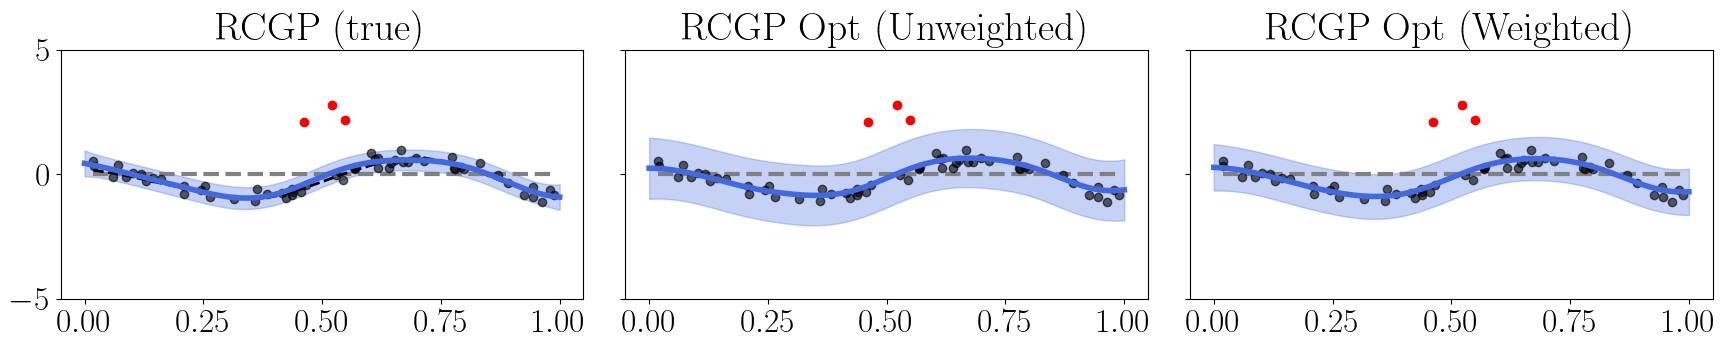

1
loo_log: [-0.94305092 -0.43768908 -0.65947672 -0.39619127 -0.44061332 -0.47583175
 -0.48573858 -0.50016057 -0.55948755]
weights: []


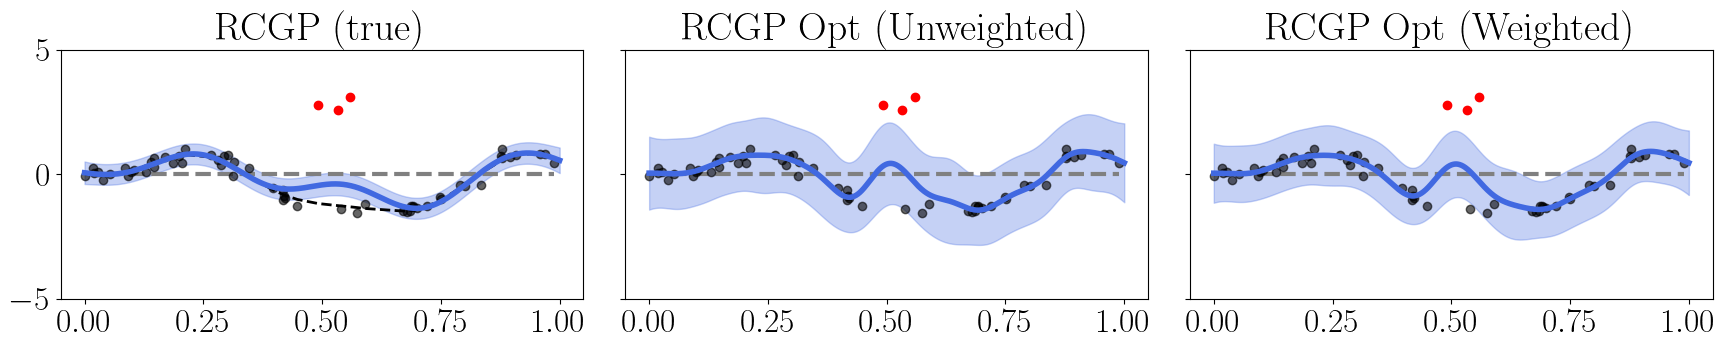

2
loo_log: [-0.48863646 -0.52831253 -0.50731122 -1.03997137 -0.50214747 -0.65573786
 -0.73760252 -0.58843175 -0.85332865]
weights: []


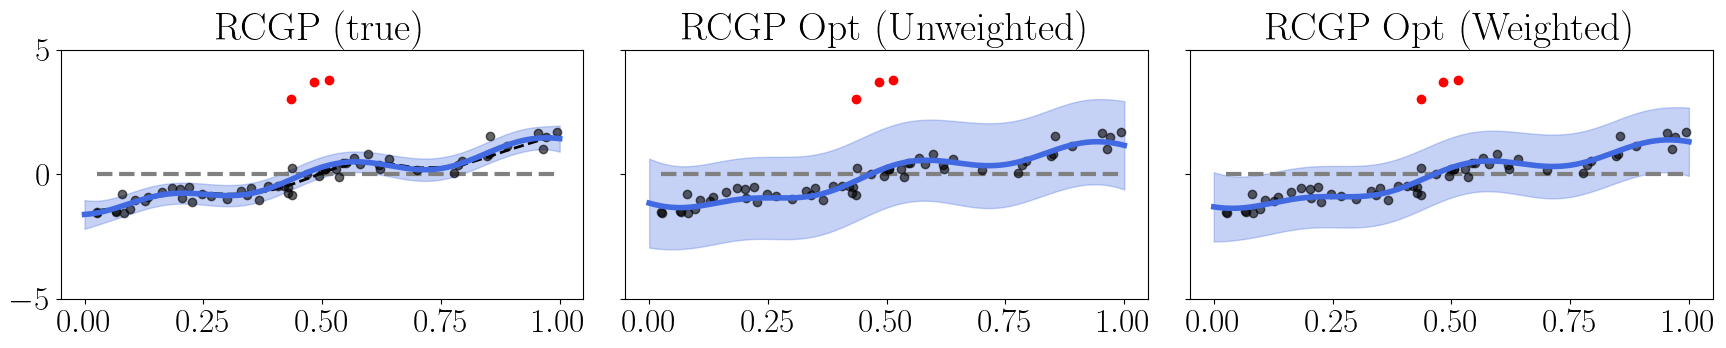

3
loo_log: [-0.68362073 -0.91082199 -0.7095026  -0.84862719 -0.64307603 -0.66645765
 -0.67037854 -0.77522694 -1.66423632]
weights: []


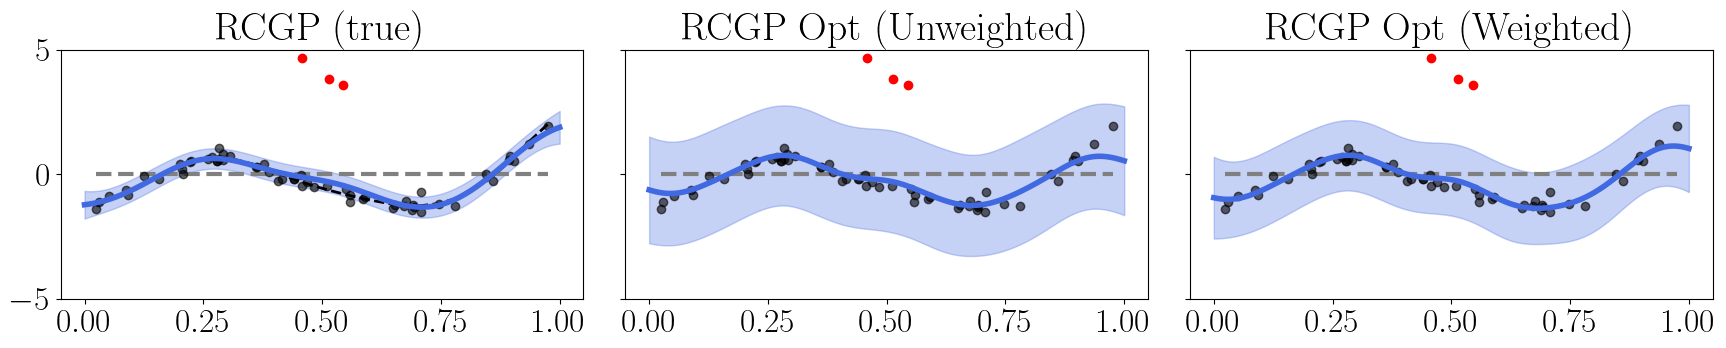

4
loo_log: [-0.06976471 -0.00476966 -0.37259126 -0.3357041   0.28934658  0.26899073
  0.27898941 -0.15404016 -0.23699737]
weights: []


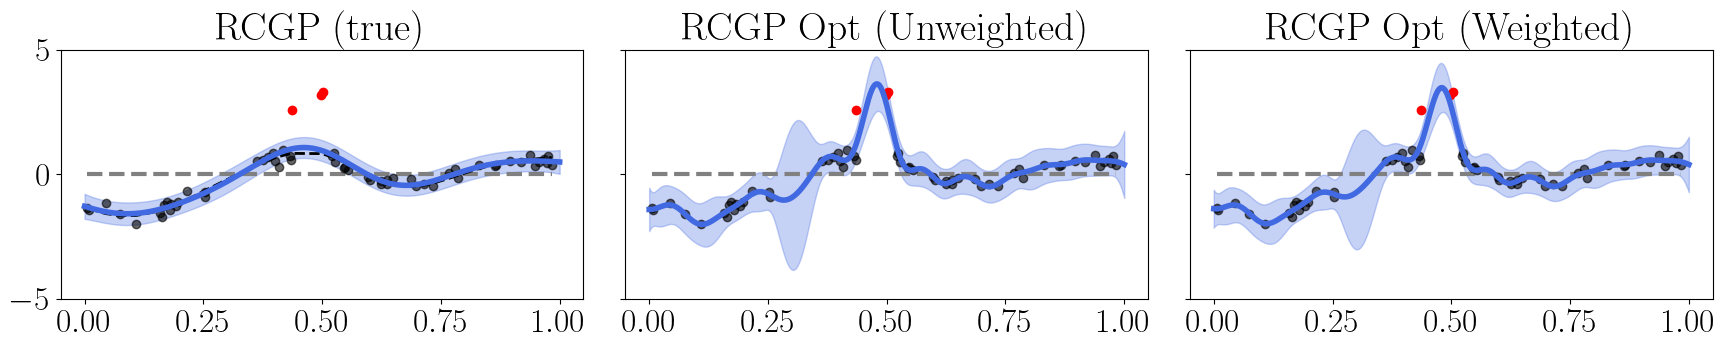

5
loo_log: [-0.44213534 -0.5753842  -0.42881806 -0.47752692 -0.42647676 -0.42305794
 -0.42330385 -0.5056209  -0.44619411]
weights: []


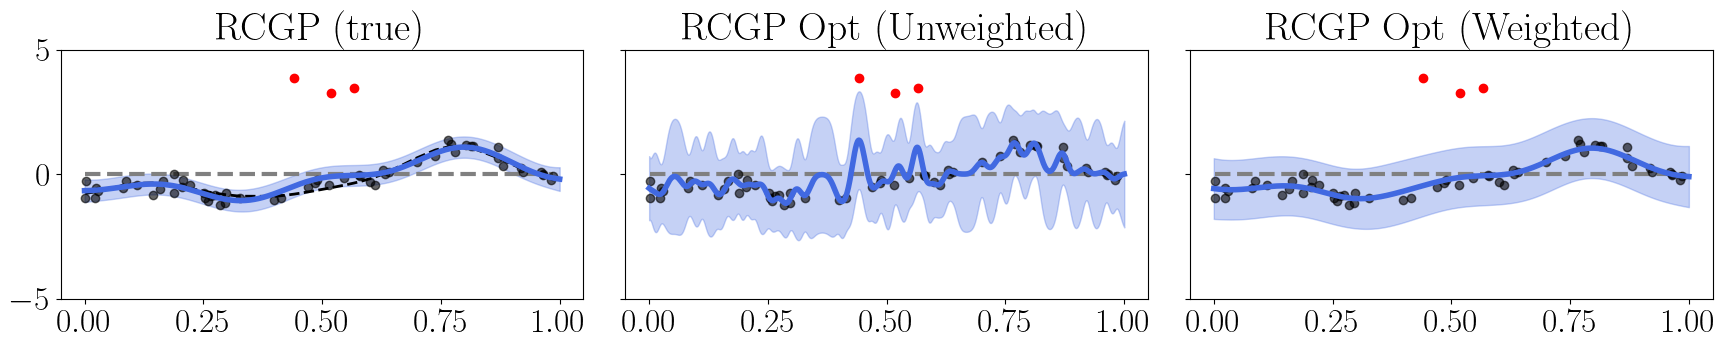

6
loo_log: [ 0.18741043 -0.07403962 -0.09493668 -0.21214093 -0.30477522 -0.23065009
  0.03431547  0.13240558 -0.34575637]
weights: []


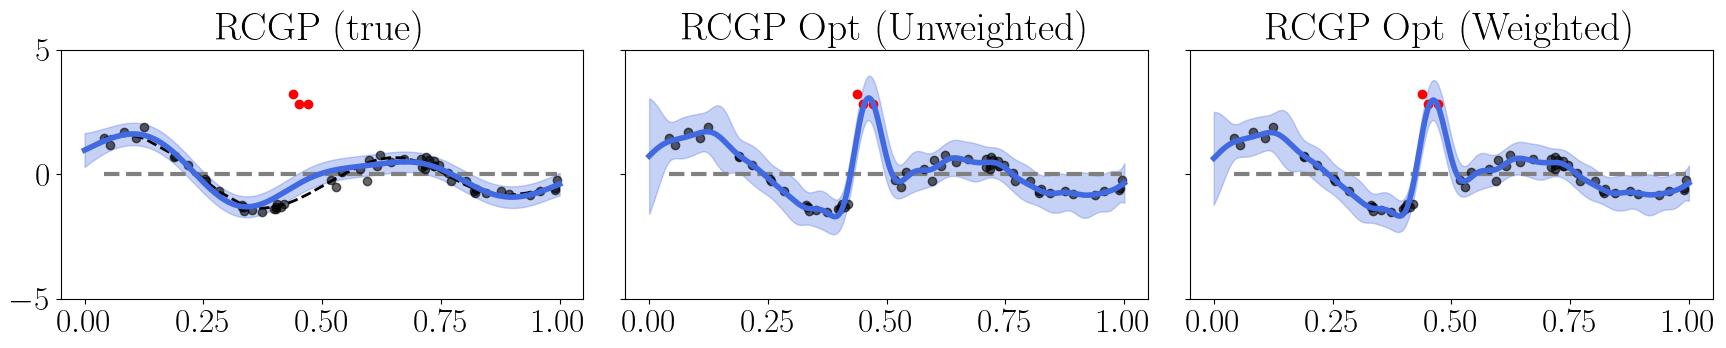

7
loo_log: [-0.47755479 -0.24026206 -0.29661882 -0.31199013 -0.26755537 -0.38454946
 -0.31405777 -0.3195944  -0.28435145]
weights: []


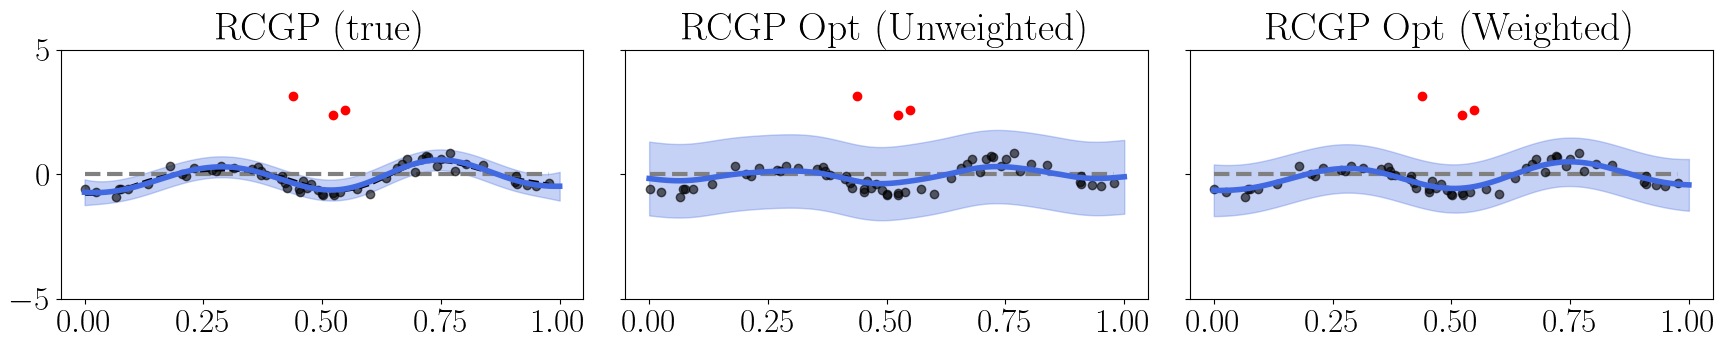

8
loo_log: [-1.74548466  0.11271368  0.12912906 -0.40884477 -0.54551526 -0.13637855
 -0.2654165  -0.1979323  -0.57673008]
weights: []


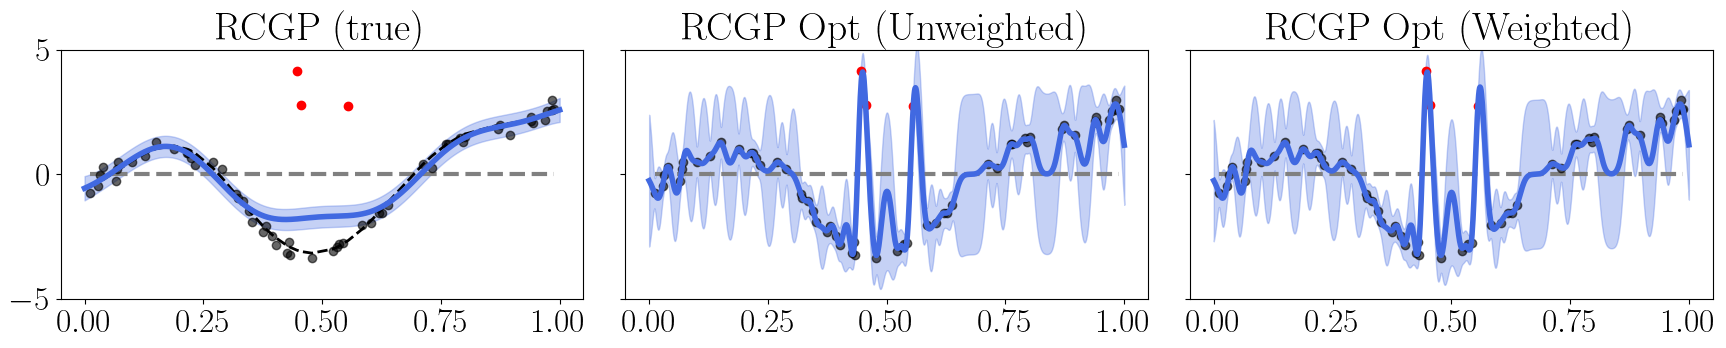

9
loo_log: [-0.32577878 -0.53048566 -0.44348739 -0.52014212 -0.3443505  -0.33179101
 -0.48459211 -0.5513383  -0.73300962]
weights: []


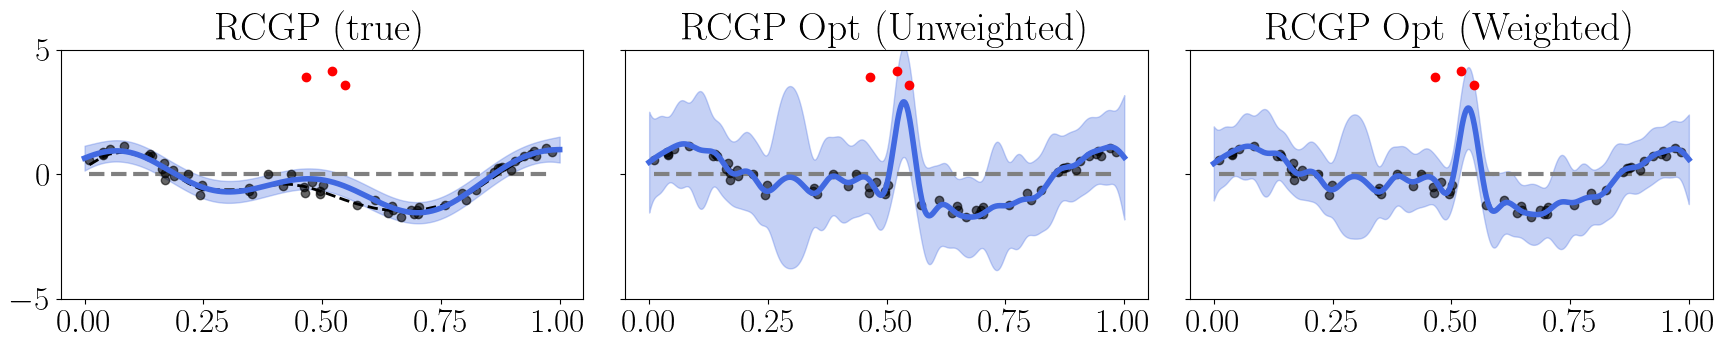

10
loo_log: [-0.03601168  0.03958229  0.01199888 -0.13725388 -0.01719638 -0.37785021
 -0.05913746 -0.15561952 -0.31142523]
weights: []


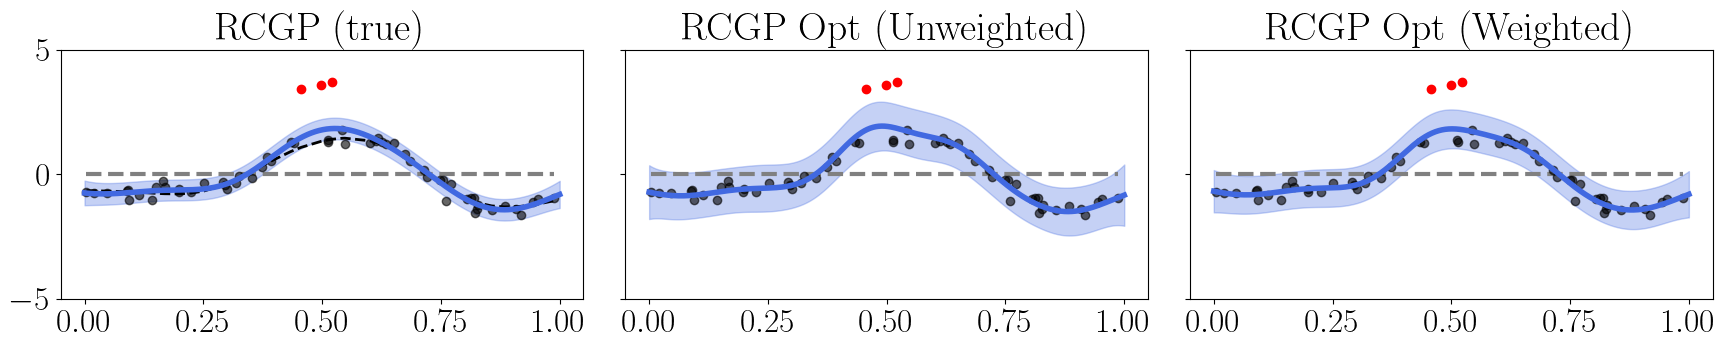

11
loo_log: [-0.48758358 -0.51037697 -0.49845738 -0.48321385 -0.48857765 -0.50135555
 -0.5750094  -0.52621592 -0.69676427]
weights: []


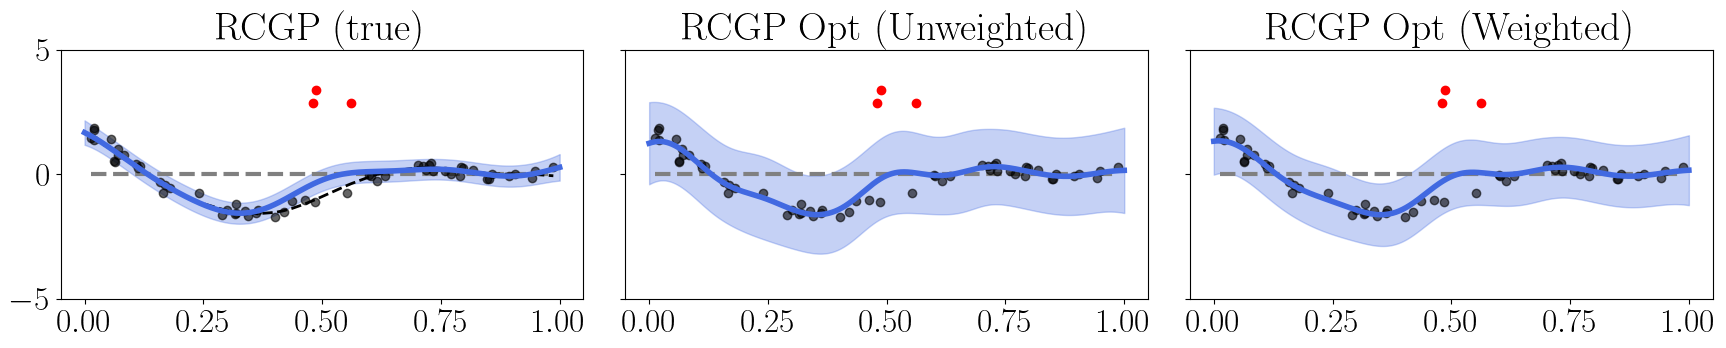

12
loo_log: [-0.59670508 -0.55008316 -0.54785093 -0.52285689 -0.48576708 -0.57903063
 -0.5144369  -0.5113404  -1.26746043]
weights: []


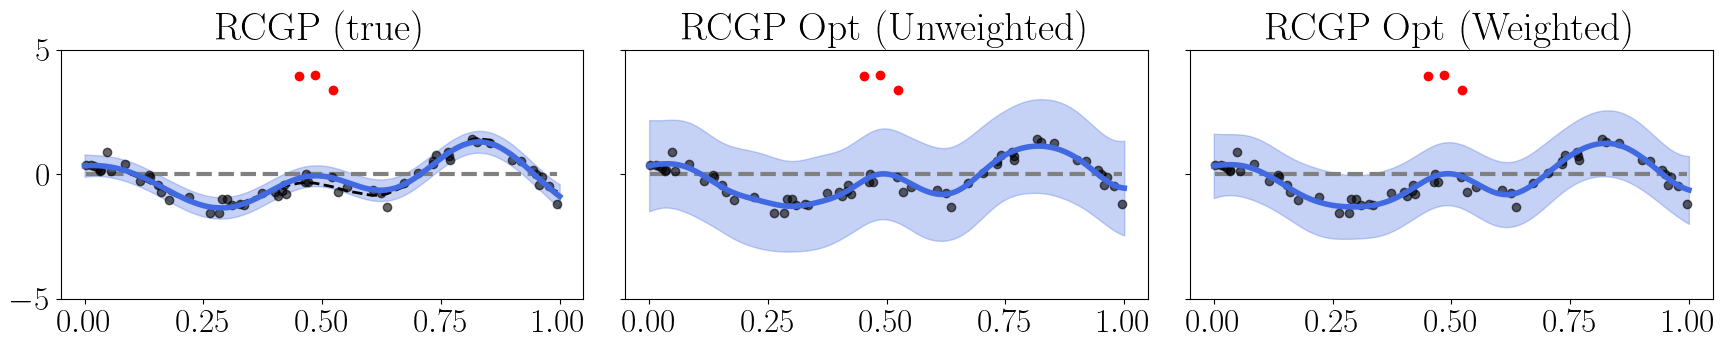

13
loo_log: [-0.3690205  -0.42229794  0.46932618  0.44596772  0.20148184 -0.59402576
 -2.27245104 -0.22601057 -0.07473915]
weights: []


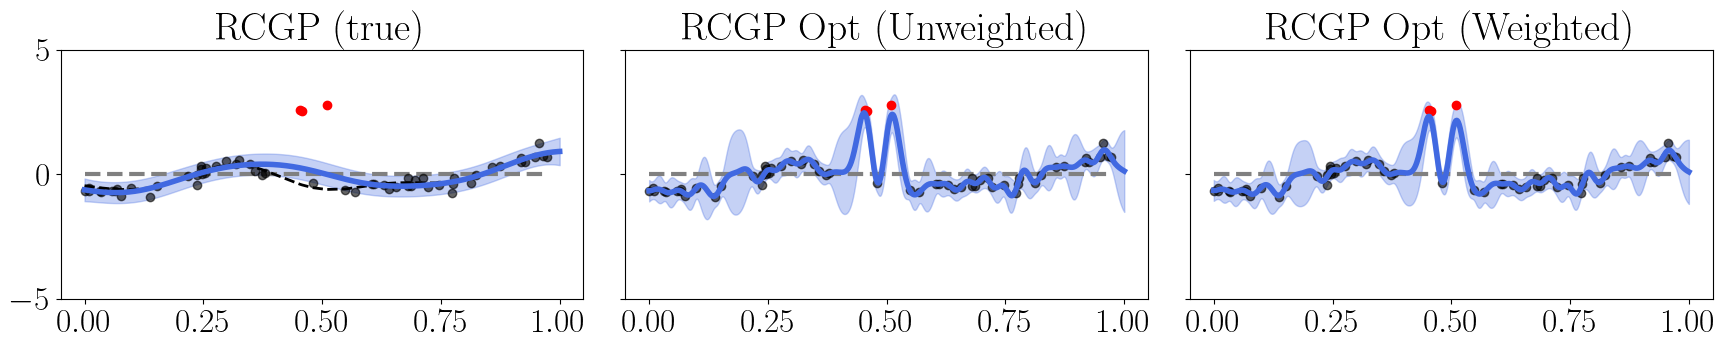

14
loo_log: [-0.71279731 -0.7988129  -0.69454791 -0.67507162 -0.67272455 -0.67299946
 -0.6963716  -0.71562203 -0.7336728 ]
weights: []


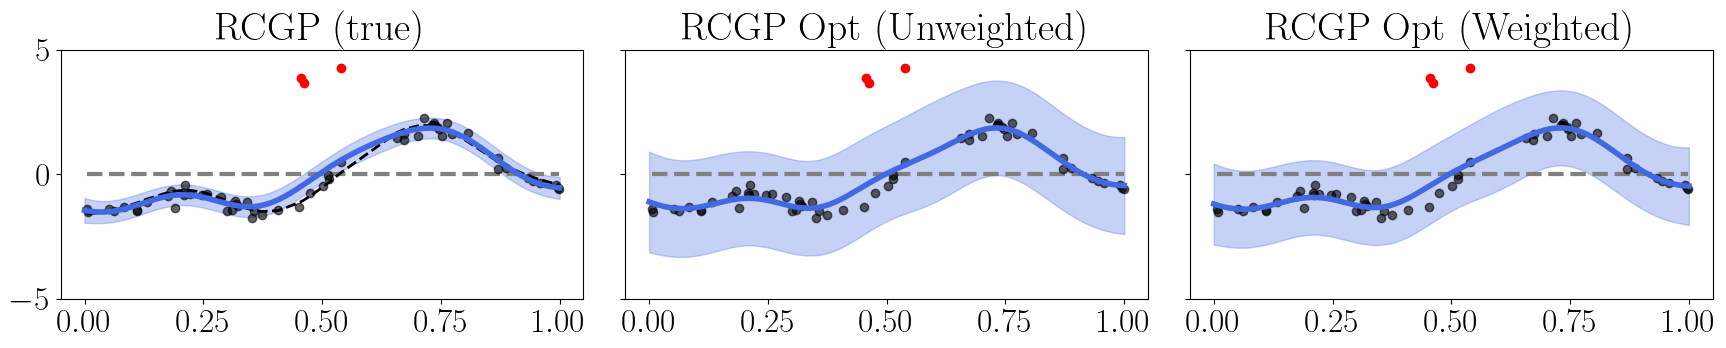

15
loo_log: [-0.6203678  -0.62336816 -0.6352035  -0.6284103  -0.63945241 -0.7322273
 -0.9989383  -0.68048894 -0.72276907]
weights: []


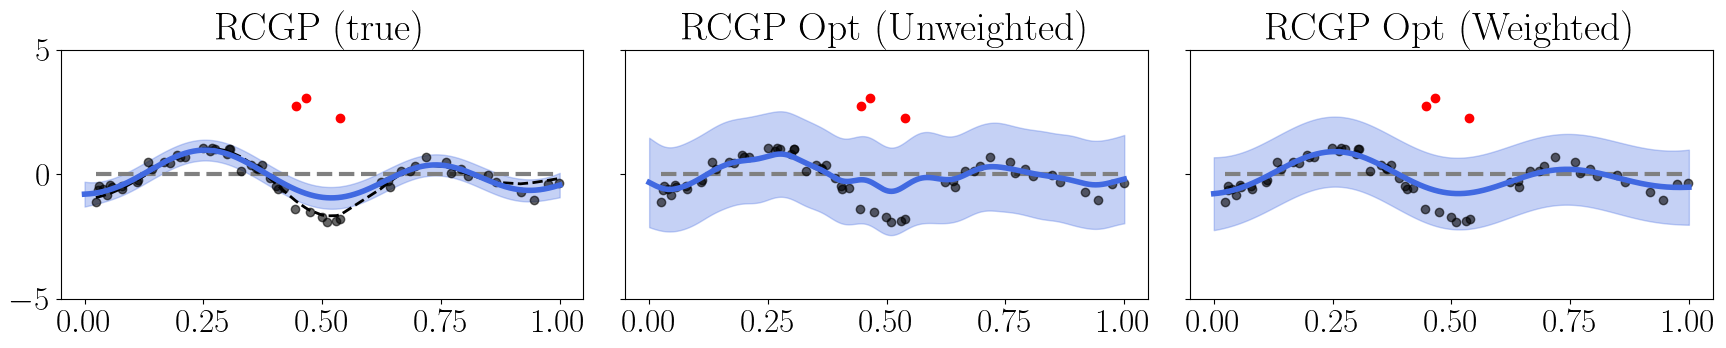

16
loo_log: [-0.5035445  -0.7296348  -0.58570368 -0.5414517  -0.63123985 -0.63300674
 -0.72591061 -0.76893468 -0.69591728]
weights: []


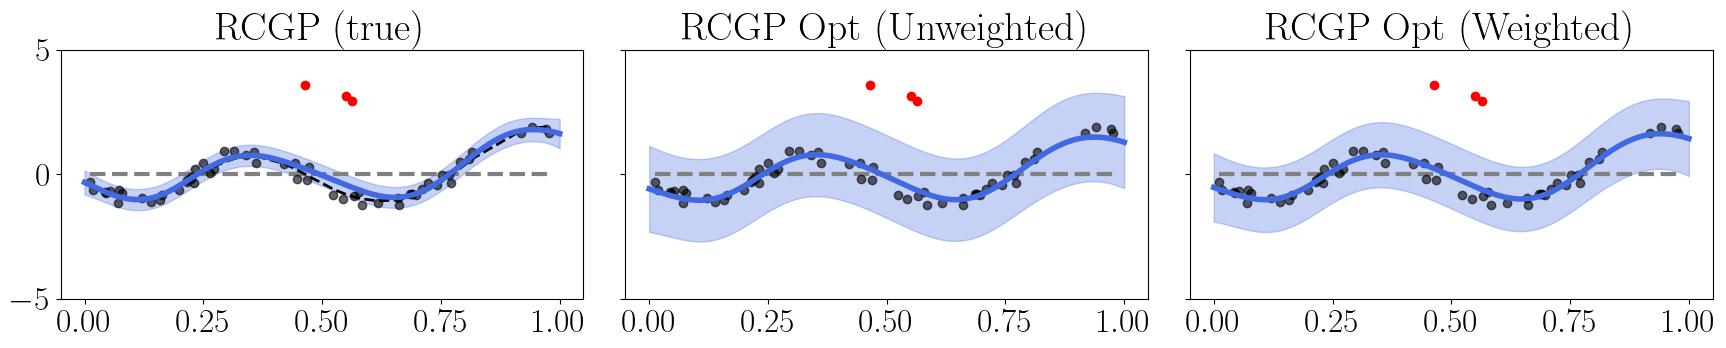

17
loo_log: [-0.25652011 -0.27919542 -0.28162523 -0.26911923 -0.34597857 -0.27697283
 -0.45012118 -0.41504064 -0.91539078]
weights: []


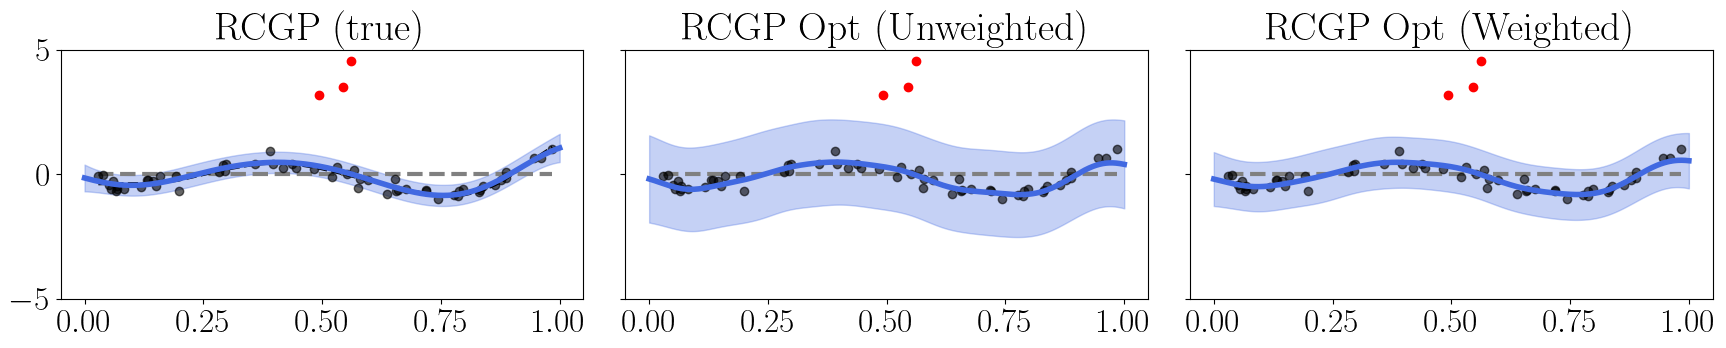

18
loo_log: [-0.2490007  -0.21024318 -0.28070242 -0.63365618 -0.72217631 -0.63558593
 -0.46073202 -0.3212054  -0.45129255]
weights: []


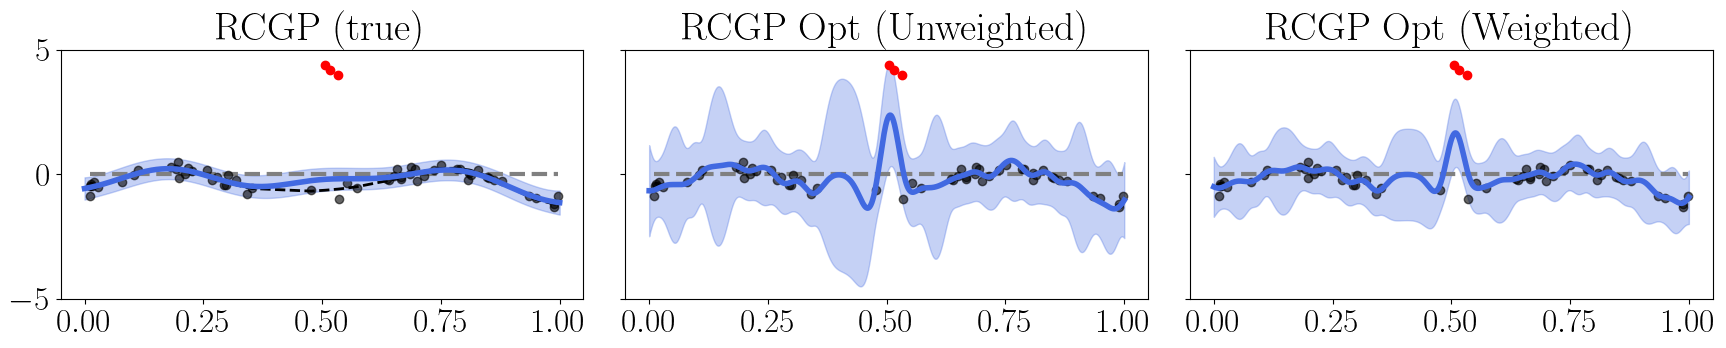

19
loo_log: [-0.56275119 -0.5841561  -1.00790495 -0.53947315 -0.50758318 -0.47859866
 -0.6970677  -0.72909405 -0.54871978]
weights: []


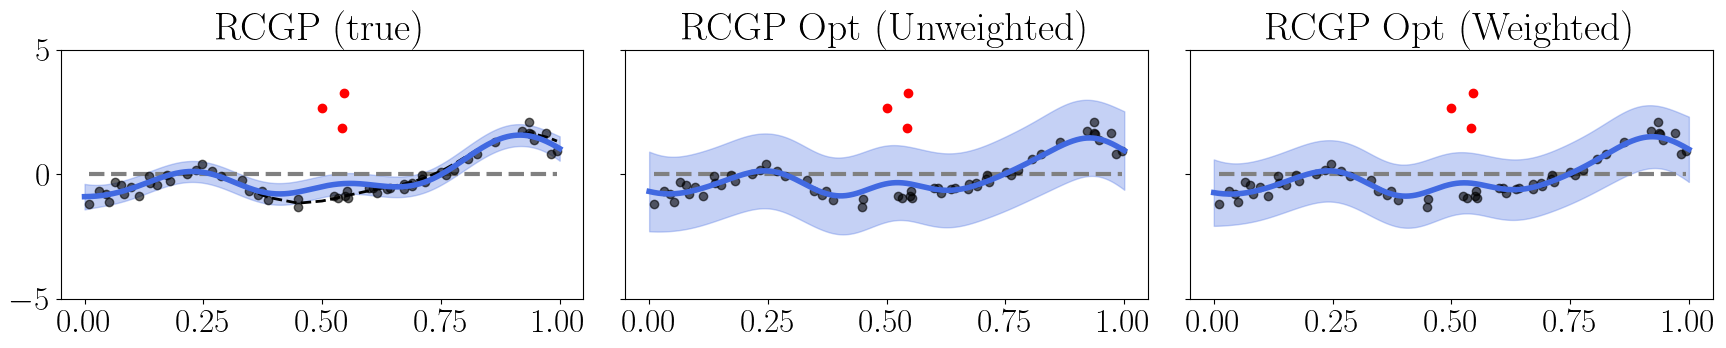

20
loo_log: [-0.32922656 -0.23090142 -0.23539873 -0.24417977 -0.8949964  -0.5829555
 -0.32494174 -0.41751348 -0.96898287]
weights: []


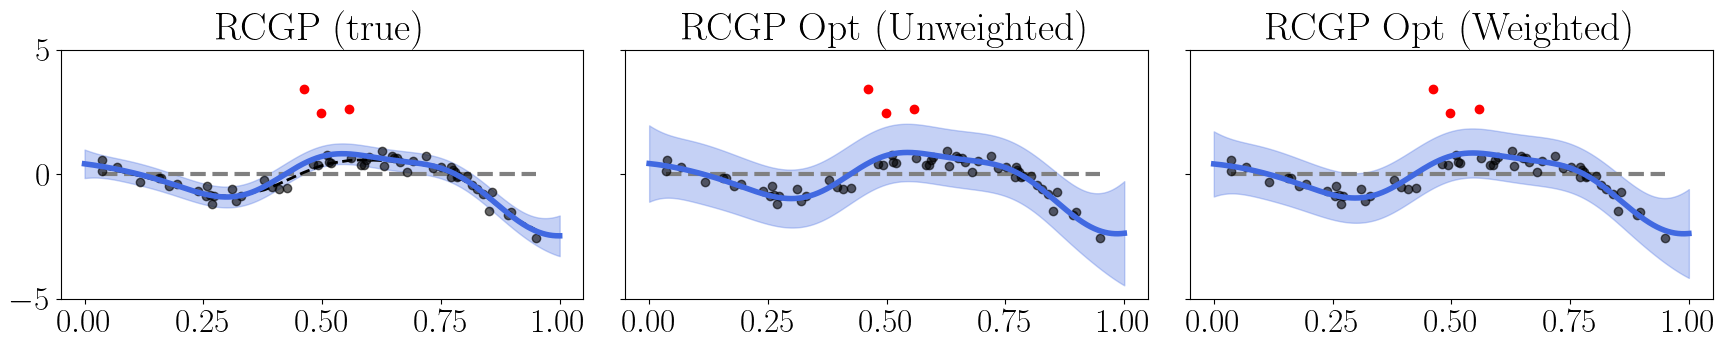

21
loo_log: [-0.20294698 -0.20003285  0.0288789  -0.02452476 -0.04810676 -0.0133801
 -0.05396008 -0.39232806 -1.03559563]
weights: []


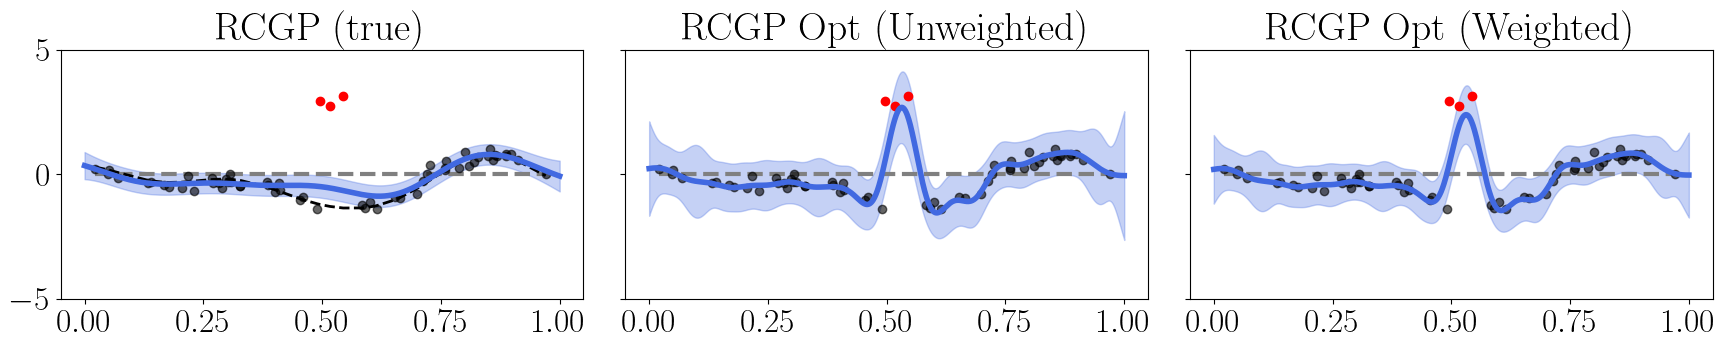

22
loo_log: [-0.00694494 -0.08264591 -0.4132836   0.1318741  -0.16702119  0.01834071
 -0.43258576 -0.00430011  0.08240034]
weights: []


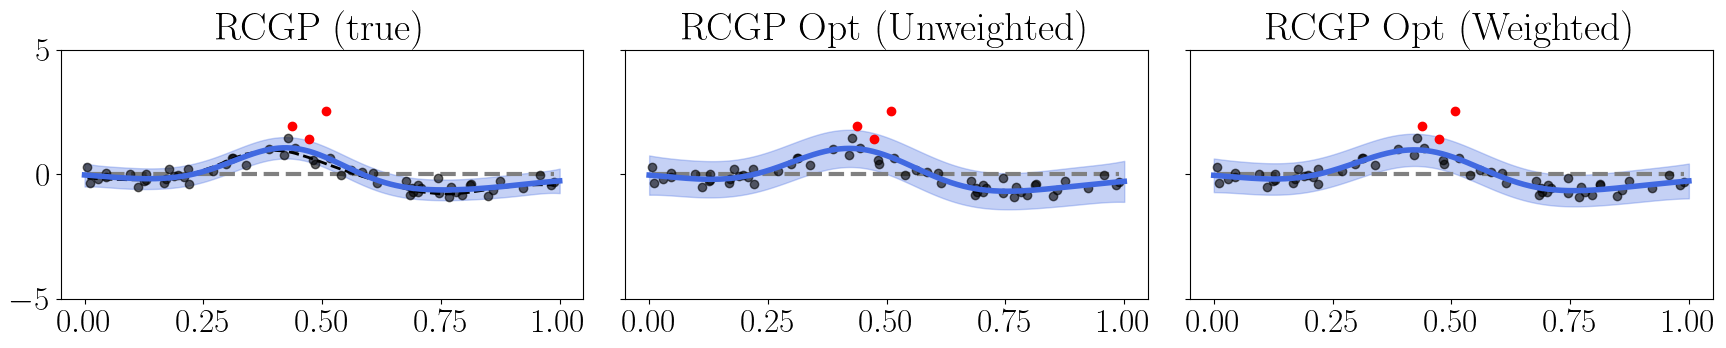

23
loo_log: [-0.12587402 -0.20219883 -0.41211912 -0.08364437 -0.08997774 -0.20372753
 -0.22776158 -0.15039237 -0.29528574]
weights: []


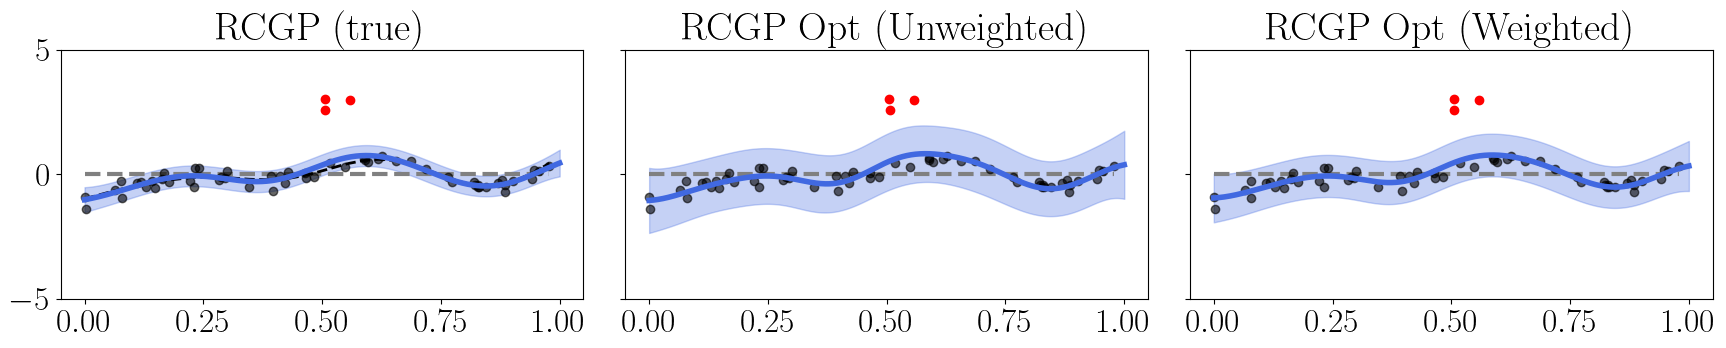

24
loo_log: [-0.4924955  -0.52809729 -0.5829145  -0.54410885 -0.50153865 -0.55902458
 -0.51376321 -0.5972363  -0.51379318]
weights: []


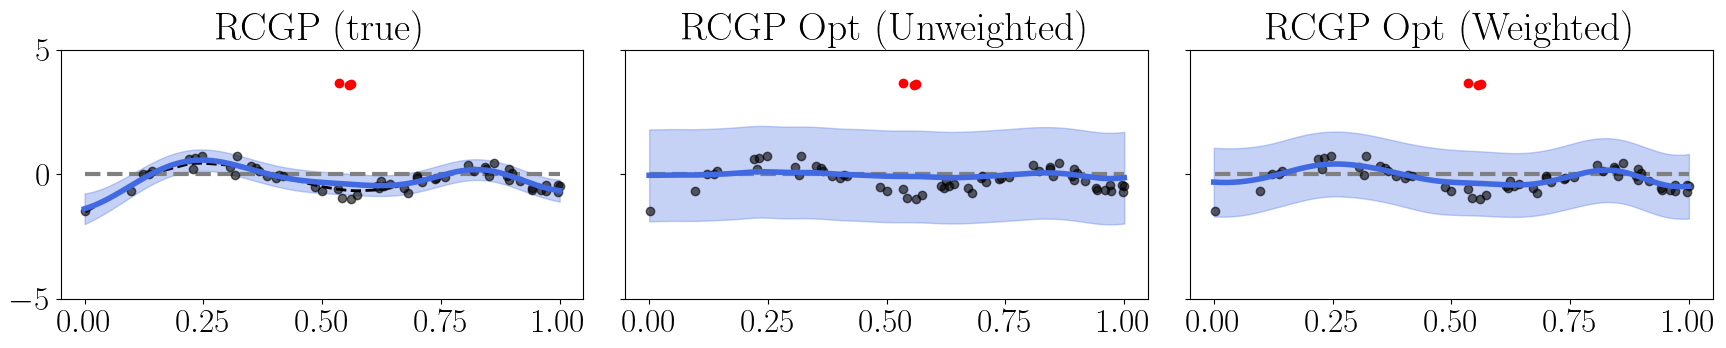

25
loo_log: [-0.49091407 -0.50746289 -0.48541527 -0.49139208 -0.76169435 -0.58637856
 -0.64451179 -0.53136385 -0.55069128]
weights: []


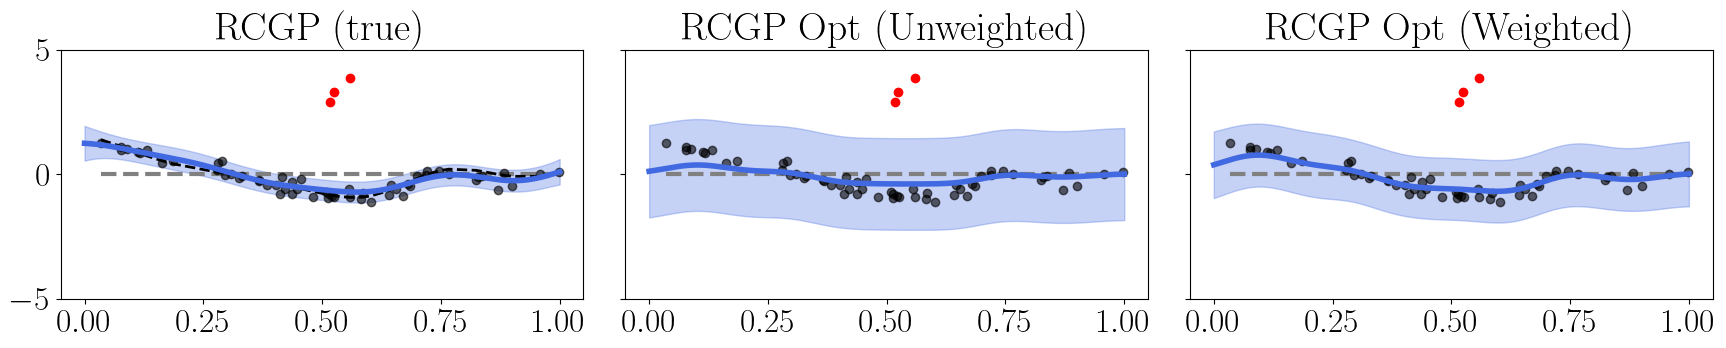

26
loo_log: [-0.14993274 -0.39411439 -0.29588551 -0.22042197 -0.16152006 -0.17566049
 -0.22338266 -0.44206111 -0.18224345]
weights: []


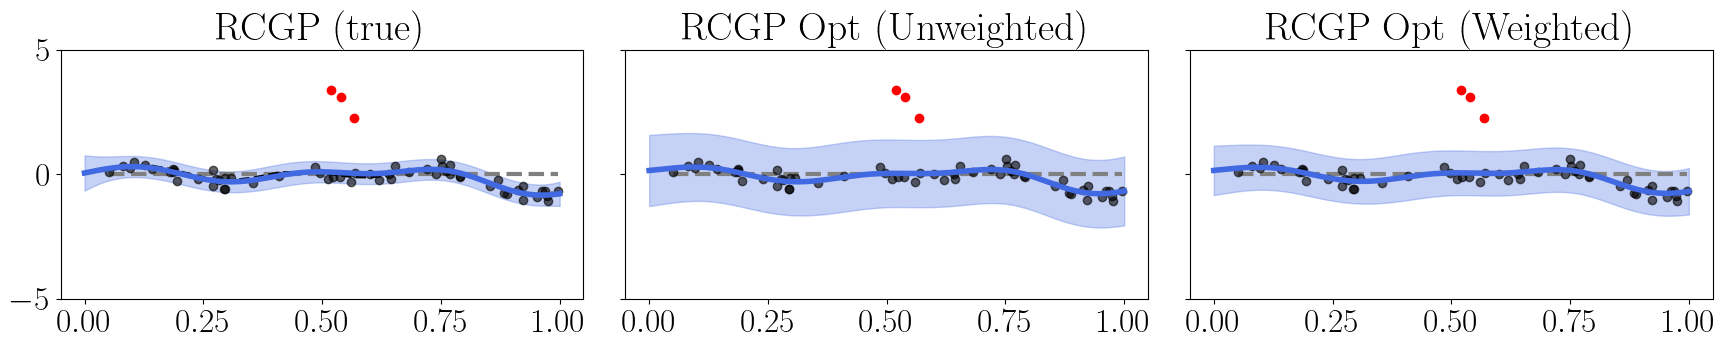

27
loo_log: [-0.56665744 -0.40792174 -0.11386206 -0.18181671 -0.23834597 -0.12116424
 -0.17522793 -0.18730636 -0.2892063 ]
weights: []


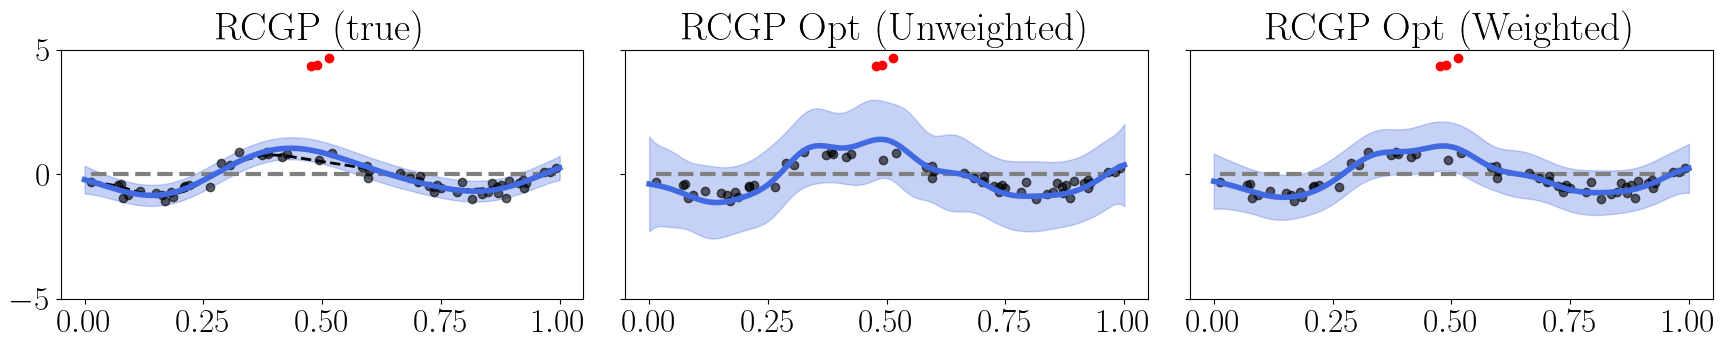

28
loo_log: [-0.91007897 -1.12262292 -0.31145573 -0.16439604 -1.40096055  0.27478237
  0.29783158  0.21514944 -0.13013475]
weights: []


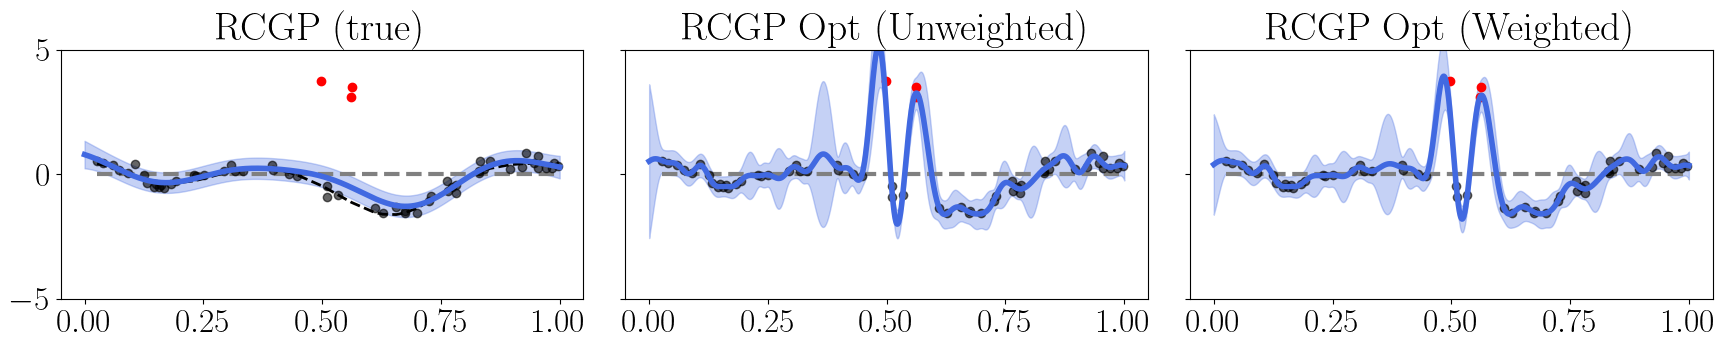

29
loo_log: [-0.12480542 -0.89352675 -0.08864142 -0.11550407 -0.592689    0.04727818
 -0.0465263  -0.40110208 -1.62728004]
weights: []


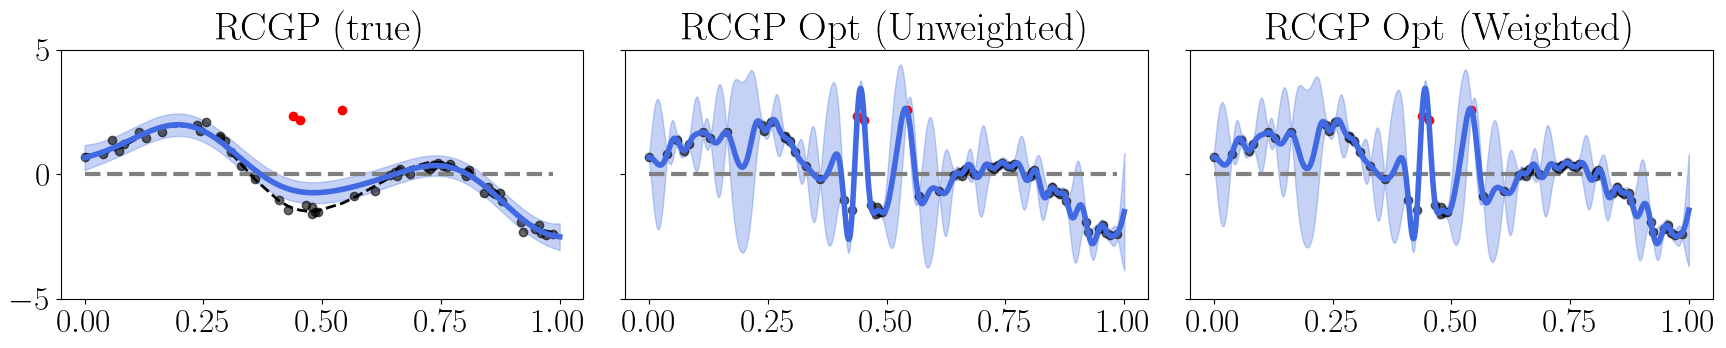

30
loo_log: [-0.23431037 -0.44821652 -0.63481985 -0.78230831 -0.2947389  -0.53997435
 -1.01219786  0.00123642 -0.05007954]
weights: []


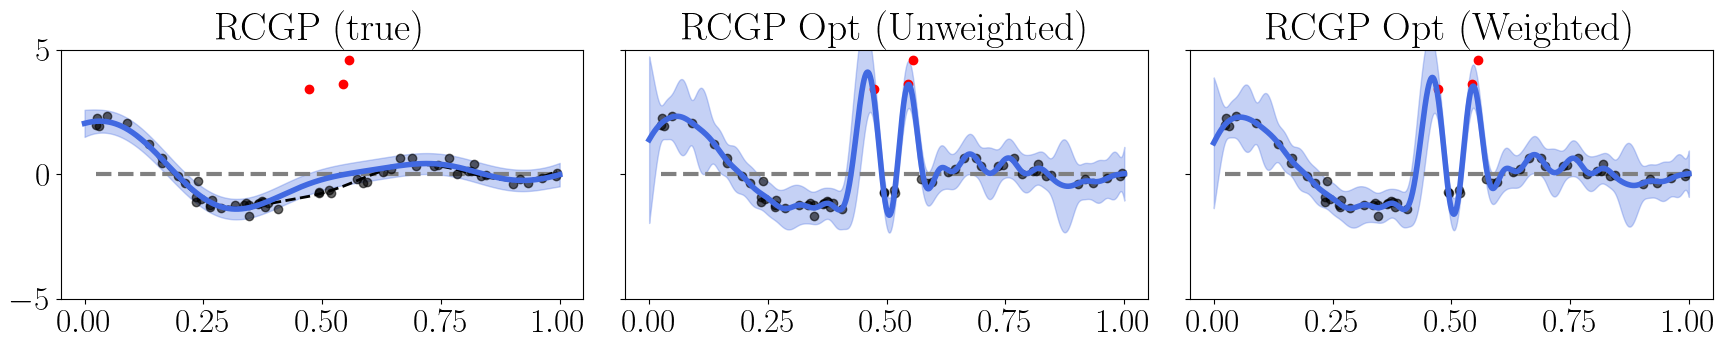

31
loo_log: [-0.35874253 -0.40176104 -0.96671164 -0.35992673 -0.40165645 -0.37852786
 -0.36369325 -0.45486404 -0.4417895 ]
weights: []


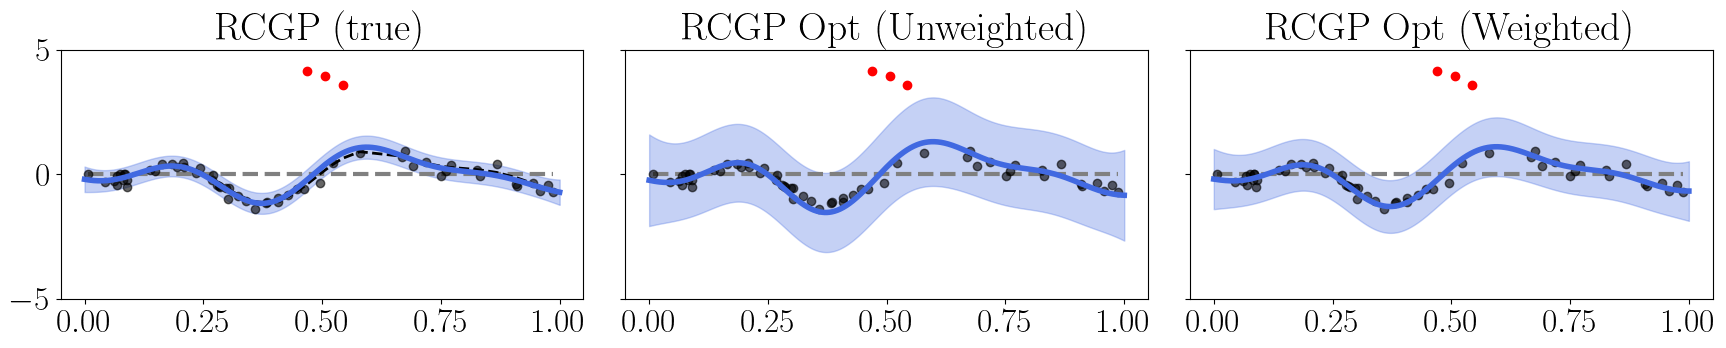

32
loo_log: [-0.44430333 -0.77772029 -0.45266006 -0.39047871 -0.40604772 -0.46931564
 -0.49204611 -0.4776143  -0.4411698 ]
weights: []


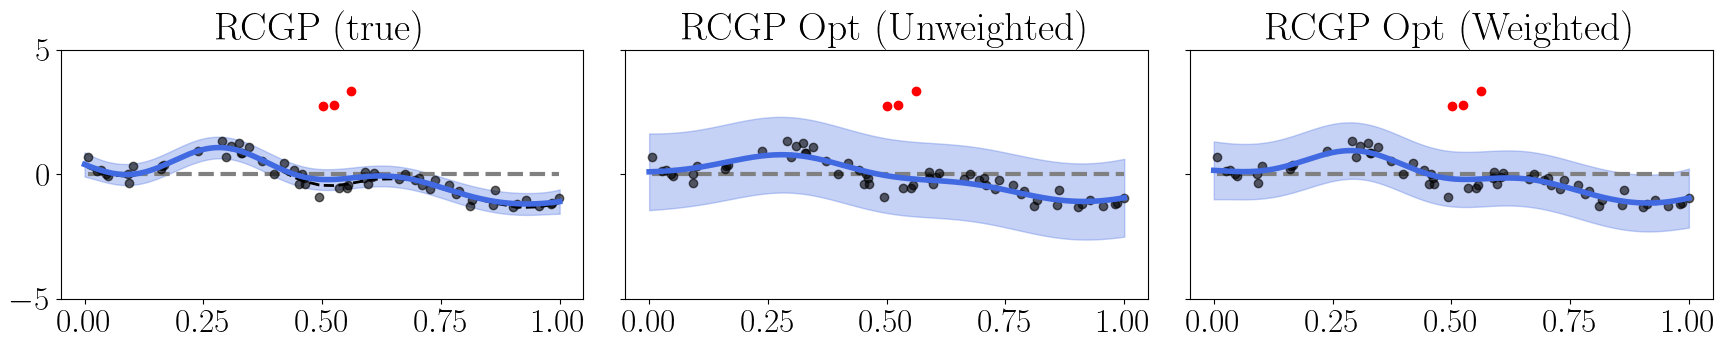

33
loo_log: [-0.3081266  -0.17086063 -0.1534513  -0.16002023 -0.14676465 -0.21826647
 -0.17799153 -0.21898197 -0.19875347]
weights: []


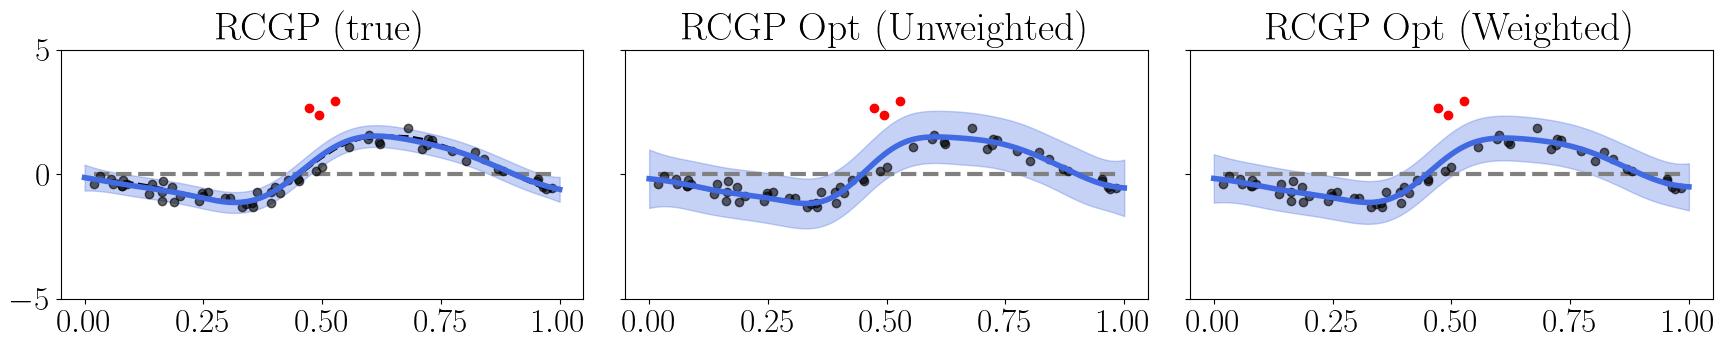

34
loo_log: [-0.21494107 -0.51595785 -0.8265739  -0.15558103 -0.60823989 -1.53210568
  0.24626386 -2.22379156 -1.26466378]
weights: []


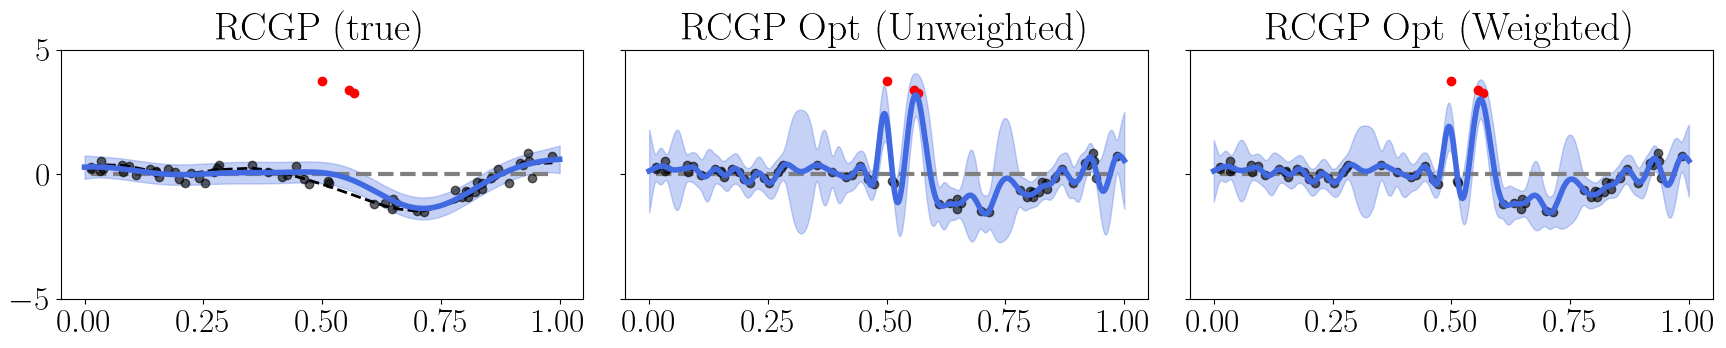

35
loo_log: [-2.40455325  0.21115025  0.21311284 -0.12719514 -0.64459557 -0.18490373
  0.05553611 -0.18923837 -1.13819952]
weights: []


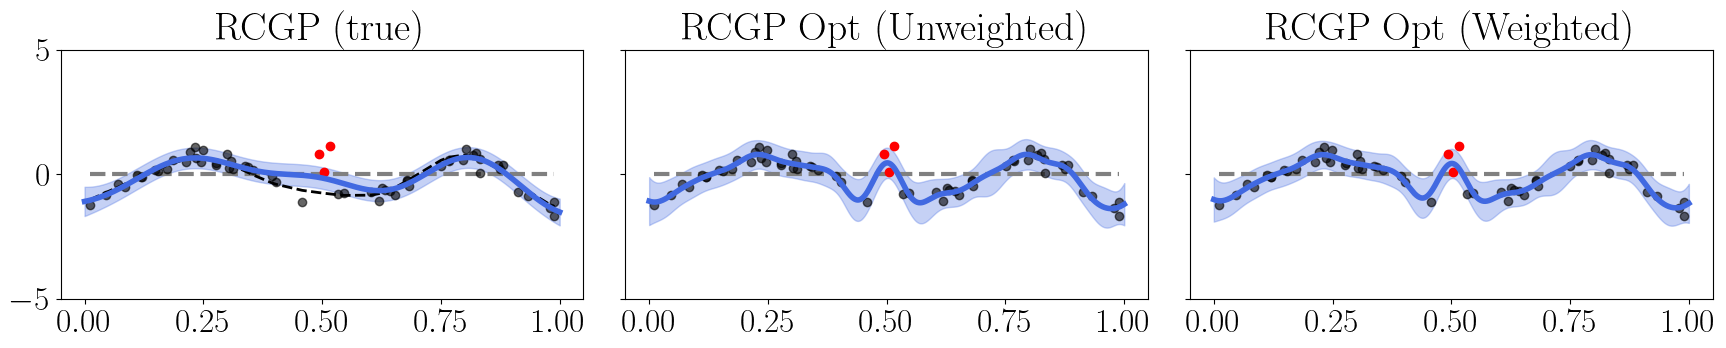

36
loo_log: [-0.23645513 -0.25043422 -0.35756484 -0.29317022 -0.27093769 -0.24622815
 -0.31371745 -0.7271146  -0.27973666]
weights: []


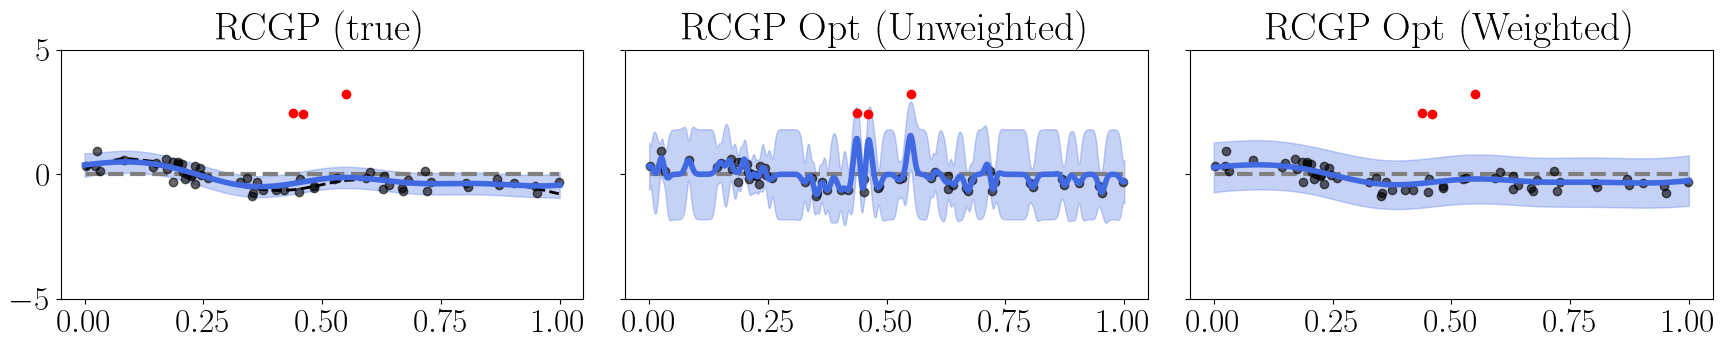

37
loo_log: [-0.17693256 -0.12347292 -0.1789746  -0.13385011 -0.08212649 -0.26792874
 -0.14028511 -0.16220239 -0.805816  ]
weights: []


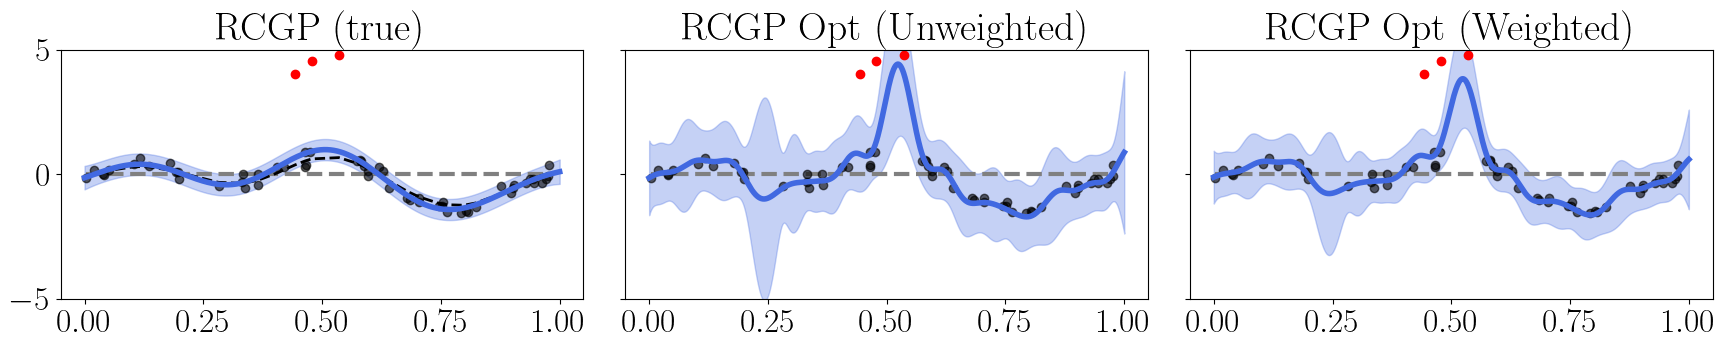

38
loo_log: [-1.02775321 -0.13627358  0.16101116  0.008565    0.12277255  0.04998775
 -0.21218694  0.01110823  0.0558176 ]
weights: []


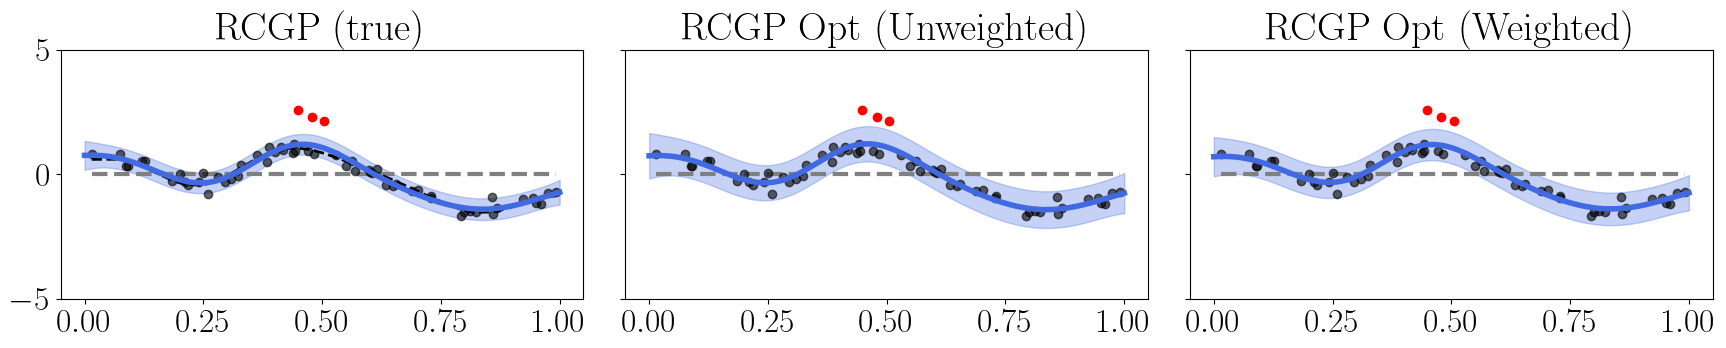

39
loo_log: [ 0.10797451 -0.08945159 -0.46567665 -0.23139846 -0.06890934 -0.05543422
 -0.03026495 -0.57121113 -0.1076274 ]
weights: []


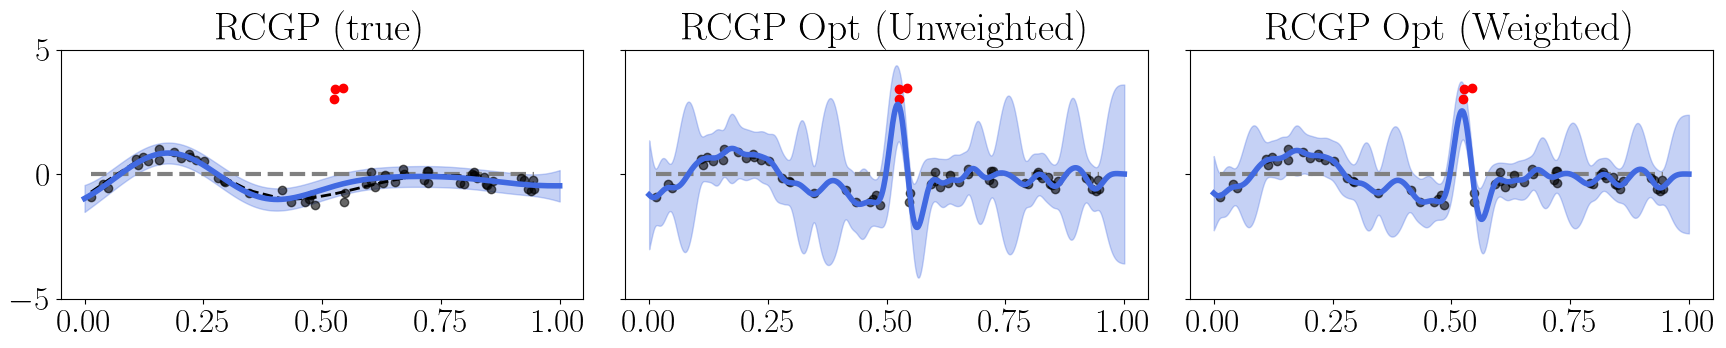

40
loo_log: [-0.36153742 -0.39250995 -0.4200286  -0.54467058 -0.51924007 -0.42099112
 -0.61003441 -0.42127265 -0.57672881]
weights: []


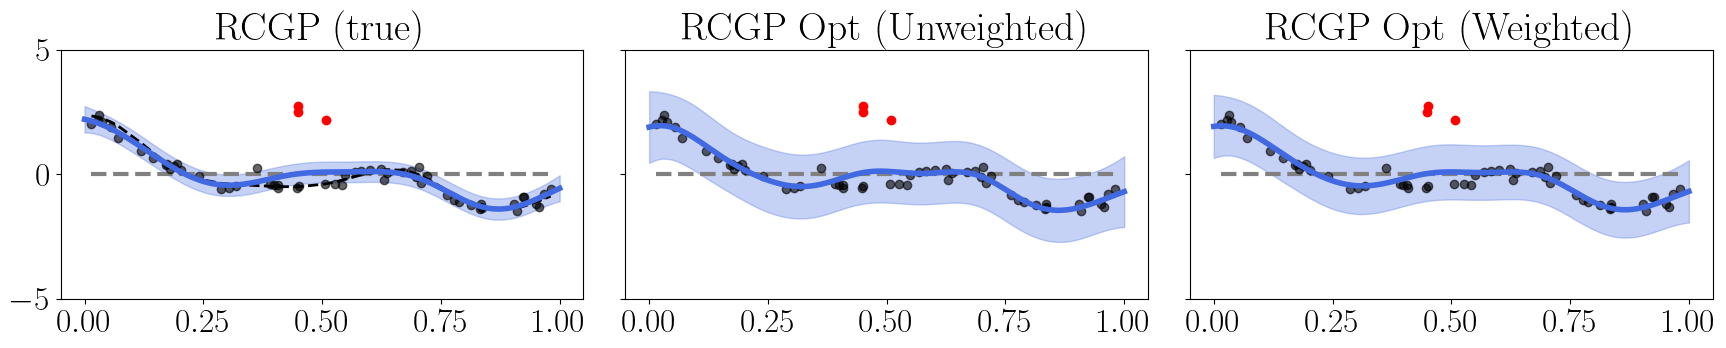

41
loo_log: [ 0.33363162 -1.11015616 -1.28536029 -0.91825278 -0.58167596 -0.56992866
 -0.59278391 -1.1203558  -1.1394375 ]
weights: []


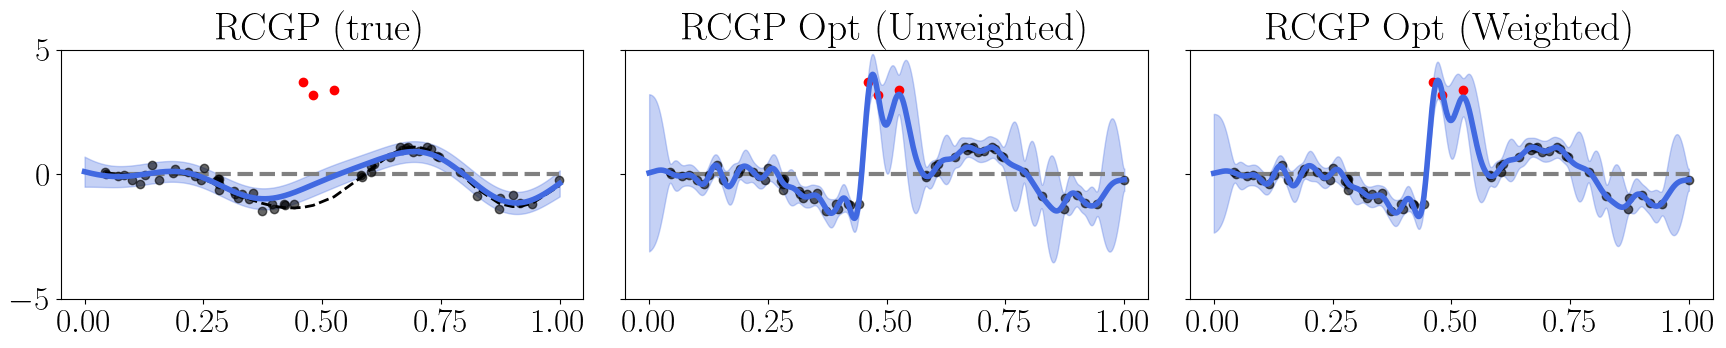

42
loo_log: [-0.41639629 -0.58477797 -0.32112937 -0.4154024  -0.35681478 -0.36944998
 -0.4136695  -0.51196621 -0.36188322]
weights: []


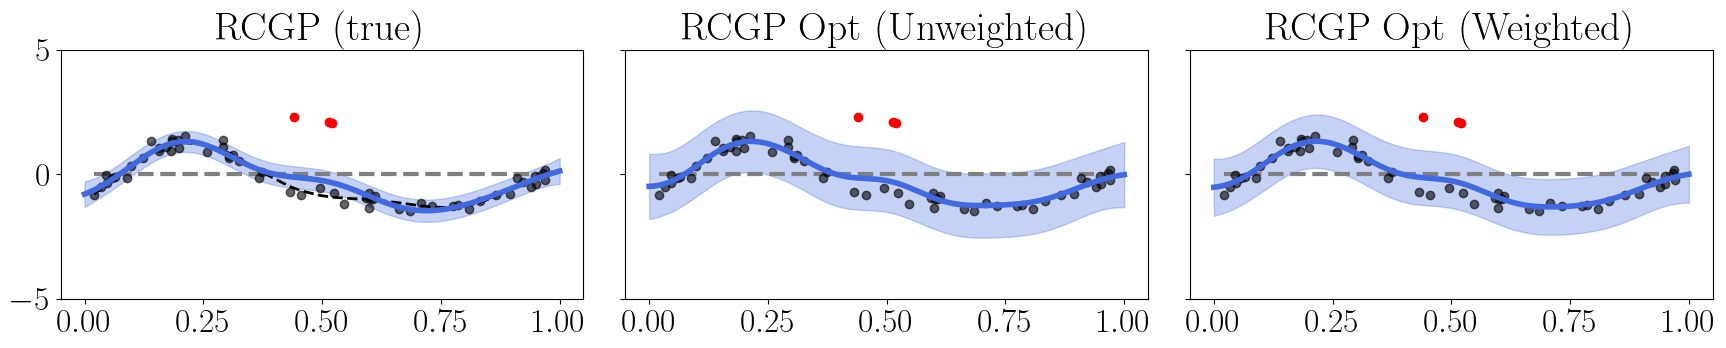

43
loo_log: [-0.35303253 -0.97816367 -0.20071026 -0.20369423 -0.25989884 -0.30448634
 -0.46198934 -0.45404781 -0.48820095]
weights: []


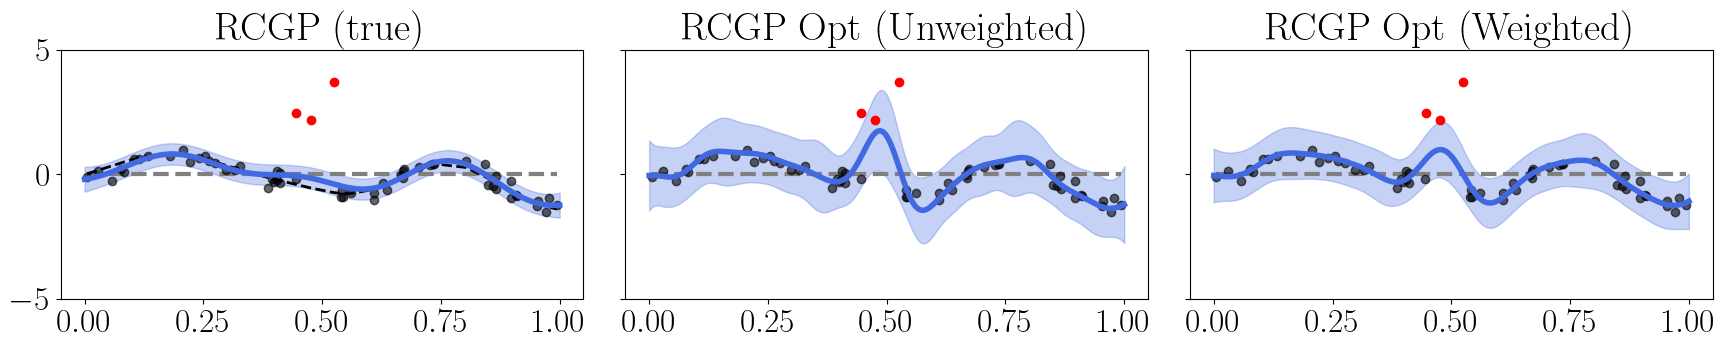

44
loo_log: [ 0.19101377 -0.98754724 -0.10696338  0.02961241 -0.04328816  0.09566153
  0.1215419  -0.05507345 -0.2848742 ]
weights: []


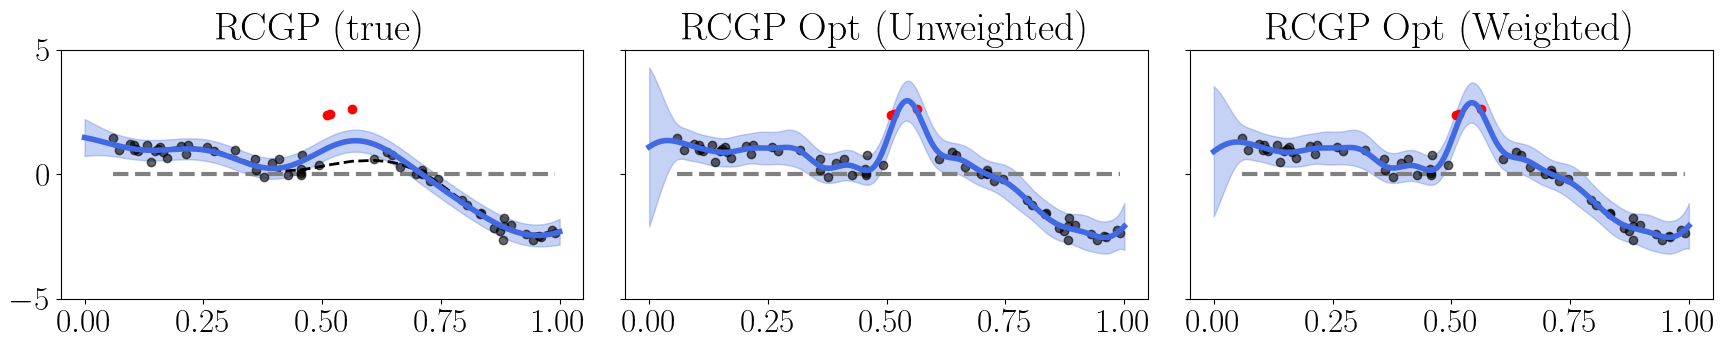

45
loo_log: [-0.2299345  -0.09472232 -0.12848272 -0.14034355 -0.15300012 -0.27947448
 -0.19951917 -0.21060716 -0.3317235 ]
weights: []


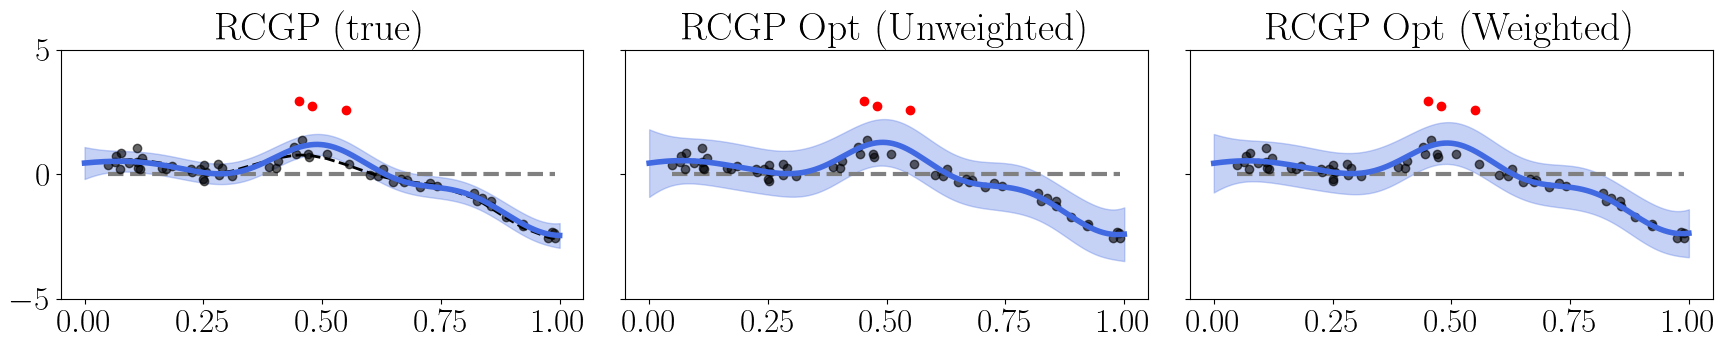

46
loo_log: [-0.75321872 -0.06055507 -0.20521221 -0.63973734 -0.65403516 -0.7620535
 -0.33533689 -0.15459957 -0.69176126]
weights: []


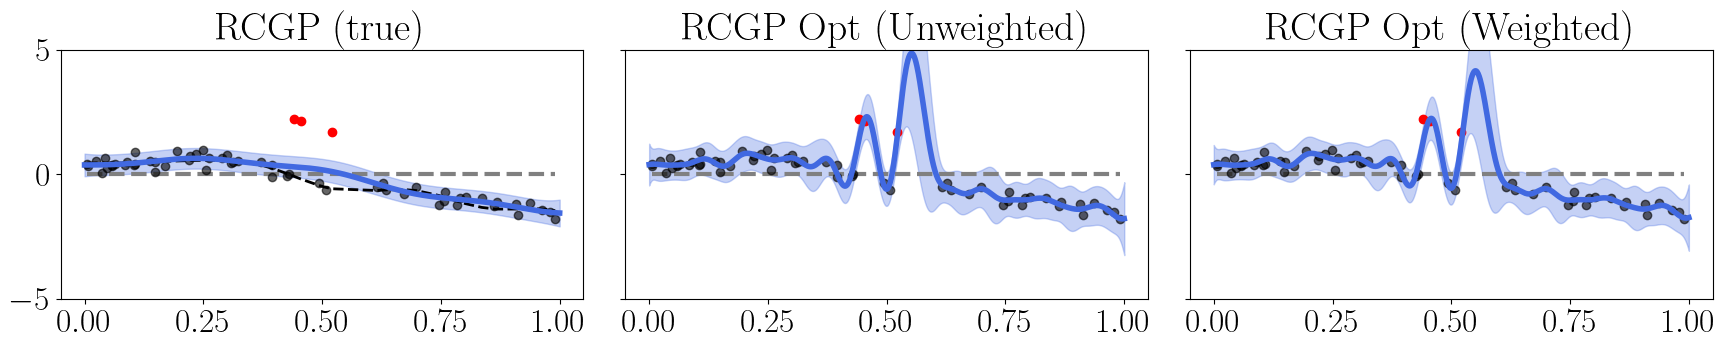

47
loo_log: [-0.01096936 -0.15087627  0.01923929 -0.1035573   0.08954382 -0.35392244
 -0.04306285 -0.85858953 -0.35200886]
weights: []


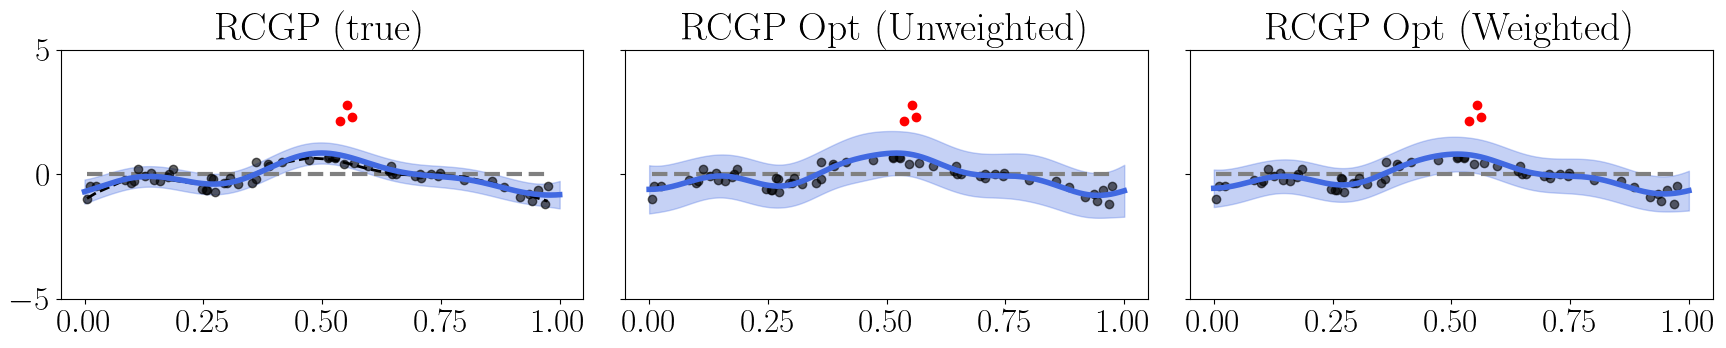

48
loo_log: [-0.36265339 -0.36125469  0.23934362  0.06006091 -0.36216415  0.10956444
 -0.05067995 -0.69475139 -0.97283547]
weights: []


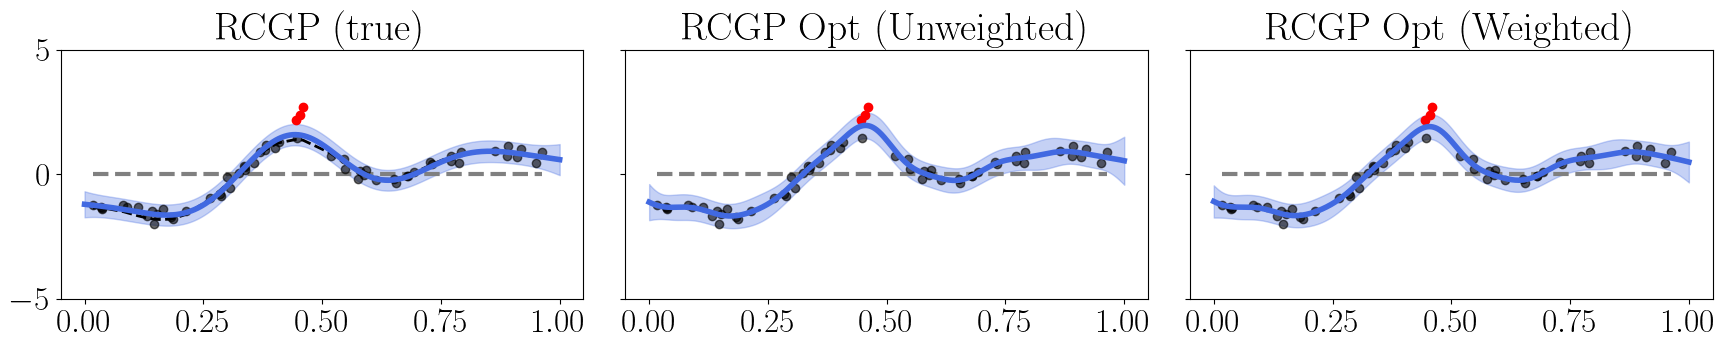

49
loo_log: [ 0.19155689 -0.23642779 -0.23807752  0.18523874  0.12345353  0.16987094
  0.13847513 -0.04767272 -0.36040075]
weights: []


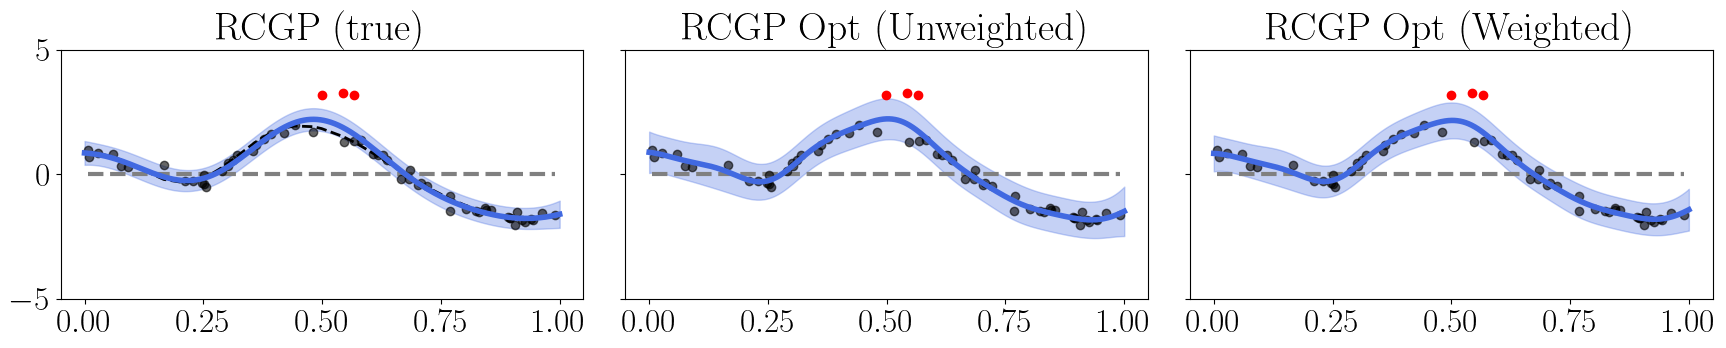

In [50]:
for i in range(0, 50):
    print(i)
    np.random.seed(i)
    # Initialisation
    epsilon = 0.05
    n_points = 60
    length_scale = 0.15
    variance = 1
    noise_variance = 0.04

    # Simulation
    mean_func = ConstantMean(constant=0)
    rbf_kernel = RBFKernel(lengthscale=length_scale, variance=variance)

    x_train = np.sort(np.random.uniform(0, 1.0, n_points)).reshape(-1, 1)
    K_train = rbf_kernel(x_train, x_train)
    f_train = np.random.multivariate_normal(mean_func(x_train).flatten(), K_train).reshape(-1, 1)
    y_train = f_train + np.random.normal(0, np.sqrt(noise_variance), size=x_train.shape)

    try:
        # Add outliers
        outlier_range = np.where((x_train >= 0.43) & (x_train <= 0.57))[0]
        outlier_indices = np.sort(np.random.choice(outlier_range, int(n_points * epsilon), replace=False))
        outlier_values = np.random.normal(loc=3.2, scale=0.4, size=outlier_indices.shape[0])
        y_train[outlier_indices] = outlier_values.reshape(-1,1)
        # print(outlier_indices)
    except Exception:
        continue  # Skip this iteration if any error occurs

    mean_y_train = np.mean(y_train)
    # print(mean_y_train)
    y_train = y_train - mean_y_train

    # Mask to keep all indices that are NOT outliers
    mask = np.ones(len(x_train), dtype=bool)
    mask[outlier_indices] = False

    x_test = np.linspace(0, 1, 1000).reshape(-1, 1)

    initial_length_scale = 0.04
    initial_rbf_variance = 0.1
    initial_noise = 0.04

    # Create subplot figure with 1 row and 3 columns
    fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

    # --- Plot 1: RCGP with weighted LOO-CV not optimized ---
    rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=length_scale, rbf_variance=variance, noise=noise_variance, epsilon=epsilon)
    rcgp_w.fit(x_train, y_train)

    mu_w, var_w = rcgp_w.predict(x_test)
    std_w = np.sqrt(var_w + rcgp_w.noise)

    axs[0].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    axs[0].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    axs[0].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    axs[0].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    axs[0].plot(x_test, mu_w.ravel(), color="royalblue")
    axs[0].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
    axs[0].set_title("RCGP (true)")

    # --- Plot 2: RCGP with unweighted LOO-CV optimization ---
    rcgp = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
    rcgp.fit(x_train, y_train)
    rcgp.optimize_loo_cv(weighted=False, print_opt_param=False, print_iter_param=False)

    mu, var = rcgp.predict(x_test)
    std = np.sqrt(var + rcgp.noise)

    axs[1].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    axs[1].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    axs[1].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    # axs[1].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    axs[1].plot(x_test, mu.ravel(), color="royalblue")
    axs[1].fill_between(x_test.ravel(), mu.ravel() - 1.96 * std, mu.ravel() + 1.96 * std, alpha=0.3, color='royalblue')
    axs[1].set_title("RCGP Opt (Unweighted)")

    # --- Plot 3: RCGP with weighted LOO-CV optimization ---
    rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
    rcgp_w.fit(x_train, y_train)
    rcgp_w.optimize_loo_cv(weighted=True, print_opt_param=False, print_iter_param=False)

    # print(rcgp_w.loo_cv(weighted=True, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise))
    print('loo_log:', rcgp_w.predictive_log_prob.reshape(-1)[51:82])
    print('weights:', rcgp_w.weight.reshape(-1)[98:116])

    mu_w, var_w = rcgp_w.predict(x_test)
    std_w = np.sqrt(var_w + rcgp_w.noise)

    axs[2].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    axs[2].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    axs[2].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    # axs[2].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    axs[2].plot(x_test, mu_w.ravel(), color="royalblue")
    axs[2].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
    axs[2].set_title("RCGP Opt (Weighted)")

    # Common settings
    for ax in axs:
        ax.set_ylim(-5, 5)

    plt.tight_layout()
    plt.show()


5
weights outliers: [0.43181908 0.35997616 0.42619992 0.39229433 0.41522704 0.41205944]
weights inliers: [0.89485488 0.90625258 0.84880582 0.90481972 0.94243426]


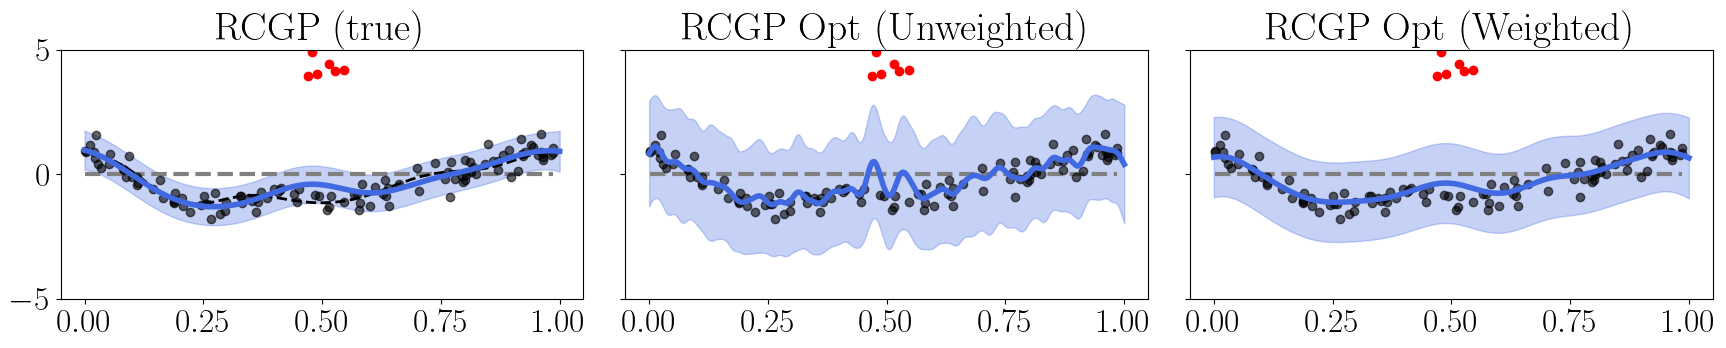

In [49]:
for i in range(5,6):
    print(i)
    np.random.seed(i)
    # Initialisation
    epsilon = 0.05
    n_points = 120
    length_scale = 0.12
    variance = 1
    noise_variance = 0.13

    # Simulation
    mean_func = ConstantMean(constant=0)
    rbf_kernel = RBFKernel(lengthscale=length_scale, variance=variance)

    x_train = np.sort(np.random.uniform(0, 1.0, n_points)).reshape(-1, 1)
    K_train = rbf_kernel(x_train, x_train)
    f_train = np.random.multivariate_normal(mean_func(x_train).flatten(), K_train).reshape(-1, 1)
    y_train = f_train + np.random.normal(0, np.sqrt(noise_variance), size=x_train.shape)

    try:
        # Add outliers
        outlier_range = np.where((x_train >= 0.43) & (x_train <= 0.57))[0]
        outlier_indices = np.sort(np.random.choice(outlier_range, int(n_points * epsilon), replace=False))
        outlier_values = np.random.normal(loc=4, scale=0.4, size=outlier_indices.shape[0])
        y_train[outlier_indices] = outlier_values.reshape(-1,1)
        # print(outlier_indices)
    except Exception:
        continue  # Skip this iteration if any error occurs

    mean_y_train = np.mean(y_train)
    # print(mean_y_train)
    y_train = y_train - mean_y_train

    # Mask to keep all indices that are NOT outliers
    mask = np.ones(len(x_train), dtype=bool)
    mask[outlier_indices] = False

    x_test = np.linspace(0, 1, 1000).reshape(-1, 1)

    initial_length_scale = 0.04
    initial_rbf_variance = 0.1
    initial_noise = 0.04

    # Create subplot figure with 1 row and 3 columns
    fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

    # --- Plot 1: RCGP with weighted LOO-CV not optimized ---
    rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=length_scale, rbf_variance=variance, noise=noise_variance, epsilon=epsilon)
    rcgp_w.fit(x_train, y_train)

    mu_w, var_w = rcgp_w.predict(x_test)
    std_w = np.sqrt(var_w + rcgp_w.noise)

    axs[0].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    axs[0].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    axs[0].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    axs[0].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    axs[0].plot(x_test, mu_w.ravel(), color="royalblue")
    axs[0].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
    axs[0].set_title("RCGP (true)")

    # --- Plot 2: RCGP with unweighted LOO-CV optimization ---
    rcgp = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
    rcgp.fit(x_train, y_train)
    rcgp.optimize_loo_cv(weighted=False, print_opt_param=False, print_iter_param=False)

    mu, var = rcgp.predict(x_test)
    std = np.sqrt(var + rcgp.noise)

    axs[1].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    axs[1].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    axs[1].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    # axs[1].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    axs[1].plot(x_test, mu.ravel(), color="royalblue")
    axs[1].fill_between(x_test.ravel(), mu.ravel() - 1.96 * std, mu.ravel() + 1.96 * std, alpha=0.3, color='royalblue')
    axs[1].set_title("RCGP Opt (Unweighted)")

    # --- Plot 3: RCGP with weighted LOO-CV optimization ---
    rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
    rcgp_w.fit(x_train, y_train)
    rcgp_w.optimize_loo_cv(weighted=True, print_opt_param=False, print_iter_param=False)

    # print(rcgp_w.loo_cv(weighted=True, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise))
    # print('loo_log:', rcgp_w.predictive_log_prob.reshape(-1)[51:82])
    print('weights outliers:', rcgp_w.weight.reshape(-1)[outlier_indices])
    print('weights inliers:', rcgp_w.weight.reshape(-1)[0:5])

    mu_w, var_w = rcgp_w.predict(x_test)
    std_w = np.sqrt(var_w + rcgp_w.noise)

    axs[2].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    axs[2].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    axs[2].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    # axs[2].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    axs[2].plot(x_test, mu_w.ravel(), color="royalblue")
    axs[2].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
    axs[2].set_title("RCGP Opt (Weighted)")

    # Common settings
    for ax in axs:
        ax.set_ylim(-5, 5)

    plt.tight_layout()
    plt.show()


5
loo_log: [-0.45174032 -0.39262003 -0.3190511  -0.33402958 -0.69931709 -0.37879793
 -0.2948257  -0.36528245 -0.30004655 -0.2678478  -0.41526885 -0.30896722
 -0.60896875 -0.25889491 -0.26309373 -0.32583916 -0.29835942 -0.31774293
 -0.72358434 -0.32210207 -0.36253695 -0.26682266 -0.35695498 -0.26000673
 -0.26312276 -0.32639699 -0.61629223 -0.33812529 -0.45808757]
weights: []


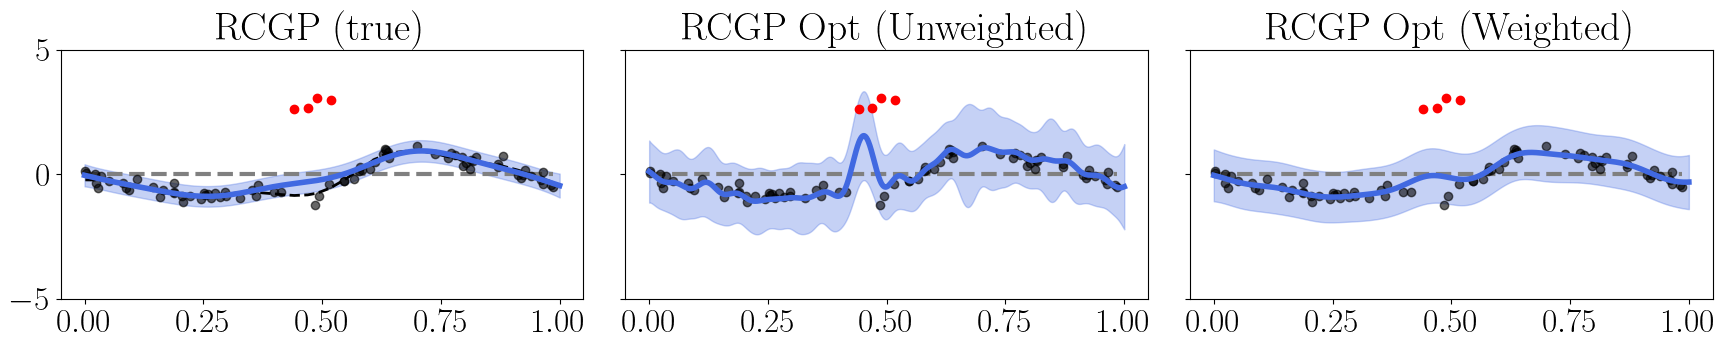

In [87]:
for i in range(5, 6):
    print(i)
    np.random.seed(i)
    # Initialisation
    epsilon = 0.05
    n_points = 80
    length_scale = 0.15
    variance = 1
    noise_variance = 0.04

    # Simulation
    mean_func = ConstantMean(constant=0)
    rbf_kernel = RBFKernel(lengthscale=length_scale, variance=variance)

    x_train = np.sort(np.random.uniform(0, 1.0, n_points)).reshape(-1, 1)
    K_train = rbf_kernel(x_train, x_train)
    f_train = np.random.multivariate_normal(mean_func(x_train).flatten(), K_train).reshape(-1, 1)
    y_train = f_train + np.random.normal(0, np.sqrt(noise_variance), size=x_train.shape)

    try:
        # Add outliers
        outlier_range = np.where((x_train >= 0.44) & (x_train <= 0.57))[0]
        outlier_indices = np.sort(np.random.choice(outlier_range, int(n_points * epsilon), replace=False))
        outlier_values = np.random.normal(loc=3.25, scale=0.4, size=outlier_indices.shape[0])
        y_train[outlier_indices] = outlier_values.reshape(-1,1)
        # print(outlier_indices)
    except Exception:
        continue  # Skip this iteration if any error occurs

    mean_y_train = np.mean(y_train)
    # print(mean_y_train)
    y_train = y_train - mean_y_train

    # Mask to keep all indices that are NOT outliers
    mask = np.ones(len(x_train), dtype=bool)
    mask[outlier_indices] = False

    x_test = np.linspace(0, 1, 1000).reshape(-1, 1)

    initial_length_scale = 0.04
    initial_rbf_variance = 0.1
    initial_noise = 0.04

    # Create subplot figure with 1 row and 3 columns
    fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

    # --- Plot 1: RCGP with weighted LOO-CV not optimized ---
    rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=length_scale, rbf_variance=variance, noise=noise_variance, epsilon=epsilon)
    rcgp_w.fit(x_train, y_train)

    mu_w, var_w = rcgp_w.predict(x_test)
    std_w = np.sqrt(var_w + rcgp_w.noise)

    axs[0].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    axs[0].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    axs[0].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    axs[0].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    axs[0].plot(x_test, mu_w.ravel(), color="royalblue")
    axs[0].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
    axs[0].set_title("RCGP (true)")

    # --- Plot 2: RCGP with unweighted LOO-CV optimization ---
    rcgp = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
    rcgp.fit(x_train, y_train)
    rcgp.optimize_loo_cv(weighted=False, print_opt_param=False, print_iter_param=False)

    mu, var = rcgp.predict(x_test)
    std = np.sqrt(var + rcgp.noise)

    axs[1].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    axs[1].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    axs[1].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    # axs[1].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    axs[1].plot(x_test, mu.ravel(), color="royalblue")
    axs[1].fill_between(x_test.ravel(), mu.ravel() - 1.96 * std, mu.ravel() + 1.96 * std, alpha=0.3, color='royalblue')
    axs[1].set_title("RCGP Opt (Unweighted)")

    # --- Plot 3: RCGP with weighted LOO-CV optimization ---
    rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
    rcgp_w.fit(x_train, y_train)
    rcgp_w.optimize_loo_cv(weighted=True, print_opt_param=False, print_iter_param=False)

    # print(rcgp_w.loo_cv(weighted=True, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise))
    print('loo_log:', rcgp_w.predictive_log_prob.reshape(-1)[51:82])
    print('weights:', rcgp_w.weight.reshape(-1)[98:116])

    mu_w, var_w = rcgp_w.predict(x_test)
    std_w = np.sqrt(var_w + rcgp_w.noise)

    axs[2].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
    axs[2].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
    axs[2].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
    # axs[2].plot(x_train, f_train - mean_y_train, '--', color='black', linewidth=2)
    axs[2].plot(x_test, mu_w.ravel(), color="royalblue")
    axs[2].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='royalblue')
    axs[2].set_title("RCGP Opt (Weighted)")

    # Common settings
    for ax in axs:
        ax.set_ylim(-5, 5)

    plt.tight_layout()
    plt.show()


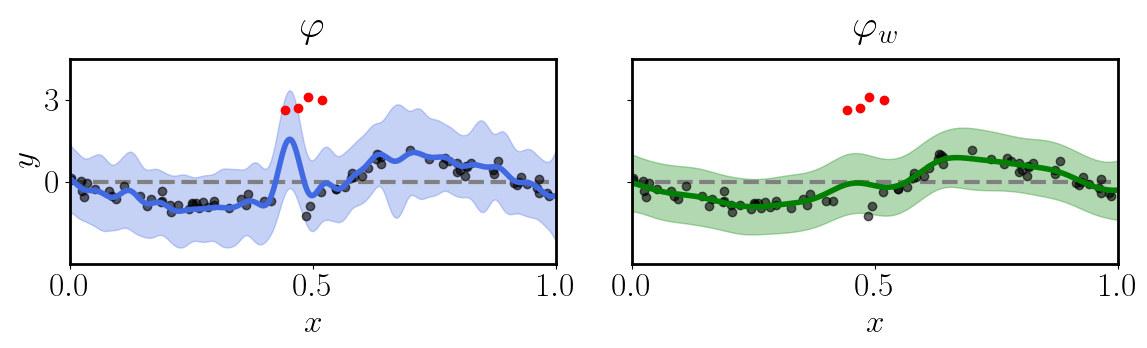

In [88]:
# Create subplot figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axs[0].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[0].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[0].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
axs[0].plot(x_test, mu.ravel(), color="royalblue")
axs[0].fill_between(x_test.ravel(), mu.ravel() - 1.96 * std, mu.ravel() + 1.96 * std, alpha=0.3, color='royalblue')
axs[0].set_ylabel(r'$y$')
axs[0].set_title(r"$\varphi$", pad=15)

# axs[0].plot(x_test, mu.ravel(), color="royalblue", label=r'RCGP ($\varphi$)')
# axs[0].legend(loc='lower right', frameon=False, borderaxespad=0.1, handlelength=1.5)

axs[1].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[1].plot(x_train[mask], y_train[mask], 'o', color='black', markersize=6, alpha=0.6)
axs[1].plot(x_train[~mask], y_train[~mask], 'o', color='red', markersize=6)
axs[1].plot(x_test, mu_w.ravel(), color="green")
axs[1].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='green')
axs[1].set_title(r"$\varphi_{w}$", pad=15)

# axs[1].plot(x_test, mu_w.ravel(), color="green", label=r'RCGP ($\varphi_w$)')
# axs[1].legend(loc='lower right', frameon=False, borderaxespad=0.1, handlelength=1.5)


for ax in axs:
    ax.set_ylim(-3, 4.5)
    ax.set_xlim(0, 1)
    ax.set_yticks([0, 3])
    ax.set_xticks([0, 0.5, 1.0])
    ax.set_xlabel(r'$x$')
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    
# plt.subplots_adjust(wspace=0.01)
plt.tight_layout()
plt.show()

# fig.savefig("./results/RCGP_hyperparam_opt.pdf", format='pdf', bbox_inches='tight')

## Bringing in MOGP

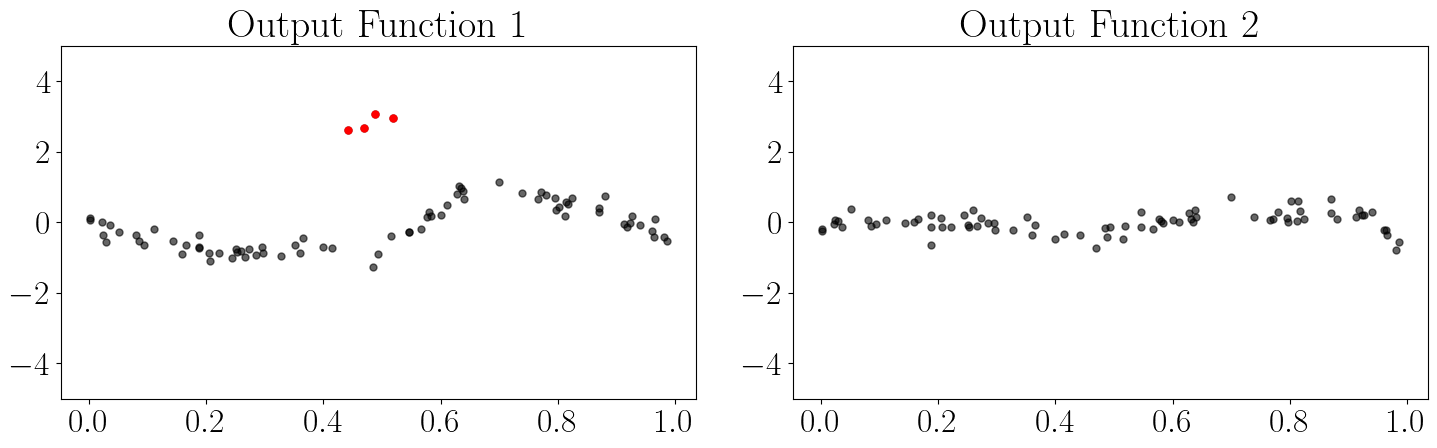

In [103]:
np.random.seed(5)
# Initialisation
epsilon = 0.05
n_points = 80
length_scale = 0.15
variance = 1
noise_variance = 0.04

Y_train = np.zeros((n_points, 2))

# Simulation
mean_func = ConstantMean(constant=0)
rbf_kernel = RBFKernel(lengthscale=length_scale, variance=variance)

x_train = np.sort(np.random.uniform(0, 1.0, n_points)).reshape(-1, 1)
K_train = rbf_kernel(x_train, x_train)
f1_train = np.random.multivariate_normal(mean_func(x_train).flatten(), K_train).reshape(-1, 1)
y1_train = f1_train + np.random.normal(0, np.sqrt(noise_variance), size=x_train.shape)
Y_train[:, 0] = y1_train.ravel()

# Add outliers
outlier_range = np.where((x_train >= 0.44) & (x_train <= 0.57))[0]
outlier_indices = np.sort(np.random.choice(outlier_range, int(n_points * epsilon), replace=False))
outlier_values = np.random.normal(loc=3.25, scale=0.4, size=outlier_indices.shape[0])
Y_train[:, 0][outlier_indices] = outlier_values.reshape(-1)
# print(outlier_indices)

# Mask to keep all indices that are NOT outliers
mask = np.ones(len(x_train), dtype=bool)
mask[outlier_indices] = False

# 2nd channel
# ――― 1. Coregionalisation matrix  ―――
off_diagonal = 0.8
B = np.array([[1.0, off_diagonal],
              [off_diagonal, 1.0]])          # positive‑definite (eigs ≈ 0.1, 1.9)

A = np.linalg.cholesky(B)

# ――― 2. Block covariances at the training inputs ―――
K_xx = rbf_kernel(x_train, x_train)           # shape (n,n)

K11 = B[0, 0] * K_xx + noise_variance * np.eye(n_points)  # obs‑noise on output 1
K12 = B[0, 1] * K_xx                           # cross‑cov
K21 = K12.T
K22 = B[1, 1] * K_xx                           # prior cov of output 2

# ――― 3. Condition on y_train (output 1) and sample output 2 ―――
#     Standard GP posterior algebra
L     = np.linalg.cholesky(K11)                # K11 = L Lᵀ
alpha = np.linalg.solve(L.T,
         np.linalg.solve(L, y1_train))          # K11⁻¹ y₁

mu2      = K21 @ alpha                         # posterior mean
v        = np.linalg.solve(L, K12)             # helper
Sigma2   = K22 - v.T @ v                       # posterior cov

f2_train = np.random.multivariate_normal(mu2.ravel(), Sigma2).reshape(-1, 1)
Y_train[:, 1] = (f2_train + np.random.normal(0, np.sqrt(noise_variance), size=f2_train.shape)).ravel()

mean_Y_train = np.mean(Y_train, axis=0)
Y_train -= mean_Y_train

x_test = np.linspace(0, 1, 1000).reshape(-1, 1)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in range(2):
    axs[i].plot(x_train.flatten(), Y_train[:, i], 'o', color='black', alpha=0.6, label=f'Output {i+1}')
    if i == 0:
        axs[i].plot(x_train.flatten()[~mask], Y_train[:, i][~mask], 'o', color='red', label='Outlier points')
    axs[i].set_title(f"Output Function {i+1}")
    axs[i].set_ylim([-5, 5])

plt.tight_layout()
plt.show()

In [104]:
mogp = MOGPRegressor(mean = 0, length_scale=length_scale, noise = np.array([noise_variance]*2), A=A)
# mogp = MOGPRegressor_NC(mean = 0, length_scale=0.1, noise = 0.04, A=A)
mogp.fit(x_train, Y_train)

# Optimize hyperparameters
mogp.optimize_hyperparameters(print_opt_param=False, print_iter_param=False)
optim_length_scale = mogp.length_scale
optim_B = mogp.B
optim_A = mogp.A
optim_noise = mogp.noise

y: (160,), x: (160,), beta: (160,), c: (160,)
y: (160,), x: (160,), beta: (160,), c: (160,)


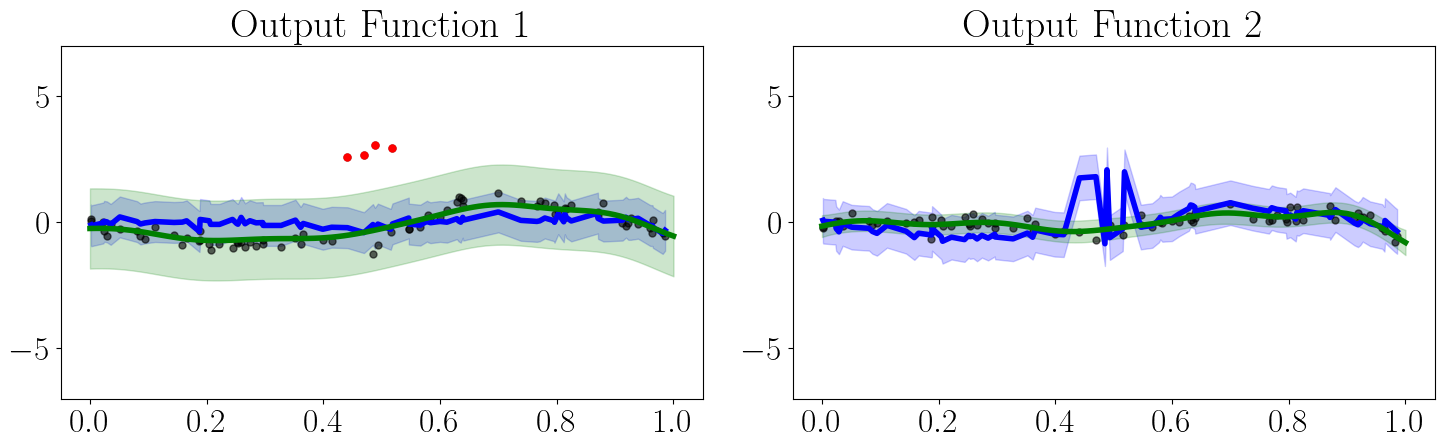

In [105]:
morcgp = MORCGPRegressor_fixed_weights(mean = 0, length_scale=length_scale, noise = np.array([noise_variance]*2), A=A)
# morcgp = MORCGPRegressor_NC_fixed_weights(mean = 0, length_scale=optim_length_scale, noise = optim_noise, A=optim_A)
initial_predictive_mean, initial_predictive_variances = morcgp.fit(x_train, Y_train, B_weighted=optim_B, noise_weighted=optim_noise)

# print(morcgp.loo_cv(length_scale=length_scale, noise=np.array([0.05, 0.05]), A=A, weighted=True))

# Optimize hyperparameters
predictive_mean, predictive_variances = morcgp.optimize_loo_cv(weighted=False, print_opt_param = False, print_iter_param=False, 
                    #    B_weighted=optim_B, noise_weighted=optim_noise
                       )

# Predict on test points
x_test = np.linspace(0, 1, 100).reshape(-1, 1)
mu_morcgp, var_morcgp = morcgp.predict(x_test)
std_morcgp = np.sqrt(var_morcgp + morcgp.noise)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in range(2):
    axs[i].plot(x_train.flatten(), Y_train[:, i], 'o', color='black', alpha=0.6, label=f'Output {i+1}')
    if i == 0:
        axs[i].plot(x_train.flatten()[~mask], Y_train[:, i][~mask], 'o', color='red', label='Outlier points')

    axs[i].plot(x_train.flatten(), predictive_mean[:, i], '-', color='blue', label=f'Predictive Mean')
    axs[i].fill_between(x_train.flatten(), predictive_mean[:, i] - np.sqrt(predictive_variances[:, i]), predictive_mean[:, i] + np.sqrt(predictive_variances[:, i]), color='blue', alpha=0.2, label=f'±2 Std. Dev.')

    axs[i].plot(x_test.flatten(), mu_morcgp[:, i], '-', color='green', label=f'Predicted Mean')
    axs[i].fill_between(x_test.flatten(), mu_morcgp[:, i] - 2*std_morcgp[:, i], mu_morcgp[:, i] + 2*std_morcgp[:, i], color='green', alpha=0.2, label=f'±2 Std. Dev.')

    axs[i].set_title(f"Output Function {i+1}")
    axs[i].set_ylim([-7, 7])

plt.tight_layout()
plt.show()

y: (160,), x: (160,), beta: (160,), c: (160,)
y: (160,), x: (160,), beta: (160,), c: (160,)
y: (160,), x: (160,), beta: (160,), c: (160,)
y: (160,), x: (160,), beta: (160,), c: (160,)


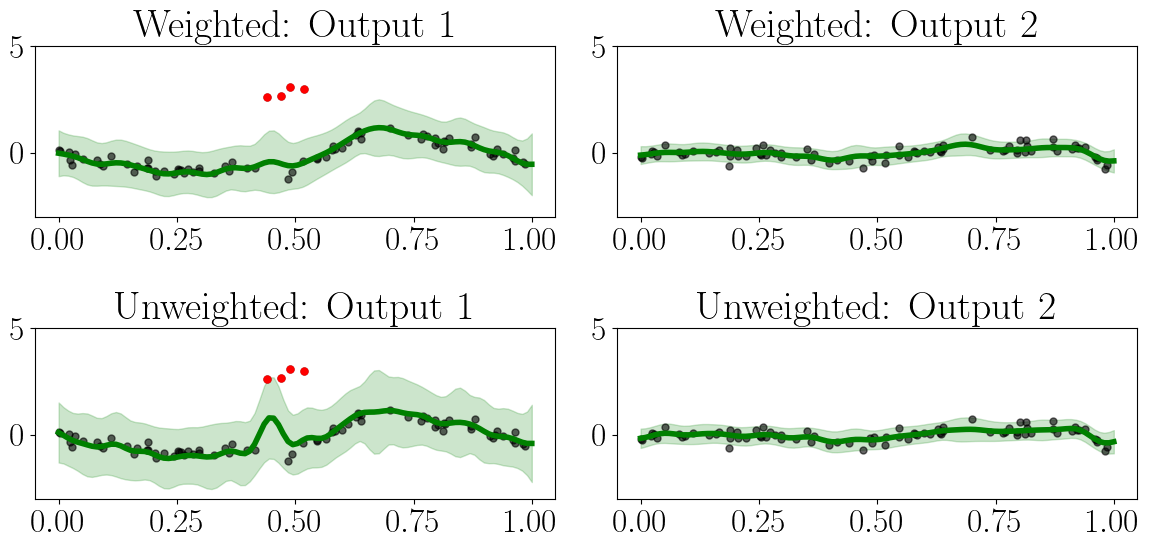

In [106]:
# --- 1.  Set‑up: original model ---------------------------------------------
morcgp_w = MORCGPRegressor_fixed_weights(
    mean=0,
    length_scale=initial_length_scale,
    noise=np.array([initial_noise]*2),
    A=A,
)

# weighted (= current behaviour) – keep everything exactly as you have it
pm_train_w, pv_train_w = morcgp_w.fit(
    x_train, Y_train,
    B_weighted=optim_B,
    noise_weighted=optim_noise,
)

pm_train_w, pv_train_w = morcgp_w.optimize_loo_cv(
    weighted=True,         # ← whatever you’re using right now
    print_opt_param=False,
    print_iter_param=False,
)
x_test = np.linspace(0, 1, 100).reshape(-1, 1)
mu_test_w, var_test_w = morcgp_w.predict(x_test)
std_test_w = np.sqrt(var_test_w + morcgp_w.noise)

# --- 2.  Second model with weighted=False ------------------------------------
morcgp_u = MORCGPRegressor_fixed_weights(
    mean=0,
    length_scale=initial_length_scale,
    noise=np.array([initial_noise]*2),
    A=A,
)

pm_train_u, pv_train_u = morcgp_u.fit(
    x_train, Y_train,
    B_weighted=optim_B,
    noise_weighted=optim_noise,
)

pm_train_u, pv_train_u = morcgp_u.optimize_loo_cv(
    weighted=False,        # ← new setting for the comparison row
    print_opt_param=False,
    print_iter_param=False,
)
mu_test_u, var_test_u = morcgp_u.predict(x_test)
std_test_u = np.sqrt(var_test_u + morcgp_u.noise)

# --- 3.  2 × 2 plot grid ------------------------------------------------------
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
rows = [
    (mu_test_w, std_test_w, "Weighted"),
    (mu_test_u, std_test_u, "Unweighted"),
]

for r, (mu_test, std_test, label_prefix) in enumerate(rows):
    for i in range(2):
        ax = axs[r, i]
        # training data
        ax.plot(x_train.flatten(), Y_train[:, i],
                'o', color='black', alpha=0.6, label=f'Output {i+1}')
        if i == 0:          # keep your outlier highlight only once
            ax.plot(x_train.flatten()[~mask], Y_train[:, i][~mask],
                    'o', color='red', label='Outlier points')

        # predictive mean/uncertainty on test grid
        ax.plot(x_test.flatten(), mu_test[:, i],
                '-', color='green', label='Predicted mean')
        ax.fill_between(x_test.flatten(),
                        mu_test[:, i] - 2*std_test[:, i],
                        mu_test[:, i] + 2*std_test[:, i],
                        color='green', alpha=0.2)

        ax.set_title(f"{label_prefix}: Output {i+1}")
        ax.set_ylim([-3, 5])

plt.tight_layout()
plt.show()


In [107]:
prior_mean = ConstantMean(constant=0)

rcgp_w = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
rcgp_w.fit(x_train, Y_train[:, 0].reshape(-1, 1))
rcgp_w.optimize_loo_cv(weighted=True, print_opt_param=False, print_iter_param=False)

mu_w, var_w = rcgp_w.predict(x_test)
std_w = np.sqrt(var_w + rcgp_w.noise)

rcgp = RCGPRegressor(mean=prior_mean, length_scale=initial_length_scale, rbf_variance=initial_rbf_variance, noise=initial_noise, epsilon=epsilon)
rcgp.fit(x_train, Y_train[:, 0].reshape(-1, 1))
rcgp.optimize_loo_cv(weighted=False, print_opt_param=False, print_iter_param=False)

mu, var = rcgp.predict(x_test)
std = np.sqrt(var + rcgp.noise)

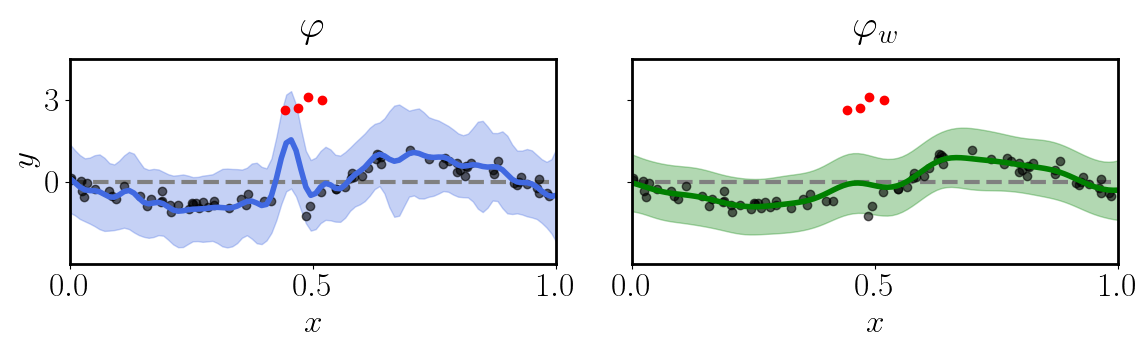

In [108]:
# Create subplot figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axs[0].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[0].plot(x_train[mask], Y_train[:, 0][mask], 'o', color='black', markersize=6, alpha=0.6)
axs[0].plot(x_train[~mask], Y_train[:, 0][~mask], 'o', color='red', markersize=6)
axs[0].plot(x_test, mu.ravel(), color="royalblue")
axs[0].fill_between(x_test.ravel(), mu.ravel() - 1.96 * std, mu.ravel() + 1.96 * std, alpha=0.3, color='royalblue')
axs[0].set_ylabel(r'$y$')
axs[0].set_title(r"$\varphi$", pad=15)

# axs[0].plot(x_test, mu.ravel(), color="royalblue", label=r'RCGP ($\varphi$)')
# axs[0].legend(loc='lower right', frameon=False, borderaxespad=0.1, handlelength=1.5)

axs[1].plot(x_train, 0 * np.ones(len(x_train)), '--', color='grey', linewidth=3)
axs[1].plot(x_train[mask], Y_train[:, 0][mask], 'o', color='black', markersize=6, alpha=0.6)
axs[1].plot(x_train[~mask], Y_train[:, 0][~mask], 'o', color='red', markersize=6)
axs[1].plot(x_test, mu_w.ravel(), color="green")
axs[1].fill_between(x_test.ravel(), mu_w.ravel() - 1.96 * std_w, mu_w.ravel() + 1.96 * std_w, alpha=0.3, color='green')
axs[1].set_title(r"$\varphi_{w}$", pad=15)

# axs[1].plot(x_test, mu_w.ravel(), color="green", label=r'RCGP ($\varphi_w$)')
# axs[1].legend(loc='lower right', frameon=False, borderaxespad=0.1, handlelength=1.5)


for ax in axs:
    ax.set_ylim(-3, 4.5)
    ax.set_xlim(0, 1)
    ax.set_yticks([0, 3])
    ax.set_xticks([0, 0.5, 1.0])
    ax.set_xlabel(r'$x$')
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    
# plt.subplots_adjust(wspace=0.01)
plt.tight_layout()
plt.show()

# fig.savefig("./results/RCGP_hyperparam_opt.pdf", format='pdf', bbox_inches='tight')

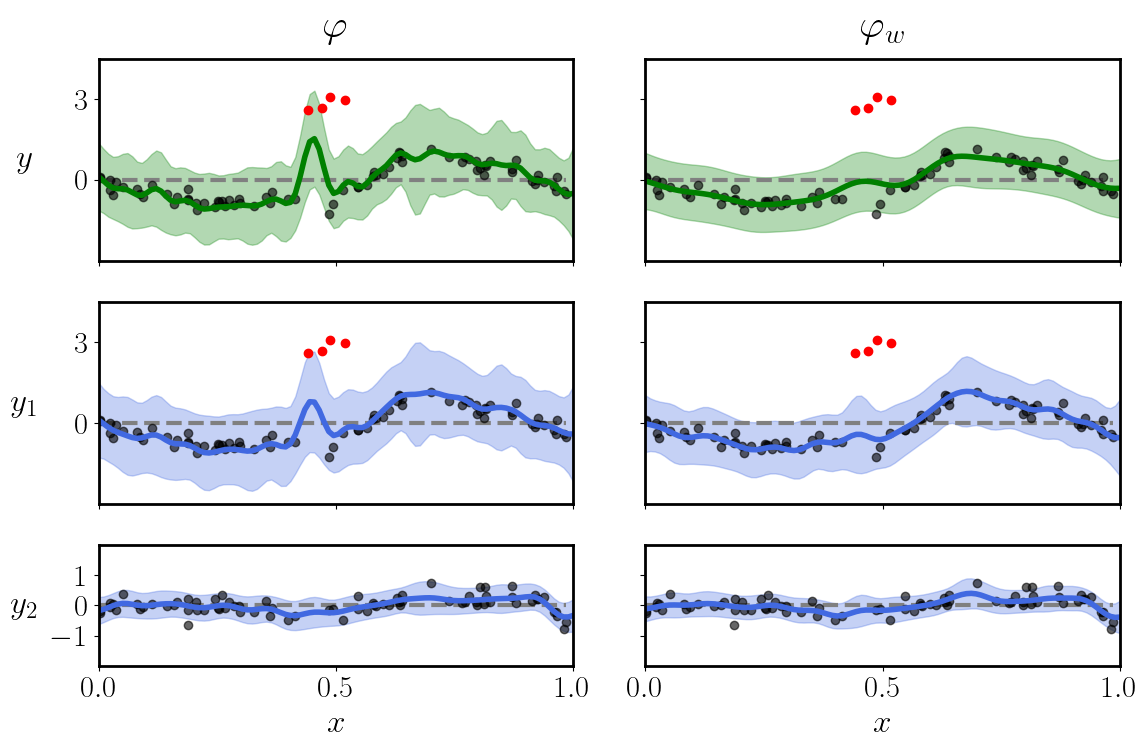

In [133]:
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------------
# ❶  Allocate a 3 × 2 grid (rows = outputs, cols = φ vs φw branch)
# ------------------------------------------------------------------
fig, axs = plt.subplots(
    3, 2, figsize=(12, 8),          # 3 rows, 2 columns
    sharex=True,                    # all axes share the same x‑axis
    sharey='row',                   # rows share y‑axis, columns can differ
    gridspec_kw={'height_ratios': [1, 1, 0.6]}  # bottom row smaller
)

# ------------------------------------------------------------------
# ❷  -------- first row:  φ   and   φw  (your existing code) -------
# ------------------------------------------------------------------
# (0, 0) — φ
axs[0, 0].plot(x_train, np.zeros_like(x_train), '--', color='grey', lw=3)
axs[0, 0].plot(x_train[mask],  Y_train[:, 0][mask],  'o', color='black', ms=6, alpha=0.6)
axs[0, 0].plot(x_train[~mask], Y_train[:, 0][~mask], 'o', color='red',   ms=6)
axs[0, 0].plot(x_test, mu.ravel(), color='green')
axs[0, 0].fill_between(
    x_test.ravel(),
    mu.ravel() - 1.96 * std,
    mu.ravel() + 1.96 * std,
    alpha=0.3, color='green'
)
axs[0, 0].set_title(r'$\varphi$', pad=15)

# (0, 1) — φw
axs[0, 1].plot(x_train, np.zeros_like(x_train), '--', color='grey', lw=3)
axs[0, 1].plot(x_train[mask],  Y_train[:, 0][mask],  'o', color='black', ms=6, alpha=0.6)
axs[0, 1].plot(x_train[~mask], Y_train[:, 0][~mask], 'o', color='red',   ms=6)
axs[0, 1].plot(x_test, mu_w.ravel(), color='green')
axs[0, 1].fill_between(
    x_test.ravel(),
    mu_w.ravel() - 1.96 * std_w,
    mu_w.ravel() + 1.96 * std_w,
    alpha=0.3, color='green'
)
axs[0, 1].set_title(r'$\varphi_{w}$', pad=15)

# ------------------------------------------------------------------
# ❸  -------- second row: first output channel ---------------------
# ------------------------------------------------------------------
# (1, 0) — channel‑1 of GP_u
axs[1, 0].plot(x_train, np.zeros_like(x_train), '--', color='grey', lw=3)
axs[1, 0].plot(x_train[mask],  Y_train[:, 0][mask],  'o', color='black', ms=6, alpha=0.6)
axs[1, 0].plot(x_train[~mask], Y_train[:, 0][~mask], 'o', color='red',   ms=6)
axs[1, 0].plot(x_test, mu_test_u[:, 0], color='royalblue')
axs[1, 0].fill_between(
    x_test.ravel(),
    mu_test_u[:, 0] - 1.96 * std_test_u[:, 0],
    mu_test_u[:, 0] + 1.96 * std_test_u[:, 0],
    alpha=0.3, color='royalblue'
)

# (1, 1) — channel‑1 of GP_w
axs[1, 1].plot(x_train, np.zeros_like(x_train), '--', color='grey', lw=3)
axs[1, 1].plot(x_train[mask],  Y_train[:, 0][mask],  'o', color='black', ms=6, alpha=0.6)
axs[1, 1].plot(x_train[~mask], Y_train[:, 0][~mask], 'o', color='red',   ms=6)
axs[1, 1].plot(x_test, mu_test_w[:, 0], color='royalblue')
axs[1, 1].fill_between(
    x_test.ravel(),
    mu_test_w[:, 0] - 1.96 * std_test_w[:, 0],
    mu_test_w[:, 0] + 1.96 * std_test_w[:, 0],
    alpha=0.3, color='royalblue'
)

# ------------------------------------------------------------------
# ❹  -------- third row: second output channel ---------------------
# ------------------------------------------------------------------
# (2, 0) — channel‑2 of GP_u
axs[2, 0].plot(x_train, np.zeros_like(x_train), '--', color='grey', lw=3)
axs[2, 0].plot(x_train[mask],  Y_train[:, 1][mask],  'o', color='black', ms=6, alpha=0.6)
axs[2, 0].plot(x_test, mu_test_u[:, 1], color='royalblue')
axs[2, 0].fill_between(
    x_test.ravel(),
    mu_test_u[:, 1] - 1.96 * std_test_u[:, 1],
    mu_test_u[:, 1] + 1.96 * std_test_u[:, 1],
    alpha=0.3, color='royalblue'
)

# (2, 1) — channel‑2 of GP_w
axs[2, 1].plot(x_train, np.zeros_like(x_train), '--', color='grey', lw=3)
axs[2, 1].plot(x_train[mask],  Y_train[:, 1][mask],  'o', color='black', ms=6, alpha=0.6)
axs[2, 1].plot(x_test, mu_test_w[:, 1], color='royalblue')
axs[2, 1].fill_between(
    x_test.ravel(),
    mu_test_w[:, 1] - 1.96 * std_test_w[:, 1],
    mu_test_w[:, 1] + 1.96 * std_test_w[:, 1],
    alpha=0.3, color='royalblue'
)

# ------------------------------------------------------------------
# ❺  -------- tidy‑up formatting (common to all panels) ------------
# ------------------------------------------------------------------
for i, row in enumerate(axs):
    for ax in row:
        ax.set_xlim(0, 1)
        ax.set_xticks([0, 0.5, 1.0])
        for spine in ax.spines.values():
            spine.set_linewidth(2)

        if i == 2:
            ax.set_ylim(-2, 2)
            ax.set_yticks([-1, 0, 1])
        else:
            ax.set_ylim(-3, 4.5)
            ax.set_yticks([0, 3])

        if i == len(axs) - 1:
            ax.set_xlabel(r'$x$')  # only set xlabel on bottom row
        else:
            ax.set_xlabel("")
            ax.tick_params(labelbottom=False)

y_labels = [r'$y$', r'$y_1$', r'$y_2$']
for ax, label in zip(axs[:, 0], y_labels):
    ax.set_ylabel(label, rotation=0, labelpad=20, va='center')

# Align the y‑axis labels for the first‑column axes
fig.align_ylabels(axs[:, 0])      # or just fig.align_ylabels()

plt.tight_layout()
plt.show()


C:\Users\joshu\AppData\Local\Temp\ipykernel_51180\519408968.py:131: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


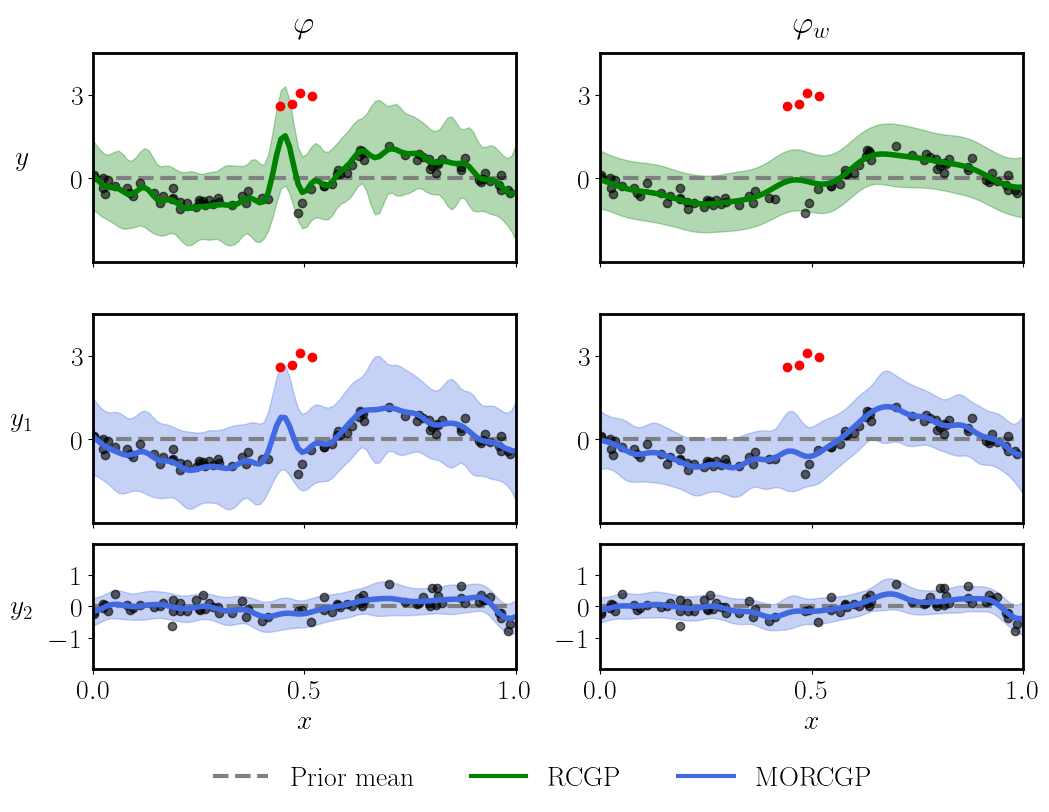

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# ------------------------------------------------------------------
# Create figure with GridSpec: 4 rows, 2 columns
# The 3rd row is a small spacer (height_ratio=0.2) between 2nd and 3rd rows
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(4, 2, height_ratios=[1, 0.05, 1, 0.6], hspace=0.15)

# Create axes in rows 0,1 and 3 (skip row 2 which is spacer)
axs = np.empty((3, 2), dtype=object)
axs[0, 0] = fig.add_subplot(gs[0, 0])
axs[0, 1] = fig.add_subplot(gs[0, 1])
axs[1, 0] = fig.add_subplot(gs[2, 0])
axs[1, 1] = fig.add_subplot(gs[2, 1])
axs[2, 0] = fig.add_subplot(gs[3, 0])
axs[2, 1] = fig.add_subplot(gs[3, 1])

# ------------------------------------------------------------------
# Your existing plotting code, replacing axs with this new axs

# (0, 0) — φ
axs[0, 0].plot(x_train, np.zeros_like(x_train), '--', color='grey', lw=3)
axs[0, 0].plot(x_train[mask],  Y_train[:, 0][mask],  'o', color='black', ms=6, alpha=0.6)
axs[0, 0].plot(x_train[~mask], Y_train[:, 0][~mask], 'o', color='red',   ms=6)
axs[0, 0].plot(x_test, mu.ravel(), color='green')
axs[0, 0].fill_between(
    x_test.ravel(),
    mu.ravel() - 1.96 * std,
    mu.ravel() + 1.96 * std,
    alpha=0.3, color='green'
)
axs[0, 0].set_title(r'$\varphi$', pad=15)

# (0, 1) — φw
axs[0, 1].plot(x_train, np.zeros_like(x_train), '--', color='grey', lw=3)
axs[0, 1].plot(x_train[mask],  Y_train[:, 0][mask],  'o', color='black', ms=6, alpha=0.6)
axs[0, 1].plot(x_train[~mask], Y_train[:, 0][~mask], 'o', color='red',   ms=6)
axs[0, 1].plot(x_test, mu_w.ravel(), color='green')
axs[0, 1].fill_between(
    x_test.ravel(),
    mu_w.ravel() - 1.96 * std_w,
    mu_w.ravel() + 1.96 * std_w,
    alpha=0.3, color='green'
)
axs[0, 1].set_title(r'$\varphi_{w}$', pad=15)

# (1, 0) — channel-1 of GP_u
axs[1, 0].plot(x_train, np.zeros_like(x_train), '--', color='grey', lw=3)
axs[1, 0].plot(x_train[mask],  Y_train[:, 0][mask],  'o', color='black', ms=6, alpha=0.6)
axs[1, 0].plot(x_train[~mask], Y_train[:, 0][~mask], 'o', color='red',   ms=6)
axs[1, 0].plot(x_test, mu_test_u[:, 0], color='royalblue')
axs[1, 0].fill_between(
    x_test.ravel(),
    mu_test_u[:, 0] - 1.96 * std_test_u[:, 0],
    mu_test_u[:, 0] + 1.96 * std_test_u[:, 0],
    alpha=0.3, color='royalblue'
)

# (1, 1) — channel-1 of GP_w
axs[1, 1].plot(x_train, np.zeros_like(x_train), '--', color='grey', lw=3)
axs[1, 1].plot(x_train[mask],  Y_train[:, 0][mask],  'o', color='black', ms=6, alpha=0.6)
axs[1, 1].plot(x_train[~mask], Y_train[:, 0][~mask], 'o', color='red',   ms=6)
axs[1, 1].plot(x_test, mu_test_w[:, 0], color='royalblue')
axs[1, 1].fill_between(
    x_test.ravel(),
    mu_test_w[:, 0] - 1.96 * std_test_w[:, 0],
    mu_test_w[:, 0] + 1.96 * std_test_w[:, 0],
    alpha=0.3, color='royalblue'
)

# (2, 0) — channel-2 of GP_u
axs[2, 0].plot(x_train, np.zeros_like(x_train), '--', color='grey', lw=3)
axs[2, 0].plot(x_train[mask],  Y_train[:, 1][mask],  'o', color='black', ms=6, alpha=0.6)
axs[2, 0].plot(x_test, mu_test_u[:, 1], color='royalblue')
axs[2, 0].fill_between(
    x_test.ravel(),
    mu_test_u[:, 1] - 1.96 * std_test_u[:, 1],
    mu_test_u[:, 1] + 1.96 * std_test_u[:, 1],
    alpha=0.3, color='royalblue'
)

# (2, 1) — channel-2 of GP_w
axs[2, 1].plot(x_train, np.zeros_like(x_train), '--', color='grey', lw=3)
axs[2, 1].plot(x_train[mask],  Y_train[:, 1][mask],  'o', color='black', ms=6, alpha=0.6)
axs[2, 1].plot(x_test, mu_test_w[:, 1], color='royalblue')
axs[2, 1].fill_between(
    x_test.ravel(),
    mu_test_w[:, 1] - 1.96 * std_test_w[:, 1],
    mu_test_w[:, 1] + 1.96 * std_test_w[:, 1],
    alpha=0.3, color='royalblue'
)

# ------------------------------------------------------------------
# Tidy-up formatting (common to all panels)
for i, row in enumerate(axs):
    for ax in row:
        ax.set_xlim(0, 1)
        ax.set_xticks([0, 0.5, 1.0])
        for spine in ax.spines.values():
            spine.set_linewidth(2)

        if i == 2:
            ax.set_ylim(-2, 2)
            ax.set_yticks([-1, 0, 1])
        else:
            ax.set_ylim(-3, 4.5)
            ax.set_yticks([0, 3])

        if i == len(axs) - 1:
            ax.set_xlabel(r'$x$')  # only set xlabel on bottom row
        else:
            ax.set_xlabel("")
            ax.tick_params(labelbottom=False)

y_labels = [r'$y$', r'$y_1$', r'$y_2$']
for ax, label in zip(axs[:, 0], y_labels):
    ax.set_ylabel(label, rotation=0, labelpad=20, va='center')

legend_handles = [
    Line2D([0], [0], color='grey', lw=3, ls='--', label='Prior mean'),
    Line2D([0], [0], color='green', lw=3, label='RCGP'),
    Line2D([0], [0], color='royalblue', lw=3, label='MORCGP'),
]

fig.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 0.02),
           ncol=3, frameon=False, fontsize=20)
fig.align_ylabels(axs[:, 0])

plt.tight_layout()
plt.show()

# fig.savefig("./results/RCGP_hyperparam_opt.pdf", format='pdf', bbox_inches='tight')